# Обучение моделей бустинга на числовых фичах

In [59]:
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
import sklearn.metrics as metrics
import numpy as np

In [60]:
data = pd.read_csv(
    '../data/processed/numerical_train.csv',
    index_col = 'pair_id'
)

In [87]:
# Undersampling
matched_count = data.is_duplicate.value_counts()[1]

equal_df = pd.concat([data[data.is_duplicate == 1],data[data.is_duplicate == 0].sample(matched_count)])

In [63]:
X = equal_df.drop(['is_duplicate'], axis = 1)
y = equal_df.is_duplicate

In [64]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    random_state = 666,
    test_size = 0.2
)

## Catboost

In [65]:
catboost_model = CatBoostClassifier(thread_count = 3)

In [66]:
catboost_model.grid_search(
    X = X_train,
    y = y_train,
    cv = 3,
    verbose = 2,
    param_grid = {
        'eta': np.arange(0.1,0.5,0.1),
        'iterations': range(500,2500,500)
    }
)

C:\Program Files\Python\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


0:	learn: 0.6208519	test: 0.6208024	best: 0.6208024 (0)	total: 10.1ms	remaining: 5.03s
1:	learn: 0.5610632	test: 0.5621275	best: 0.5621275 (1)	total: 13.2ms	remaining: 3.28s
2:	learn: 0.5058887	test: 0.5084421	best: 0.5084421 (2)	total: 16ms	remaining: 2.65s
3:	learn: 0.4606303	test: 0.4650067	best: 0.4650067 (3)	total: 18.9ms	remaining: 2.34s
4:	learn: 0.4297077	test: 0.4345601	best: 0.4345601 (4)	total: 21.8ms	remaining: 2.16s
5:	learn: 0.4025899	test: 0.4108164	best: 0.4108164 (5)	total: 25.2ms	remaining: 2.07s
6:	learn: 0.3830851	test: 0.3921574	best: 0.3921574 (6)	total: 28.2ms	remaining: 1.98s
7:	learn: 0.3674500	test: 0.3784742	best: 0.3784742 (7)	total: 31.1ms	remaining: 1.91s
8:	learn: 0.3550142	test: 0.3662903	best: 0.3662903 (8)	total: 34ms	remaining: 1.85s
9:	learn: 0.3447767	test: 0.3581566	best: 0.3581566 (9)	total: 36.9ms	remaining: 1.81s
10:	learn: 0.3344640	test: 0.3491130	best: 0.3491130 (10)	total: 40.6ms	remaining: 1.8s
11:	learn: 0.3240701	test: 0.3406244	best: 0.3

121:	learn: 0.1666565	test: 0.2408953	best: 0.2408953 (121)	total: 414ms	remaining: 1.28s
122:	learn: 0.1665394	test: 0.2408234	best: 0.2408234 (122)	total: 420ms	remaining: 1.29s
123:	learn: 0.1660826	test: 0.2408797	best: 0.2408234 (122)	total: 424ms	remaining: 1.29s
124:	learn: 0.1656855	test: 0.2408832	best: 0.2408234 (122)	total: 429ms	remaining: 1.28s
125:	learn: 0.1653567	test: 0.2410071	best: 0.2408234 (122)	total: 433ms	remaining: 1.28s
126:	learn: 0.1646696	test: 0.2408992	best: 0.2408234 (122)	total: 438ms	remaining: 1.29s
127:	learn: 0.1636789	test: 0.2405391	best: 0.2405391 (127)	total: 443ms	remaining: 1.29s
128:	learn: 0.1628226	test: 0.2406003	best: 0.2405391 (127)	total: 452ms	remaining: 1.3s
129:	learn: 0.1618218	test: 0.2404698	best: 0.2404698 (129)	total: 457ms	remaining: 1.3s
130:	learn: 0.1617091	test: 0.2403636	best: 0.2403636 (130)	total: 465ms	remaining: 1.31s
131:	learn: 0.1610785	test: 0.2401594	best: 0.2401594 (131)	total: 471ms	remaining: 1.31s
132:	learn: 

220:	learn: 0.1126901	test: 0.2264473	best: 0.2264473 (220)	total: 1.3s	remaining: 1.65s
221:	learn: 0.1123731	test: 0.2263672	best: 0.2263672 (221)	total: 1.32s	remaining: 1.66s
222:	learn: 0.1123386	test: 0.2263697	best: 0.2263672 (221)	total: 1.35s	remaining: 1.68s
223:	learn: 0.1123129	test: 0.2263358	best: 0.2263358 (223)	total: 1.36s	remaining: 1.67s
224:	learn: 0.1117835	test: 0.2262317	best: 0.2262317 (224)	total: 1.36s	remaining: 1.67s
225:	learn: 0.1113935	test: 0.2260975	best: 0.2260975 (225)	total: 1.37s	remaining: 1.67s
226:	learn: 0.1106987	test: 0.2258925	best: 0.2258925 (226)	total: 1.42s	remaining: 1.7s
227:	learn: 0.1103622	test: 0.2257673	best: 0.2257673 (227)	total: 1.42s	remaining: 1.7s
228:	learn: 0.1101556	test: 0.2259455	best: 0.2257673 (227)	total: 1.43s	remaining: 1.69s
229:	learn: 0.1095808	test: 0.2256822	best: 0.2256822 (229)	total: 1.46s	remaining: 1.71s
230:	learn: 0.1095649	test: 0.2256841	best: 0.2256822 (229)	total: 1.47s	remaining: 1.71s
231:	learn: 0

332:	learn: 0.0800734	test: 0.2201419	best: 0.2193697 (323)	total: 2.62s	remaining: 1.31s
333:	learn: 0.0800111	test: 0.2201930	best: 0.2193697 (323)	total: 2.63s	remaining: 1.31s
334:	learn: 0.0798564	test: 0.2203190	best: 0.2193697 (323)	total: 2.65s	remaining: 1.3s
335:	learn: 0.0792667	test: 0.2198670	best: 0.2193697 (323)	total: 2.66s	remaining: 1.3s
336:	learn: 0.0791461	test: 0.2197978	best: 0.2193697 (323)	total: 2.66s	remaining: 1.29s
337:	learn: 0.0786872	test: 0.2191571	best: 0.2191571 (337)	total: 2.67s	remaining: 1.28s
338:	learn: 0.0784103	test: 0.2192623	best: 0.2191571 (337)	total: 2.67s	remaining: 1.27s
339:	learn: 0.0781166	test: 0.2192337	best: 0.2191571 (337)	total: 2.69s	remaining: 1.26s
340:	learn: 0.0777893	test: 0.2191390	best: 0.2191390 (340)	total: 2.7s	remaining: 1.26s
341:	learn: 0.0775643	test: 0.2191443	best: 0.2191390 (340)	total: 2.71s	remaining: 1.25s
342:	learn: 0.0773166	test: 0.2186579	best: 0.2186579 (342)	total: 2.71s	remaining: 1.24s
343:	learn: 0

461:	learn: 0.0563752	test: 0.2182116	best: 0.2176657 (443)	total: 3.43s	remaining: 282ms
462:	learn: 0.0561848	test: 0.2176957	best: 0.2176657 (443)	total: 3.44s	remaining: 275ms
463:	learn: 0.0560531	test: 0.2177596	best: 0.2176657 (443)	total: 3.44s	remaining: 267ms
464:	learn: 0.0559675	test: 0.2177886	best: 0.2176657 (443)	total: 3.45s	remaining: 260ms
465:	learn: 0.0557446	test: 0.2177377	best: 0.2176657 (443)	total: 3.46s	remaining: 252ms
466:	learn: 0.0555864	test: 0.2177547	best: 0.2176657 (443)	total: 3.46s	remaining: 245ms
467:	learn: 0.0555353	test: 0.2177509	best: 0.2176657 (443)	total: 3.47s	remaining: 237ms
468:	learn: 0.0555210	test: 0.2177538	best: 0.2176657 (443)	total: 3.47s	remaining: 230ms
469:	learn: 0.0552965	test: 0.2178502	best: 0.2176657 (443)	total: 3.48s	remaining: 222ms
470:	learn: 0.0552548	test: 0.2178902	best: 0.2176657 (443)	total: 3.49s	remaining: 215ms
471:	learn: 0.0552305	test: 0.2178937	best: 0.2176657 (443)	total: 3.49s	remaining: 207ms
472:	learn

58:	learn: 0.1709062	test: 0.2478246	best: 0.2478246 (58)	total: 385ms	remaining: 2.88s
59:	learn: 0.1680945	test: 0.2472576	best: 0.2472576 (59)	total: 391ms	remaining: 2.87s
60:	learn: 0.1662957	test: 0.2458379	best: 0.2458379 (60)	total: 398ms	remaining: 2.87s
61:	learn: 0.1655889	test: 0.2454033	best: 0.2454033 (61)	total: 404ms	remaining: 2.85s
62:	learn: 0.1648678	test: 0.2452446	best: 0.2452446 (62)	total: 411ms	remaining: 2.85s
63:	learn: 0.1636693	test: 0.2448805	best: 0.2448805 (63)	total: 426ms	remaining: 2.9s
64:	learn: 0.1623660	test: 0.2442654	best: 0.2442654 (64)	total: 433ms	remaining: 2.9s
65:	learn: 0.1601210	test: 0.2418846	best: 0.2418846 (65)	total: 442ms	remaining: 2.9s
66:	learn: 0.1598554	test: 0.2421443	best: 0.2418846 (65)	total: 450ms	remaining: 2.9s
67:	learn: 0.1593244	test: 0.2419159	best: 0.2418846 (65)	total: 462ms	remaining: 2.94s
68:	learn: 0.1589577	test: 0.2421593	best: 0.2418846 (65)	total: 467ms	remaining: 2.92s
69:	learn: 0.1570010	test: 0.2408879

159:	learn: 0.0828397	test: 0.2302394	best: 0.2302394 (159)	total: 1.47s	remaining: 3.12s
160:	learn: 0.0827680	test: 0.2302559	best: 0.2302394 (159)	total: 1.47s	remaining: 3.1s
161:	learn: 0.0822590	test: 0.2302806	best: 0.2302394 (159)	total: 1.48s	remaining: 3.08s
162:	learn: 0.0816393	test: 0.2301101	best: 0.2301101 (162)	total: 1.48s	remaining: 3.07s
163:	learn: 0.0813282	test: 0.2299008	best: 0.2299008 (163)	total: 1.49s	remaining: 3.05s
164:	learn: 0.0808927	test: 0.2293944	best: 0.2293944 (164)	total: 1.5s	remaining: 3.04s
165:	learn: 0.0800460	test: 0.2299010	best: 0.2293944 (164)	total: 1.51s	remaining: 3.04s
166:	learn: 0.0795452	test: 0.2295337	best: 0.2293944 (164)	total: 1.52s	remaining: 3.03s
167:	learn: 0.0789116	test: 0.2295318	best: 0.2293944 (164)	total: 1.52s	remaining: 3.01s
168:	learn: 0.0784866	test: 0.2298207	best: 0.2293944 (164)	total: 1.55s	remaining: 3.04s
169:	learn: 0.0777296	test: 0.2291431	best: 0.2291431 (169)	total: 1.56s	remaining: 3.02s
170:	learn: 

270:	learn: 0.0431124	test: 0.2295838	best: 0.2274608 (228)	total: 2.33s	remaining: 1.97s
271:	learn: 0.0431071	test: 0.2295907	best: 0.2274608 (228)	total: 2.34s	remaining: 1.96s
272:	learn: 0.0428883	test: 0.2294179	best: 0.2274608 (228)	total: 2.34s	remaining: 1.95s
273:	learn: 0.0427913	test: 0.2294877	best: 0.2274608 (228)	total: 2.35s	remaining: 1.94s
274:	learn: 0.0425574	test: 0.2295162	best: 0.2274608 (228)	total: 2.35s	remaining: 1.93s
275:	learn: 0.0423619	test: 0.2295500	best: 0.2274608 (228)	total: 2.36s	remaining: 1.91s
276:	learn: 0.0422406	test: 0.2291970	best: 0.2274608 (228)	total: 2.36s	remaining: 1.9s
277:	learn: 0.0418877	test: 0.2294255	best: 0.2274608 (228)	total: 2.37s	remaining: 1.89s
278:	learn: 0.0414671	test: 0.2302883	best: 0.2274608 (228)	total: 2.38s	remaining: 1.88s
279:	learn: 0.0414089	test: 0.2302992	best: 0.2274608 (228)	total: 2.38s	remaining: 1.87s
280:	learn: 0.0410817	test: 0.2305326	best: 0.2274608 (228)	total: 2.39s	remaining: 1.86s
281:	learn:

376:	learn: 0.0263489	test: 0.2331739	best: 0.2274608 (228)	total: 2.94s	remaining: 960ms
377:	learn: 0.0262054	test: 0.2333486	best: 0.2274608 (228)	total: 2.95s	remaining: 952ms
378:	learn: 0.0261774	test: 0.2335236	best: 0.2274608 (228)	total: 2.95s	remaining: 943ms
379:	learn: 0.0260878	test: 0.2337063	best: 0.2274608 (228)	total: 2.96s	remaining: 934ms
380:	learn: 0.0259666	test: 0.2338722	best: 0.2274608 (228)	total: 2.96s	remaining: 926ms
381:	learn: 0.0259146	test: 0.2342652	best: 0.2274608 (228)	total: 2.97s	remaining: 917ms
382:	learn: 0.0257299	test: 0.2343062	best: 0.2274608 (228)	total: 2.97s	remaining: 908ms
383:	learn: 0.0257268	test: 0.2343226	best: 0.2274608 (228)	total: 2.98s	remaining: 899ms
384:	learn: 0.0257050	test: 0.2344133	best: 0.2274608 (228)	total: 2.98s	remaining: 891ms
385:	learn: 0.0256087	test: 0.2343674	best: 0.2274608 (228)	total: 2.99s	remaining: 882ms
386:	learn: 0.0256064	test: 0.2343712	best: 0.2274608 (228)	total: 2.99s	remaining: 873ms
387:	learn

494:	learn: 0.0181889	test: 0.2373648	best: 0.2274608 (228)	total: 3.54s	remaining: 35.8ms
495:	learn: 0.0181177	test: 0.2373055	best: 0.2274608 (228)	total: 3.55s	remaining: 28.6ms
496:	learn: 0.0180819	test: 0.2374468	best: 0.2274608 (228)	total: 3.55s	remaining: 21.4ms
497:	learn: 0.0179869	test: 0.2376225	best: 0.2274608 (228)	total: 3.56s	remaining: 14.3ms
498:	learn: 0.0178779	test: 0.2373363	best: 0.2274608 (228)	total: 3.56s	remaining: 7.14ms
499:	learn: 0.0177940	test: 0.2369231	best: 0.2274608 (228)	total: 3.56s	remaining: 0us

bestTest = 0.2274607981
bestIteration = 228

0:	learn: 0.5106388	test: 0.5103808	best: 0.5103808 (0)	total: 3.61ms	remaining: 1.8s
1:	learn: 0.4124635	test: 0.4183681	best: 0.4183681 (1)	total: 7.41ms	remaining: 1.84s
2:	learn: 0.3684110	test: 0.3737852	best: 0.3737852 (2)	total: 11.6ms	remaining: 1.92s
3:	learn: 0.3299860	test: 0.3379046	best: 0.3379046 (3)	total: 15.7ms	remaining: 1.94s
4:	learn: 0.3163994	test: 0.3261724	best: 0.3261724 (4)	total: 1

109:	learn: 0.0751839	test: 0.2362089	best: 0.2356322 (106)	total: 598ms	remaining: 2.12s
110:	learn: 0.0749200	test: 0.2362588	best: 0.2356322 (106)	total: 603ms	remaining: 2.11s
111:	learn: 0.0742504	test: 0.2365795	best: 0.2356322 (106)	total: 607ms	remaining: 2.1s
112:	learn: 0.0740526	test: 0.2368094	best: 0.2356322 (106)	total: 612ms	remaining: 2.1s
113:	learn: 0.0739228	test: 0.2368136	best: 0.2356322 (106)	total: 620ms	remaining: 2.1s
114:	learn: 0.0732021	test: 0.2364685	best: 0.2356322 (106)	total: 627ms	remaining: 2.1s
115:	learn: 0.0722816	test: 0.2359121	best: 0.2356322 (106)	total: 636ms	remaining: 2.11s
116:	learn: 0.0721487	test: 0.2359607	best: 0.2356322 (106)	total: 641ms	remaining: 2.1s
117:	learn: 0.0712788	test: 0.2355846	best: 0.2355846 (117)	total: 653ms	remaining: 2.11s
118:	learn: 0.0707921	test: 0.2356984	best: 0.2355846 (117)	total: 657ms	remaining: 2.1s
119:	learn: 0.0699240	test: 0.2353987	best: 0.2353987 (119)	total: 662ms	remaining: 2.1s
120:	learn: 0.069

203:	learn: 0.0347404	test: 0.2360846	best: 0.2336548 (146)	total: 1.21s	remaining: 1.75s
204:	learn: 0.0344556	test: 0.2358794	best: 0.2336548 (146)	total: 1.22s	remaining: 1.75s
205:	learn: 0.0344203	test: 0.2358699	best: 0.2336548 (146)	total: 1.22s	remaining: 1.74s
206:	learn: 0.0342322	test: 0.2363047	best: 0.2336548 (146)	total: 1.23s	remaining: 1.74s
207:	learn: 0.0338756	test: 0.2357859	best: 0.2336548 (146)	total: 1.24s	remaining: 1.74s
208:	learn: 0.0337117	test: 0.2360420	best: 0.2336548 (146)	total: 1.24s	remaining: 1.73s
209:	learn: 0.0333572	test: 0.2364291	best: 0.2336548 (146)	total: 1.25s	remaining: 1.73s
210:	learn: 0.0330029	test: 0.2360010	best: 0.2336548 (146)	total: 1.26s	remaining: 1.72s
211:	learn: 0.0329607	test: 0.2361072	best: 0.2336548 (146)	total: 1.26s	remaining: 1.71s
212:	learn: 0.0328394	test: 0.2363350	best: 0.2336548 (146)	total: 1.27s	remaining: 1.71s
213:	learn: 0.0325649	test: 0.2364010	best: 0.2336548 (146)	total: 1.28s	remaining: 1.71s
214:	learn

310:	learn: 0.0187914	test: 0.2372244	best: 0.2336548 (146)	total: 1.83s	remaining: 1.11s
311:	learn: 0.0187630	test: 0.2371710	best: 0.2336548 (146)	total: 1.83s	remaining: 1.1s
312:	learn: 0.0186119	test: 0.2374556	best: 0.2336548 (146)	total: 1.84s	remaining: 1.1s
313:	learn: 0.0185307	test: 0.2372250	best: 0.2336548 (146)	total: 1.85s	remaining: 1.1s
314:	learn: 0.0184777	test: 0.2372904	best: 0.2336548 (146)	total: 1.85s	remaining: 1.09s
315:	learn: 0.0184335	test: 0.2373486	best: 0.2336548 (146)	total: 1.86s	remaining: 1.08s
316:	learn: 0.0182129	test: 0.2379992	best: 0.2336548 (146)	total: 1.86s	remaining: 1.08s
317:	learn: 0.0180899	test: 0.2382106	best: 0.2336548 (146)	total: 1.87s	remaining: 1.07s
318:	learn: 0.0180618	test: 0.2381441	best: 0.2336548 (146)	total: 1.88s	remaining: 1.06s
319:	learn: 0.0180616	test: 0.2381437	best: 0.2336548 (146)	total: 1.88s	remaining: 1.06s
320:	learn: 0.0180522	test: 0.2381389	best: 0.2336548 (146)	total: 1.88s	remaining: 1.05s
321:	learn: 0

438:	learn: 0.0116405	test: 0.2460867	best: 0.2336548 (146)	total: 2.43s	remaining: 338ms
439:	learn: 0.0115791	test: 0.2465252	best: 0.2336548 (146)	total: 2.43s	remaining: 332ms
440:	learn: 0.0115269	test: 0.2466455	best: 0.2336548 (146)	total: 2.44s	remaining: 326ms
441:	learn: 0.0114015	test: 0.2471475	best: 0.2336548 (146)	total: 2.44s	remaining: 320ms
442:	learn: 0.0114009	test: 0.2471393	best: 0.2336548 (146)	total: 2.45s	remaining: 315ms
443:	learn: 0.0113356	test: 0.2472320	best: 0.2336548 (146)	total: 2.45s	remaining: 309ms
444:	learn: 0.0112653	test: 0.2472323	best: 0.2336548 (146)	total: 2.46s	remaining: 304ms
445:	learn: 0.0111641	test: 0.2478823	best: 0.2336548 (146)	total: 2.46s	remaining: 298ms
446:	learn: 0.0110909	test: 0.2479878	best: 0.2336548 (146)	total: 2.46s	remaining: 292ms
447:	learn: 0.0109811	test: 0.2478426	best: 0.2336548 (146)	total: 2.47s	remaining: 286ms
448:	learn: 0.0109810	test: 0.2478431	best: 0.2336548 (146)	total: 2.47s	remaining: 281ms
449:	learn

31:	learn: 0.1651914	test: 0.2654059	best: 0.2649188 (30)	total: 144ms	remaining: 2.1s
32:	learn: 0.1608414	test: 0.2657871	best: 0.2649188 (30)	total: 149ms	remaining: 2.1s
33:	learn: 0.1567313	test: 0.2657759	best: 0.2649188 (30)	total: 153ms	remaining: 2.09s
34:	learn: 0.1557862	test: 0.2657864	best: 0.2649188 (30)	total: 157ms	remaining: 2.08s
35:	learn: 0.1555384	test: 0.2657340	best: 0.2649188 (30)	total: 161ms	remaining: 2.07s
36:	learn: 0.1533599	test: 0.2642273	best: 0.2642273 (36)	total: 165ms	remaining: 2.06s
37:	learn: 0.1504487	test: 0.2608519	best: 0.2608519 (37)	total: 169ms	remaining: 2.05s
38:	learn: 0.1466189	test: 0.2577477	best: 0.2577477 (38)	total: 173ms	remaining: 2.04s
39:	learn: 0.1464646	test: 0.2578672	best: 0.2577477 (38)	total: 176ms	remaining: 2.03s
40:	learn: 0.1433693	test: 0.2559589	best: 0.2559589 (40)	total: 181ms	remaining: 2.02s
41:	learn: 0.1395038	test: 0.2571145	best: 0.2559589 (40)	total: 185ms	remaining: 2.02s
42:	learn: 0.1371658	test: 0.25604

133:	learn: 0.0462035	test: 0.2462650	best: 0.2434920 (125)	total: 559ms	remaining: 1.53s
134:	learn: 0.0453655	test: 0.2459010	best: 0.2434920 (125)	total: 564ms	remaining: 1.52s
135:	learn: 0.0448170	test: 0.2457676	best: 0.2434920 (125)	total: 568ms	remaining: 1.52s
136:	learn: 0.0440994	test: 0.2447041	best: 0.2434920 (125)	total: 572ms	remaining: 1.51s
137:	learn: 0.0432202	test: 0.2448465	best: 0.2434920 (125)	total: 577ms	remaining: 1.51s
138:	learn: 0.0425110	test: 0.2451127	best: 0.2434920 (125)	total: 581ms	remaining: 1.51s
139:	learn: 0.0419023	test: 0.2453659	best: 0.2434920 (125)	total: 585ms	remaining: 1.5s
140:	learn: 0.0416242	test: 0.2451026	best: 0.2434920 (125)	total: 589ms	remaining: 1.5s
141:	learn: 0.0414288	test: 0.2452130	best: 0.2434920 (125)	total: 593ms	remaining: 1.5s
142:	learn: 0.0410647	test: 0.2451272	best: 0.2434920 (125)	total: 597ms	remaining: 1.49s
143:	learn: 0.0409452	test: 0.2455140	best: 0.2434920 (125)	total: 601ms	remaining: 1.49s
144:	learn: 0

231:	learn: 0.0186175	test: 0.2556526	best: 0.2434920 (125)	total: 986ms	remaining: 1.14s
232:	learn: 0.0185448	test: 0.2558590	best: 0.2434920 (125)	total: 991ms	remaining: 1.14s
233:	learn: 0.0185415	test: 0.2558762	best: 0.2434920 (125)	total: 994ms	remaining: 1.13s
234:	learn: 0.0185015	test: 0.2559821	best: 0.2434920 (125)	total: 998ms	remaining: 1.13s
235:	learn: 0.0182377	test: 0.2561305	best: 0.2434920 (125)	total: 1s	remaining: 1.12s
236:	learn: 0.0181722	test: 0.2558433	best: 0.2434920 (125)	total: 1.01s	remaining: 1.12s
237:	learn: 0.0181712	test: 0.2558389	best: 0.2434920 (125)	total: 1.01s	remaining: 1.11s
238:	learn: 0.0179705	test: 0.2560766	best: 0.2434920 (125)	total: 1.01s	remaining: 1.11s
239:	learn: 0.0178073	test: 0.2566703	best: 0.2434920 (125)	total: 1.02s	remaining: 1.1s
240:	learn: 0.0176036	test: 0.2556606	best: 0.2434920 (125)	total: 1.02s	remaining: 1.1s
241:	learn: 0.0173664	test: 0.2549810	best: 0.2434920 (125)	total: 1.03s	remaining: 1.09s
242:	learn: 0.0

334:	learn: 0.0109555	test: 0.2644793	best: 0.2434920 (125)	total: 1.39s	remaining: 685ms
335:	learn: 0.0108354	test: 0.2648148	best: 0.2434920 (125)	total: 1.4s	remaining: 681ms
336:	learn: 0.0107237	test: 0.2644058	best: 0.2434920 (125)	total: 1.4s	remaining: 677ms
337:	learn: 0.0106952	test: 0.2644478	best: 0.2434920 (125)	total: 1.4s	remaining: 673ms
338:	learn: 0.0106049	test: 0.2649767	best: 0.2434920 (125)	total: 1.41s	remaining: 669ms
339:	learn: 0.0105193	test: 0.2651061	best: 0.2434920 (125)	total: 1.41s	remaining: 664ms
340:	learn: 0.0105189	test: 0.2651085	best: 0.2434920 (125)	total: 1.42s	remaining: 660ms
341:	learn: 0.0104760	test: 0.2650826	best: 0.2434920 (125)	total: 1.42s	remaining: 656ms
342:	learn: 0.0104124	test: 0.2660814	best: 0.2434920 (125)	total: 1.42s	remaining: 651ms
343:	learn: 0.0104050	test: 0.2661145	best: 0.2434920 (125)	total: 1.43s	remaining: 647ms
344:	learn: 0.0103324	test: 0.2669200	best: 0.2434920 (125)	total: 1.43s	remaining: 643ms
345:	learn: 0

433:	learn: 0.0090204	test: 0.2684402	best: 0.2434920 (125)	total: 1.81s	remaining: 275ms
434:	learn: 0.0089437	test: 0.2686001	best: 0.2434920 (125)	total: 1.81s	remaining: 271ms
435:	learn: 0.0089360	test: 0.2686945	best: 0.2434920 (125)	total: 1.81s	remaining: 266ms
436:	learn: 0.0089358	test: 0.2686943	best: 0.2434920 (125)	total: 1.82s	remaining: 262ms
437:	learn: 0.0089358	test: 0.2686878	best: 0.2434920 (125)	total: 1.82s	remaining: 258ms
438:	learn: 0.0089316	test: 0.2686808	best: 0.2434920 (125)	total: 1.82s	remaining: 254ms
439:	learn: 0.0089164	test: 0.2687246	best: 0.2434920 (125)	total: 1.83s	remaining: 249ms
440:	learn: 0.0089132	test: 0.2687254	best: 0.2434920 (125)	total: 1.83s	remaining: 245ms
441:	learn: 0.0088377	test: 0.2698247	best: 0.2434920 (125)	total: 1.84s	remaining: 241ms
442:	learn: 0.0087558	test: 0.2704562	best: 0.2434920 (125)	total: 1.84s	remaining: 237ms
443:	learn: 0.0087303	test: 0.2706531	best: 0.2434920 (125)	total: 1.84s	remaining: 232ms
444:	learn

57:	learn: 0.2240591	test: 0.2657538	best: 0.2657538 (57)	total: 182ms	remaining: 2.95s
58:	learn: 0.2231326	test: 0.2655946	best: 0.2655946 (58)	total: 186ms	remaining: 2.96s
59:	learn: 0.2219885	test: 0.2652771	best: 0.2652771 (59)	total: 189ms	remaining: 2.97s
60:	learn: 0.2210650	test: 0.2647804	best: 0.2647804 (60)	total: 193ms	remaining: 2.98s
61:	learn: 0.2194715	test: 0.2637440	best: 0.2637440 (61)	total: 198ms	remaining: 2.99s
62:	learn: 0.2191134	test: 0.2636425	best: 0.2636425 (62)	total: 201ms	remaining: 2.99s
63:	learn: 0.2176733	test: 0.2628757	best: 0.2628757 (63)	total: 204ms	remaining: 2.98s
64:	learn: 0.2158967	test: 0.2621790	best: 0.2621790 (64)	total: 207ms	remaining: 2.98s
65:	learn: 0.2148654	test: 0.2617374	best: 0.2617374 (65)	total: 211ms	remaining: 2.98s
66:	learn: 0.2137788	test: 0.2611661	best: 0.2611661 (66)	total: 214ms	remaining: 2.98s
67:	learn: 0.2128360	test: 0.2603670	best: 0.2603670 (67)	total: 218ms	remaining: 2.99s
68:	learn: 0.2123107	test: 0.260

190:	learn: 0.1278935	test: 0.2310617	best: 0.2308855 (188)	total: 585ms	remaining: 2.48s
191:	learn: 0.1270312	test: 0.2307398	best: 0.2307398 (191)	total: 588ms	remaining: 2.48s
192:	learn: 0.1267721	test: 0.2306887	best: 0.2306887 (192)	total: 591ms	remaining: 2.47s
193:	learn: 0.1261145	test: 0.2305285	best: 0.2305285 (193)	total: 594ms	remaining: 2.47s
194:	learn: 0.1253426	test: 0.2305146	best: 0.2305146 (194)	total: 598ms	remaining: 2.47s
195:	learn: 0.1246462	test: 0.2306763	best: 0.2305146 (194)	total: 600ms	remaining: 2.46s
196:	learn: 0.1241642	test: 0.2301850	best: 0.2301850 (196)	total: 603ms	remaining: 2.46s
197:	learn: 0.1237986	test: 0.2302123	best: 0.2301850 (196)	total: 606ms	remaining: 2.45s
198:	learn: 0.1236740	test: 0.2299398	best: 0.2299398 (198)	total: 609ms	remaining: 2.45s
199:	learn: 0.1235461	test: 0.2299031	best: 0.2299031 (199)	total: 612ms	remaining: 2.45s
200:	learn: 0.1229945	test: 0.2300514	best: 0.2299031 (199)	total: 614ms	remaining: 2.44s
201:	learn

330:	learn: 0.0805203	test: 0.2201085	best: 0.2193697 (323)	total: 991ms	remaining: 2s
331:	learn: 0.0800793	test: 0.2201413	best: 0.2193697 (323)	total: 994ms	remaining: 2s
332:	learn: 0.0800734	test: 0.2201419	best: 0.2193697 (323)	total: 997ms	remaining: 2s
333:	learn: 0.0800111	test: 0.2201930	best: 0.2193697 (323)	total: 999ms	remaining: 1.99s
334:	learn: 0.0798564	test: 0.2203190	best: 0.2193697 (323)	total: 1s	remaining: 1.99s
335:	learn: 0.0792667	test: 0.2198670	best: 0.2193697 (323)	total: 1s	remaining: 1.99s
336:	learn: 0.0791461	test: 0.2197978	best: 0.2193697 (323)	total: 1.01s	remaining: 1.98s
337:	learn: 0.0786872	test: 0.2191571	best: 0.2191571 (337)	total: 1.01s	remaining: 1.98s
338:	learn: 0.0784103	test: 0.2192623	best: 0.2191571 (337)	total: 1.01s	remaining: 1.98s
339:	learn: 0.0781166	test: 0.2192337	best: 0.2191571 (337)	total: 1.02s	remaining: 1.97s
340:	learn: 0.0777893	test: 0.2191390	best: 0.2191390 (340)	total: 1.02s	remaining: 1.97s
341:	learn: 0.0775643	tes

470:	learn: 0.0552548	test: 0.2178902	best: 0.2176657 (443)	total: 1.39s	remaining: 1.57s
471:	learn: 0.0552305	test: 0.2178937	best: 0.2176657 (443)	total: 1.4s	remaining: 1.56s
472:	learn: 0.0549680	test: 0.2182401	best: 0.2176657 (443)	total: 1.4s	remaining: 1.56s
473:	learn: 0.0548292	test: 0.2181644	best: 0.2176657 (443)	total: 1.4s	remaining: 1.56s
474:	learn: 0.0546747	test: 0.2183117	best: 0.2176657 (443)	total: 1.41s	remaining: 1.55s
475:	learn: 0.0545286	test: 0.2184051	best: 0.2176657 (443)	total: 1.41s	remaining: 1.55s
476:	learn: 0.0544229	test: 0.2184091	best: 0.2176657 (443)	total: 1.41s	remaining: 1.55s
477:	learn: 0.0543626	test: 0.2184272	best: 0.2176657 (443)	total: 1.42s	remaining: 1.55s
478:	learn: 0.0543322	test: 0.2184984	best: 0.2176657 (443)	total: 1.42s	remaining: 1.54s
479:	learn: 0.0541761	test: 0.2184102	best: 0.2176657 (443)	total: 1.42s	remaining: 1.54s
480:	learn: 0.0541752	test: 0.2184082	best: 0.2176657 (443)	total: 1.42s	remaining: 1.54s
481:	learn: 0

610:	learn: 0.0393717	test: 0.2208705	best: 0.2176657 (443)	total: 1.8s	remaining: 1.15s
611:	learn: 0.0393013	test: 0.2208103	best: 0.2176657 (443)	total: 1.8s	remaining: 1.14s
612:	learn: 0.0392912	test: 0.2208033	best: 0.2176657 (443)	total: 1.81s	remaining: 1.14s
613:	learn: 0.0392751	test: 0.2208024	best: 0.2176657 (443)	total: 1.81s	remaining: 1.14s
614:	learn: 0.0392232	test: 0.2208175	best: 0.2176657 (443)	total: 1.81s	remaining: 1.14s
615:	learn: 0.0390363	test: 0.2207298	best: 0.2176657 (443)	total: 1.82s	remaining: 1.13s
616:	learn: 0.0390002	test: 0.2207930	best: 0.2176657 (443)	total: 1.82s	remaining: 1.13s
617:	learn: 0.0389570	test: 0.2209255	best: 0.2176657 (443)	total: 1.82s	remaining: 1.13s
618:	learn: 0.0388412	test: 0.2209018	best: 0.2176657 (443)	total: 1.82s	remaining: 1.12s
619:	learn: 0.0388150	test: 0.2208772	best: 0.2176657 (443)	total: 1.83s	remaining: 1.12s
620:	learn: 0.0387621	test: 0.2207806	best: 0.2176657 (443)	total: 1.83s	remaining: 1.12s
621:	learn: 

748:	learn: 0.0295129	test: 0.2209582	best: 0.2176657 (443)	total: 2.2s	remaining: 738ms
749:	learn: 0.0294026	test: 0.2207051	best: 0.2176657 (443)	total: 2.21s	remaining: 736ms
750:	learn: 0.0292729	test: 0.2206484	best: 0.2176657 (443)	total: 2.21s	remaining: 733ms
751:	learn: 0.0292030	test: 0.2206851	best: 0.2176657 (443)	total: 2.21s	remaining: 730ms
752:	learn: 0.0291420	test: 0.2207152	best: 0.2176657 (443)	total: 2.21s	remaining: 727ms
753:	learn: 0.0290773	test: 0.2208250	best: 0.2176657 (443)	total: 2.22s	remaining: 724ms
754:	learn: 0.0289564	test: 0.2209928	best: 0.2176657 (443)	total: 2.22s	remaining: 721ms
755:	learn: 0.0289461	test: 0.2209962	best: 0.2176657 (443)	total: 2.22s	remaining: 718ms
756:	learn: 0.0287943	test: 0.2209658	best: 0.2176657 (443)	total: 2.23s	remaining: 715ms
757:	learn: 0.0287367	test: 0.2209393	best: 0.2176657 (443)	total: 2.23s	remaining: 712ms
758:	learn: 0.0286765	test: 0.2209587	best: 0.2176657 (443)	total: 2.23s	remaining: 709ms
759:	learn:

879:	learn: 0.0230961	test: 0.2250203	best: 0.2176657 (443)	total: 2.6s	remaining: 355ms
880:	learn: 0.0230536	test: 0.2252532	best: 0.2176657 (443)	total: 2.61s	remaining: 352ms
881:	learn: 0.0229890	test: 0.2251062	best: 0.2176657 (443)	total: 2.61s	remaining: 349ms
882:	learn: 0.0229557	test: 0.2251704	best: 0.2176657 (443)	total: 2.61s	remaining: 346ms
883:	learn: 0.0229194	test: 0.2251854	best: 0.2176657 (443)	total: 2.62s	remaining: 343ms
884:	learn: 0.0229041	test: 0.2251373	best: 0.2176657 (443)	total: 2.62s	remaining: 341ms
885:	learn: 0.0228951	test: 0.2251776	best: 0.2176657 (443)	total: 2.62s	remaining: 338ms
886:	learn: 0.0228457	test: 0.2251549	best: 0.2176657 (443)	total: 2.63s	remaining: 335ms
887:	learn: 0.0227581	test: 0.2250071	best: 0.2176657 (443)	total: 2.63s	remaining: 332ms
888:	learn: 0.0227073	test: 0.2248775	best: 0.2176657 (443)	total: 2.63s	remaining: 329ms
889:	learn: 0.0226417	test: 0.2250777	best: 0.2176657 (443)	total: 2.64s	remaining: 326ms
890:	learn:

16:	learn: 0.2552884	test: 0.2857295	best: 0.2857295 (16)	total: 50.1ms	remaining: 2.9s
17:	learn: 0.2525382	test: 0.2837715	best: 0.2837715 (17)	total: 53.2ms	remaining: 2.9s
18:	learn: 0.2489392	test: 0.2809849	best: 0.2809849 (18)	total: 56.2ms	remaining: 2.9s
19:	learn: 0.2479896	test: 0.2802441	best: 0.2802441 (19)	total: 57.7ms	remaining: 2.83s
20:	learn: 0.2461803	test: 0.2792979	best: 0.2792979 (20)	total: 60.8ms	remaining: 2.83s
21:	learn: 0.2441670	test: 0.2778346	best: 0.2778346 (21)	total: 63.6ms	remaining: 2.83s
22:	learn: 0.2424580	test: 0.2768847	best: 0.2768847 (22)	total: 66.4ms	remaining: 2.82s
23:	learn: 0.2389395	test: 0.2763389	best: 0.2763389 (23)	total: 69.2ms	remaining: 2.81s
24:	learn: 0.2373141	test: 0.2763042	best: 0.2763042 (24)	total: 72.3ms	remaining: 2.82s
25:	learn: 0.2358471	test: 0.2751393	best: 0.2751393 (25)	total: 75.3ms	remaining: 2.82s
26:	learn: 0.2332845	test: 0.2723687	best: 0.2723687 (26)	total: 78ms	remaining: 2.81s
27:	learn: 0.2304710	test:

157:	learn: 0.0833616	test: 0.2303364	best: 0.2303364 (157)	total: 454ms	remaining: 2.42s
158:	learn: 0.0828669	test: 0.2302448	best: 0.2302448 (158)	total: 458ms	remaining: 2.42s
159:	learn: 0.0828397	test: 0.2302394	best: 0.2302394 (159)	total: 460ms	remaining: 2.42s
160:	learn: 0.0827680	test: 0.2302559	best: 0.2302394 (159)	total: 464ms	remaining: 2.42s
161:	learn: 0.0822590	test: 0.2302806	best: 0.2302394 (159)	total: 467ms	remaining: 2.41s
162:	learn: 0.0816393	test: 0.2301101	best: 0.2301101 (162)	total: 469ms	remaining: 2.41s
163:	learn: 0.0813282	test: 0.2299008	best: 0.2299008 (163)	total: 472ms	remaining: 2.41s
164:	learn: 0.0808927	test: 0.2293944	best: 0.2293944 (164)	total: 475ms	remaining: 2.4s
165:	learn: 0.0800460	test: 0.2299010	best: 0.2293944 (164)	total: 478ms	remaining: 2.4s
166:	learn: 0.0795452	test: 0.2295337	best: 0.2293944 (164)	total: 481ms	remaining: 2.4s
167:	learn: 0.0789116	test: 0.2295318	best: 0.2293944 (164)	total: 484ms	remaining: 2.4s
168:	learn: 0.

298:	learn: 0.0372898	test: 0.2335594	best: 0.2274608 (228)	total: 857ms	remaining: 2.01s
299:	learn: 0.0372849	test: 0.2335568	best: 0.2274608 (228)	total: 860ms	remaining: 2.01s
300:	learn: 0.0371294	test: 0.2332702	best: 0.2274608 (228)	total: 863ms	remaining: 2s
301:	learn: 0.0368936	test: 0.2331563	best: 0.2274608 (228)	total: 866ms	remaining: 2s
302:	learn: 0.0367896	test: 0.2333974	best: 0.2274608 (228)	total: 869ms	remaining: 2s
303:	learn: 0.0366817	test: 0.2332938	best: 0.2274608 (228)	total: 872ms	remaining: 2s
304:	learn: 0.0365738	test: 0.2334145	best: 0.2274608 (228)	total: 875ms	remaining: 1.99s
305:	learn: 0.0364440	test: 0.2332814	best: 0.2274608 (228)	total: 878ms	remaining: 1.99s
306:	learn: 0.0361719	test: 0.2332510	best: 0.2274608 (228)	total: 881ms	remaining: 1.99s
307:	learn: 0.0358448	test: 0.2333283	best: 0.2274608 (228)	total: 884ms	remaining: 1.99s
308:	learn: 0.0357966	test: 0.2335164	best: 0.2274608 (228)	total: 887ms	remaining: 1.98s
309:	learn: 0.0357165	

439:	learn: 0.0212908	test: 0.2357030	best: 0.2274608 (228)	total: 1.26s	remaining: 1.61s
440:	learn: 0.0212000	test: 0.2359410	best: 0.2274608 (228)	total: 1.27s	remaining: 1.6s
441:	learn: 0.0210758	test: 0.2362652	best: 0.2274608 (228)	total: 1.27s	remaining: 1.6s
442:	learn: 0.0209345	test: 0.2364020	best: 0.2274608 (228)	total: 1.27s	remaining: 1.6s
443:	learn: 0.0209144	test: 0.2363583	best: 0.2274608 (228)	total: 1.27s	remaining: 1.6s
444:	learn: 0.0207575	test: 0.2365022	best: 0.2274608 (228)	total: 1.28s	remaining: 1.59s
445:	learn: 0.0206589	test: 0.2366785	best: 0.2274608 (228)	total: 1.28s	remaining: 1.59s
446:	learn: 0.0206268	test: 0.2367934	best: 0.2274608 (228)	total: 1.28s	remaining: 1.59s
447:	learn: 0.0205620	test: 0.2371698	best: 0.2274608 (228)	total: 1.29s	remaining: 1.59s
448:	learn: 0.0205433	test: 0.2373278	best: 0.2274608 (228)	total: 1.29s	remaining: 1.58s
449:	learn: 0.0204945	test: 0.2374040	best: 0.2274608 (228)	total: 1.29s	remaining: 1.58s
450:	learn: 0.

582:	learn: 0.0148150	test: 0.2405744	best: 0.2274608 (228)	total: 1.67s	remaining: 1.19s
583:	learn: 0.0148054	test: 0.2406411	best: 0.2274608 (228)	total: 1.67s	remaining: 1.19s
584:	learn: 0.0147250	test: 0.2404504	best: 0.2274608 (228)	total: 1.67s	remaining: 1.19s
585:	learn: 0.0146541	test: 0.2405136	best: 0.2274608 (228)	total: 1.67s	remaining: 1.18s
586:	learn: 0.0146469	test: 0.2405774	best: 0.2274608 (228)	total: 1.68s	remaining: 1.18s
587:	learn: 0.0145797	test: 0.2405155	best: 0.2274608 (228)	total: 1.68s	remaining: 1.18s
588:	learn: 0.0145292	test: 0.2402096	best: 0.2274608 (228)	total: 1.68s	remaining: 1.17s
589:	learn: 0.0145292	test: 0.2402095	best: 0.2274608 (228)	total: 1.69s	remaining: 1.17s
590:	learn: 0.0144959	test: 0.2403536	best: 0.2274608 (228)	total: 1.69s	remaining: 1.17s
591:	learn: 0.0143443	test: 0.2403129	best: 0.2274608 (228)	total: 1.69s	remaining: 1.17s
592:	learn: 0.0143266	test: 0.2402366	best: 0.2274608 (228)	total: 1.69s	remaining: 1.16s
593:	learn

729:	learn: 0.0113227	test: 0.2438674	best: 0.2274608 (228)	total: 2.07s	remaining: 764ms
730:	learn: 0.0112821	test: 0.2441460	best: 0.2274608 (228)	total: 2.07s	remaining: 762ms
731:	learn: 0.0112821	test: 0.2441459	best: 0.2274608 (228)	total: 2.07s	remaining: 759ms
732:	learn: 0.0112820	test: 0.2441457	best: 0.2274608 (228)	total: 2.08s	remaining: 756ms
733:	learn: 0.0112820	test: 0.2441458	best: 0.2274608 (228)	total: 2.08s	remaining: 753ms
734:	learn: 0.0112819	test: 0.2441459	best: 0.2274608 (228)	total: 2.08s	remaining: 750ms
735:	learn: 0.0112819	test: 0.2441459	best: 0.2274608 (228)	total: 2.08s	remaining: 747ms
736:	learn: 0.0112818	test: 0.2441483	best: 0.2274608 (228)	total: 2.09s	remaining: 744ms
737:	learn: 0.0112817	test: 0.2441459	best: 0.2274608 (228)	total: 2.09s	remaining: 741ms
738:	learn: 0.0112816	test: 0.2441451	best: 0.2274608 (228)	total: 2.09s	remaining: 739ms
739:	learn: 0.0112811	test: 0.2441452	best: 0.2274608 (228)	total: 2.09s	remaining: 736ms
740:	learn

881:	learn: 0.0102295	test: 0.2451120	best: 0.2274608 (228)	total: 2.47s	remaining: 331ms
882:	learn: 0.0102148	test: 0.2452584	best: 0.2274608 (228)	total: 2.48s	remaining: 328ms
883:	learn: 0.0102141	test: 0.2452549	best: 0.2274608 (228)	total: 2.48s	remaining: 325ms
884:	learn: 0.0102140	test: 0.2452543	best: 0.2274608 (228)	total: 2.48s	remaining: 322ms
885:	learn: 0.0101556	test: 0.2452853	best: 0.2274608 (228)	total: 2.48s	remaining: 320ms
886:	learn: 0.0101173	test: 0.2449301	best: 0.2274608 (228)	total: 2.49s	remaining: 317ms
887:	learn: 0.0100795	test: 0.2451201	best: 0.2274608 (228)	total: 2.49s	remaining: 314ms
888:	learn: 0.0100461	test: 0.2451989	best: 0.2274608 (228)	total: 2.49s	remaining: 311ms
889:	learn: 0.0100236	test: 0.2455308	best: 0.2274608 (228)	total: 2.5s	remaining: 308ms
890:	learn: 0.0100235	test: 0.2455306	best: 0.2274608 (228)	total: 2.5s	remaining: 306ms
891:	learn: 0.0100235	test: 0.2455308	best: 0.2274608 (228)	total: 2.5s	remaining: 303ms
892:	learn: 0

27:	learn: 0.1961150	test: 0.2624252	best: 0.2624252 (27)	total: 79.7ms	remaining: 2.77s
28:	learn: 0.1954632	test: 0.2629266	best: 0.2624252 (27)	total: 83.3ms	remaining: 2.79s
29:	learn: 0.1939945	test: 0.2633319	best: 0.2624252 (27)	total: 86.1ms	remaining: 2.79s
30:	learn: 0.1918969	test: 0.2627063	best: 0.2624252 (27)	total: 89ms	remaining: 2.78s
31:	learn: 0.1876150	test: 0.2618065	best: 0.2618065 (31)	total: 92.2ms	remaining: 2.79s
32:	learn: 0.1840922	test: 0.2611719	best: 0.2611719 (32)	total: 95.1ms	remaining: 2.79s
33:	learn: 0.1810015	test: 0.2607279	best: 0.2607279 (33)	total: 97.9ms	remaining: 2.78s
34:	learn: 0.1789600	test: 0.2595200	best: 0.2595200 (34)	total: 101ms	remaining: 2.77s
35:	learn: 0.1757001	test: 0.2588916	best: 0.2588916 (35)	total: 103ms	remaining: 2.77s
36:	learn: 0.1724101	test: 0.2574123	best: 0.2574123 (36)	total: 106ms	remaining: 2.77s
37:	learn: 0.1689801	test: 0.2581230	best: 0.2574123 (36)	total: 109ms	remaining: 2.77s
38:	learn: 0.1672922	test: 

170:	learn: 0.0450789	test: 0.2348351	best: 0.2336548 (146)	total: 486ms	remaining: 2.36s
171:	learn: 0.0446753	test: 0.2350609	best: 0.2336548 (146)	total: 489ms	remaining: 2.35s
172:	learn: 0.0443264	test: 0.2353801	best: 0.2336548 (146)	total: 492ms	remaining: 2.35s
173:	learn: 0.0436493	test: 0.2350404	best: 0.2336548 (146)	total: 495ms	remaining: 2.35s
174:	learn: 0.0432996	test: 0.2365768	best: 0.2336548 (146)	total: 498ms	remaining: 2.35s
175:	learn: 0.0432155	test: 0.2366646	best: 0.2336548 (146)	total: 501ms	remaining: 2.35s
176:	learn: 0.0431770	test: 0.2366652	best: 0.2336548 (146)	total: 504ms	remaining: 2.34s
177:	learn: 0.0430793	test: 0.2368270	best: 0.2336548 (146)	total: 507ms	remaining: 2.34s
178:	learn: 0.0426330	test: 0.2374114	best: 0.2336548 (146)	total: 510ms	remaining: 2.34s
179:	learn: 0.0422700	test: 0.2370078	best: 0.2336548 (146)	total: 512ms	remaining: 2.33s
180:	learn: 0.0422355	test: 0.2370462	best: 0.2336548 (146)	total: 515ms	remaining: 2.33s
181:	learn

313:	learn: 0.0185307	test: 0.2372250	best: 0.2336548 (146)	total: 894ms	remaining: 1.95s
314:	learn: 0.0184777	test: 0.2372904	best: 0.2336548 (146)	total: 897ms	remaining: 1.95s
315:	learn: 0.0184335	test: 0.2373486	best: 0.2336548 (146)	total: 900ms	remaining: 1.95s
316:	learn: 0.0182129	test: 0.2379992	best: 0.2336548 (146)	total: 903ms	remaining: 1.95s
317:	learn: 0.0180899	test: 0.2382106	best: 0.2336548 (146)	total: 906ms	remaining: 1.94s
318:	learn: 0.0180618	test: 0.2381441	best: 0.2336548 (146)	total: 909ms	remaining: 1.94s
319:	learn: 0.0180616	test: 0.2381437	best: 0.2336548 (146)	total: 911ms	remaining: 1.94s
320:	learn: 0.0180522	test: 0.2381389	best: 0.2336548 (146)	total: 914ms	remaining: 1.93s
321:	learn: 0.0179100	test: 0.2382500	best: 0.2336548 (146)	total: 917ms	remaining: 1.93s
322:	learn: 0.0177997	test: 0.2383382	best: 0.2336548 (146)	total: 920ms	remaining: 1.93s
323:	learn: 0.0177458	test: 0.2381650	best: 0.2336548 (146)	total: 923ms	remaining: 1.92s
324:	learn

457:	learn: 0.0106875	test: 0.2484542	best: 0.2336548 (146)	total: 1.3s	remaining: 1.54s
458:	learn: 0.0106301	test: 0.2486554	best: 0.2336548 (146)	total: 1.3s	remaining: 1.53s
459:	learn: 0.0106301	test: 0.2486520	best: 0.2336548 (146)	total: 1.3s	remaining: 1.53s
460:	learn: 0.0106300	test: 0.2486525	best: 0.2336548 (146)	total: 1.31s	remaining: 1.53s
461:	learn: 0.0106285	test: 0.2486614	best: 0.2336548 (146)	total: 1.31s	remaining: 1.53s
462:	learn: 0.0105834	test: 0.2494213	best: 0.2336548 (146)	total: 1.31s	remaining: 1.52s
463:	learn: 0.0105834	test: 0.2494196	best: 0.2336548 (146)	total: 1.32s	remaining: 1.52s
464:	learn: 0.0105171	test: 0.2498102	best: 0.2336548 (146)	total: 1.32s	remaining: 1.52s
465:	learn: 0.0105170	test: 0.2498105	best: 0.2336548 (146)	total: 1.32s	remaining: 1.51s
466:	learn: 0.0104600	test: 0.2500475	best: 0.2336548 (146)	total: 1.32s	remaining: 1.51s
467:	learn: 0.0104600	test: 0.2500453	best: 0.2336548 (146)	total: 1.33s	remaining: 1.51s
468:	learn: 0

608:	learn: 0.0086085	test: 0.2546569	best: 0.2336548 (146)	total: 1.71s	remaining: 1.1s
609:	learn: 0.0085200	test: 0.2545925	best: 0.2336548 (146)	total: 1.71s	remaining: 1.09s
610:	learn: 0.0084627	test: 0.2544978	best: 0.2336548 (146)	total: 1.71s	remaining: 1.09s
611:	learn: 0.0084295	test: 0.2547472	best: 0.2336548 (146)	total: 1.72s	remaining: 1.09s
612:	learn: 0.0083937	test: 0.2552812	best: 0.2336548 (146)	total: 1.72s	remaining: 1.09s
613:	learn: 0.0083473	test: 0.2554377	best: 0.2336548 (146)	total: 1.72s	remaining: 1.08s
614:	learn: 0.0083365	test: 0.2554290	best: 0.2336548 (146)	total: 1.73s	remaining: 1.08s
615:	learn: 0.0082839	test: 0.2555518	best: 0.2336548 (146)	total: 1.73s	remaining: 1.08s
616:	learn: 0.0082417	test: 0.2552804	best: 0.2336548 (146)	total: 1.73s	remaining: 1.07s
617:	learn: 0.0082417	test: 0.2552806	best: 0.2336548 (146)	total: 1.73s	remaining: 1.07s
618:	learn: 0.0082417	test: 0.2552807	best: 0.2336548 (146)	total: 1.74s	remaining: 1.07s
619:	learn:

757:	learn: 0.0073498	test: 0.2598486	best: 0.2336548 (146)	total: 2.11s	remaining: 674ms
758:	learn: 0.0073496	test: 0.2598481	best: 0.2336548 (146)	total: 2.11s	remaining: 671ms
759:	learn: 0.0073491	test: 0.2598449	best: 0.2336548 (146)	total: 2.12s	remaining: 668ms
760:	learn: 0.0073491	test: 0.2598450	best: 0.2336548 (146)	total: 2.12s	remaining: 665ms
761:	learn: 0.0073490	test: 0.2598433	best: 0.2336548 (146)	total: 2.12s	remaining: 662ms
762:	learn: 0.0073490	test: 0.2598435	best: 0.2336548 (146)	total: 2.12s	remaining: 660ms
763:	learn: 0.0073485	test: 0.2598508	best: 0.2336548 (146)	total: 2.13s	remaining: 657ms
764:	learn: 0.0073484	test: 0.2598503	best: 0.2336548 (146)	total: 2.13s	remaining: 654ms
765:	learn: 0.0073484	test: 0.2598502	best: 0.2336548 (146)	total: 2.13s	remaining: 651ms
766:	learn: 0.0073483	test: 0.2598515	best: 0.2336548 (146)	total: 2.13s	remaining: 648ms
767:	learn: 0.0073478	test: 0.2598537	best: 0.2336548 (146)	total: 2.14s	remaining: 645ms
768:	learn

910:	learn: 0.0070299	test: 0.2582698	best: 0.2336548 (146)	total: 2.52s	remaining: 246ms
911:	learn: 0.0070298	test: 0.2582634	best: 0.2336548 (146)	total: 2.52s	remaining: 243ms
912:	learn: 0.0070297	test: 0.2582595	best: 0.2336548 (146)	total: 2.52s	remaining: 240ms
913:	learn: 0.0070297	test: 0.2582596	best: 0.2336548 (146)	total: 2.52s	remaining: 238ms
914:	learn: 0.0070296	test: 0.2582581	best: 0.2336548 (146)	total: 2.53s	remaining: 235ms
915:	learn: 0.0070296	test: 0.2582577	best: 0.2336548 (146)	total: 2.53s	remaining: 232ms
916:	learn: 0.0070296	test: 0.2582570	best: 0.2336548 (146)	total: 2.53s	remaining: 229ms
917:	learn: 0.0070296	test: 0.2582571	best: 0.2336548 (146)	total: 2.54s	remaining: 227ms
918:	learn: 0.0070296	test: 0.2582579	best: 0.2336548 (146)	total: 2.54s	remaining: 224ms
919:	learn: 0.0070295	test: 0.2582562	best: 0.2336548 (146)	total: 2.54s	remaining: 221ms
920:	learn: 0.0070251	test: 0.2582190	best: 0.2336548 (146)	total: 2.54s	remaining: 218ms
921:	learn

57:	learn: 0.1137838	test: 0.2514935	best: 0.2500358 (56)	total: 164ms	remaining: 2.66s
58:	learn: 0.1129426	test: 0.2508397	best: 0.2500358 (56)	total: 167ms	remaining: 2.66s
59:	learn: 0.1091655	test: 0.2503321	best: 0.2500358 (56)	total: 170ms	remaining: 2.66s
60:	learn: 0.1077802	test: 0.2502373	best: 0.2500358 (56)	total: 173ms	remaining: 2.66s
61:	learn: 0.1055072	test: 0.2495548	best: 0.2495548 (61)	total: 176ms	remaining: 2.66s
62:	learn: 0.1045240	test: 0.2489717	best: 0.2489717 (62)	total: 179ms	remaining: 2.66s
63:	learn: 0.1022745	test: 0.2487581	best: 0.2487581 (63)	total: 182ms	remaining: 2.65s
64:	learn: 0.1003951	test: 0.2488311	best: 0.2487581 (63)	total: 184ms	remaining: 2.65s
65:	learn: 0.0989330	test: 0.2497490	best: 0.2487581 (63)	total: 187ms	remaining: 2.65s
66:	learn: 0.0979005	test: 0.2494345	best: 0.2487581 (63)	total: 190ms	remaining: 2.65s
67:	learn: 0.0964250	test: 0.2489135	best: 0.2487581 (63)	total: 193ms	remaining: 2.64s
68:	learn: 0.0948136	test: 0.247

197:	learn: 0.0243953	test: 0.2504521	best: 0.2434920 (125)	total: 567ms	remaining: 2.3s
198:	learn: 0.0239569	test: 0.2514523	best: 0.2434920 (125)	total: 571ms	remaining: 2.3s
199:	learn: 0.0237619	test: 0.2514093	best: 0.2434920 (125)	total: 574ms	remaining: 2.29s
200:	learn: 0.0236325	test: 0.2514707	best: 0.2434920 (125)	total: 577ms	remaining: 2.29s
201:	learn: 0.0235367	test: 0.2512998	best: 0.2434920 (125)	total: 580ms	remaining: 2.29s
202:	learn: 0.0235312	test: 0.2512962	best: 0.2434920 (125)	total: 583ms	remaining: 2.29s
203:	learn: 0.0230368	test: 0.2517611	best: 0.2434920 (125)	total: 585ms	remaining: 2.28s
204:	learn: 0.0228376	test: 0.2517217	best: 0.2434920 (125)	total: 588ms	remaining: 2.28s
205:	learn: 0.0225783	test: 0.2515926	best: 0.2434920 (125)	total: 591ms	remaining: 2.28s
206:	learn: 0.0224977	test: 0.2515433	best: 0.2434920 (125)	total: 594ms	remaining: 2.27s
207:	learn: 0.0222781	test: 0.2521165	best: 0.2434920 (125)	total: 597ms	remaining: 2.27s
208:	learn: 

341:	learn: 0.0104760	test: 0.2650826	best: 0.2434920 (125)	total: 972ms	remaining: 1.87s
342:	learn: 0.0104124	test: 0.2660814	best: 0.2434920 (125)	total: 975ms	remaining: 1.87s
343:	learn: 0.0104050	test: 0.2661145	best: 0.2434920 (125)	total: 978ms	remaining: 1.86s
344:	learn: 0.0103324	test: 0.2669200	best: 0.2434920 (125)	total: 981ms	remaining: 1.86s
345:	learn: 0.0102547	test: 0.2666239	best: 0.2434920 (125)	total: 984ms	remaining: 1.86s
346:	learn: 0.0101975	test: 0.2667631	best: 0.2434920 (125)	total: 987ms	remaining: 1.86s
347:	learn: 0.0101622	test: 0.2672393	best: 0.2434920 (125)	total: 990ms	remaining: 1.85s
348:	learn: 0.0100536	test: 0.2669494	best: 0.2434920 (125)	total: 992ms	remaining: 1.85s
349:	learn: 0.0100270	test: 0.2670326	best: 0.2434920 (125)	total: 995ms	remaining: 1.85s
350:	learn: 0.0099335	test: 0.2670193	best: 0.2434920 (125)	total: 998ms	remaining: 1.84s
351:	learn: 0.0099330	test: 0.2670119	best: 0.2434920 (125)	total: 1s	remaining: 1.84s
352:	learn: 0

493:	learn: 0.0079851	test: 0.2700577	best: 0.2434920 (125)	total: 1.38s	remaining: 1.41s
494:	learn: 0.0079851	test: 0.2700578	best: 0.2434920 (125)	total: 1.38s	remaining: 1.41s
495:	learn: 0.0079851	test: 0.2700575	best: 0.2434920 (125)	total: 1.38s	remaining: 1.41s
496:	learn: 0.0079851	test: 0.2700582	best: 0.2434920 (125)	total: 1.39s	remaining: 1.4s
497:	learn: 0.0079851	test: 0.2700609	best: 0.2434920 (125)	total: 1.39s	remaining: 1.4s
498:	learn: 0.0079848	test: 0.2700668	best: 0.2434920 (125)	total: 1.39s	remaining: 1.4s
499:	learn: 0.0079847	test: 0.2700671	best: 0.2434920 (125)	total: 1.39s	remaining: 1.39s
500:	learn: 0.0079847	test: 0.2700683	best: 0.2434920 (125)	total: 1.4s	remaining: 1.39s
501:	learn: 0.0079847	test: 0.2700694	best: 0.2434920 (125)	total: 1.4s	remaining: 1.39s
502:	learn: 0.0079846	test: 0.2700730	best: 0.2434920 (125)	total: 1.4s	remaining: 1.39s
503:	learn: 0.0079846	test: 0.2700750	best: 0.2434920 (125)	total: 1.4s	remaining: 1.38s
504:	learn: 0.007

646:	learn: 0.0074930	test: 0.2710286	best: 0.2434920 (125)	total: 1.78s	remaining: 973ms
647:	learn: 0.0074926	test: 0.2710448	best: 0.2434920 (125)	total: 1.79s	remaining: 971ms
648:	learn: 0.0074925	test: 0.2710488	best: 0.2434920 (125)	total: 1.79s	remaining: 968ms
649:	learn: 0.0074925	test: 0.2710486	best: 0.2434920 (125)	total: 1.79s	remaining: 965ms
650:	learn: 0.0074924	test: 0.2710478	best: 0.2434920 (125)	total: 1.79s	remaining: 962ms
651:	learn: 0.0074924	test: 0.2710479	best: 0.2434920 (125)	total: 1.8s	remaining: 960ms
652:	learn: 0.0074924	test: 0.2710479	best: 0.2434920 (125)	total: 1.8s	remaining: 957ms
653:	learn: 0.0074924	test: 0.2710479	best: 0.2434920 (125)	total: 1.8s	remaining: 954ms
654:	learn: 0.0074924	test: 0.2710475	best: 0.2434920 (125)	total: 1.8s	remaining: 951ms
655:	learn: 0.0074923	test: 0.2710471	best: 0.2434920 (125)	total: 1.81s	remaining: 948ms
656:	learn: 0.0074923	test: 0.2710510	best: 0.2434920 (125)	total: 1.81s	remaining: 946ms
657:	learn: 0.

797:	learn: 0.0068627	test: 0.2733570	best: 0.2434920 (125)	total: 2.19s	remaining: 554ms
798:	learn: 0.0068627	test: 0.2733575	best: 0.2434920 (125)	total: 2.19s	remaining: 551ms
799:	learn: 0.0068624	test: 0.2733730	best: 0.2434920 (125)	total: 2.19s	remaining: 549ms
800:	learn: 0.0068624	test: 0.2733730	best: 0.2434920 (125)	total: 2.2s	remaining: 546ms
801:	learn: 0.0068624	test: 0.2733735	best: 0.2434920 (125)	total: 2.2s	remaining: 543ms
802:	learn: 0.0068385	test: 0.2735785	best: 0.2434920 (125)	total: 2.2s	remaining: 541ms
803:	learn: 0.0068383	test: 0.2735831	best: 0.2434920 (125)	total: 2.21s	remaining: 538ms
804:	learn: 0.0068383	test: 0.2735844	best: 0.2434920 (125)	total: 2.21s	remaining: 535ms
805:	learn: 0.0068383	test: 0.2735845	best: 0.2434920 (125)	total: 2.21s	remaining: 532ms
806:	learn: 0.0068300	test: 0.2735034	best: 0.2434920 (125)	total: 2.21s	remaining: 530ms
807:	learn: 0.0068299	test: 0.2735053	best: 0.2434920 (125)	total: 2.22s	remaining: 527ms
808:	learn: 0

950:	learn: 0.0065155	test: 0.2760448	best: 0.2434920 (125)	total: 2.59s	remaining: 134ms
951:	learn: 0.0065153	test: 0.2760478	best: 0.2434920 (125)	total: 2.6s	remaining: 131ms
952:	learn: 0.0065151	test: 0.2760514	best: 0.2434920 (125)	total: 2.6s	remaining: 128ms
953:	learn: 0.0065151	test: 0.2760532	best: 0.2434920 (125)	total: 2.6s	remaining: 125ms
954:	learn: 0.0065148	test: 0.2760548	best: 0.2434920 (125)	total: 2.6s	remaining: 123ms
955:	learn: 0.0065147	test: 0.2760615	best: 0.2434920 (125)	total: 2.61s	remaining: 120ms
956:	learn: 0.0065140	test: 0.2760756	best: 0.2434920 (125)	total: 2.61s	remaining: 117ms
957:	learn: 0.0065140	test: 0.2760781	best: 0.2434920 (125)	total: 2.61s	remaining: 115ms
958:	learn: 0.0065140	test: 0.2760786	best: 0.2434920 (125)	total: 2.62s	remaining: 112ms
959:	learn: 0.0065139	test: 0.2760810	best: 0.2434920 (125)	total: 2.62s	remaining: 109ms
960:	learn: 0.0065139	test: 0.2760812	best: 0.2434920 (125)	total: 2.62s	remaining: 106ms
961:	learn: 0.

92:	learn: 0.1900984	test: 0.2514601	best: 0.2514601 (92)	total: 270ms	remaining: 4.08s
93:	learn: 0.1893958	test: 0.2513679	best: 0.2513679 (93)	total: 273ms	remaining: 4.08s
94:	learn: 0.1892123	test: 0.2513844	best: 0.2513679 (93)	total: 276ms	remaining: 4.08s
95:	learn: 0.1876065	test: 0.2504665	best: 0.2504665 (95)	total: 279ms	remaining: 4.08s
96:	learn: 0.1863876	test: 0.2499351	best: 0.2499351 (96)	total: 282ms	remaining: 4.08s
97:	learn: 0.1858154	test: 0.2497580	best: 0.2497580 (97)	total: 285ms	remaining: 4.08s
98:	learn: 0.1846101	test: 0.2487458	best: 0.2487458 (98)	total: 288ms	remaining: 4.08s
99:	learn: 0.1831318	test: 0.2479801	best: 0.2479801 (99)	total: 291ms	remaining: 4.07s
100:	learn: 0.1819985	test: 0.2477781	best: 0.2477781 (100)	total: 294ms	remaining: 4.07s
101:	learn: 0.1815889	test: 0.2475826	best: 0.2475826 (101)	total: 297ms	remaining: 4.07s
102:	learn: 0.1803938	test: 0.2465993	best: 0.2465993 (102)	total: 300ms	remaining: 4.07s
103:	learn: 0.1800347	test

233:	learn: 0.1087453	test: 0.2254133	best: 0.2254133 (233)	total: 674ms	remaining: 3.65s
234:	learn: 0.1086445	test: 0.2253644	best: 0.2253644 (234)	total: 677ms	remaining: 3.65s
235:	learn: 0.1085454	test: 0.2253375	best: 0.2253375 (235)	total: 680ms	remaining: 3.64s
236:	learn: 0.1080319	test: 0.2252244	best: 0.2252244 (236)	total: 683ms	remaining: 3.64s
237:	learn: 0.1079225	test: 0.2251289	best: 0.2251289 (237)	total: 686ms	remaining: 3.64s
238:	learn: 0.1076198	test: 0.2252758	best: 0.2251289 (237)	total: 690ms	remaining: 3.64s
239:	learn: 0.1072043	test: 0.2249288	best: 0.2249288 (239)	total: 693ms	remaining: 3.64s
240:	learn: 0.1066884	test: 0.2252331	best: 0.2249288 (239)	total: 697ms	remaining: 3.64s
241:	learn: 0.1061774	test: 0.2249748	best: 0.2249288 (239)	total: 700ms	remaining: 3.64s
242:	learn: 0.1058597	test: 0.2248232	best: 0.2248232 (242)	total: 703ms	remaining: 3.64s
243:	learn: 0.1055633	test: 0.2250466	best: 0.2248232 (242)	total: 706ms	remaining: 3.63s
244:	learn

373:	learn: 0.0716078	test: 0.2189429	best: 0.2186579 (342)	total: 1.08s	remaining: 3.25s
374:	learn: 0.0714348	test: 0.2190620	best: 0.2186579 (342)	total: 1.08s	remaining: 3.25s
375:	learn: 0.0711037	test: 0.2191297	best: 0.2186579 (342)	total: 1.08s	remaining: 3.24s
376:	learn: 0.0708005	test: 0.2192081	best: 0.2186579 (342)	total: 1.09s	remaining: 3.24s
377:	learn: 0.0704802	test: 0.2192283	best: 0.2186579 (342)	total: 1.09s	remaining: 3.24s
378:	learn: 0.0704639	test: 0.2192817	best: 0.2186579 (342)	total: 1.09s	remaining: 3.23s
379:	learn: 0.0702306	test: 0.2190888	best: 0.2186579 (342)	total: 1.1s	remaining: 3.23s
380:	learn: 0.0700704	test: 0.2191255	best: 0.2186579 (342)	total: 1.1s	remaining: 3.23s
381:	learn: 0.0700269	test: 0.2190992	best: 0.2186579 (342)	total: 1.1s	remaining: 3.23s
382:	learn: 0.0698253	test: 0.2193497	best: 0.2186579 (342)	total: 1.1s	remaining: 3.22s
383:	learn: 0.0697041	test: 0.2193286	best: 0.2186579 (342)	total: 1.11s	remaining: 3.22s
384:	learn: 0.

514:	learn: 0.0494770	test: 0.2183358	best: 0.2176657 (443)	total: 1.48s	remaining: 2.84s
515:	learn: 0.0492807	test: 0.2187846	best: 0.2176657 (443)	total: 1.49s	remaining: 2.83s
516:	learn: 0.0492699	test: 0.2187284	best: 0.2176657 (443)	total: 1.49s	remaining: 2.83s
517:	learn: 0.0491247	test: 0.2187434	best: 0.2176657 (443)	total: 1.49s	remaining: 2.83s
518:	learn: 0.0488808	test: 0.2189780	best: 0.2176657 (443)	total: 1.5s	remaining: 2.83s
519:	learn: 0.0486049	test: 0.2189679	best: 0.2176657 (443)	total: 1.5s	remaining: 2.82s
520:	learn: 0.0484501	test: 0.2190765	best: 0.2176657 (443)	total: 1.5s	remaining: 2.82s
521:	learn: 0.0483868	test: 0.2190720	best: 0.2176657 (443)	total: 1.5s	remaining: 2.82s
522:	learn: 0.0482825	test: 0.2189327	best: 0.2176657 (443)	total: 1.51s	remaining: 2.81s
523:	learn: 0.0481477	test: 0.2191235	best: 0.2176657 (443)	total: 1.51s	remaining: 2.81s
524:	learn: 0.0481446	test: 0.2191224	best: 0.2176657 (443)	total: 1.51s	remaining: 2.81s
525:	learn: 0.

654:	learn: 0.0358654	test: 0.2212102	best: 0.2176657 (443)	total: 1.89s	remaining: 2.43s
655:	learn: 0.0357751	test: 0.2212922	best: 0.2176657 (443)	total: 1.89s	remaining: 2.43s
656:	learn: 0.0356994	test: 0.2212425	best: 0.2176657 (443)	total: 1.89s	remaining: 2.43s
657:	learn: 0.0355694	test: 0.2213830	best: 0.2176657 (443)	total: 1.9s	remaining: 2.42s
658:	learn: 0.0355019	test: 0.2212732	best: 0.2176657 (443)	total: 1.9s	remaining: 2.42s
659:	learn: 0.0353679	test: 0.2210998	best: 0.2176657 (443)	total: 1.9s	remaining: 2.42s
660:	learn: 0.0352932	test: 0.2212476	best: 0.2176657 (443)	total: 1.9s	remaining: 2.42s
661:	learn: 0.0352375	test: 0.2213539	best: 0.2176657 (443)	total: 1.91s	remaining: 2.41s
662:	learn: 0.0351967	test: 0.2214032	best: 0.2176657 (443)	total: 1.91s	remaining: 2.41s
663:	learn: 0.0350737	test: 0.2212649	best: 0.2176657 (443)	total: 1.91s	remaining: 2.41s
664:	learn: 0.0349636	test: 0.2210223	best: 0.2176657 (443)	total: 1.92s	remaining: 2.4s
665:	learn: 0.0

796:	learn: 0.0269422	test: 0.2213695	best: 0.2176657 (443)	total: 2.29s	remaining: 2.02s
797:	learn: 0.0268532	test: 0.2212688	best: 0.2176657 (443)	total: 2.3s	remaining: 2.02s
798:	learn: 0.0268258	test: 0.2213501	best: 0.2176657 (443)	total: 2.3s	remaining: 2.02s
799:	learn: 0.0267599	test: 0.2214912	best: 0.2176657 (443)	total: 2.3s	remaining: 2.02s
800:	learn: 0.0267350	test: 0.2214471	best: 0.2176657 (443)	total: 2.31s	remaining: 2.01s
801:	learn: 0.0266513	test: 0.2215531	best: 0.2176657 (443)	total: 2.31s	remaining: 2.01s
802:	learn: 0.0265874	test: 0.2216005	best: 0.2176657 (443)	total: 2.31s	remaining: 2.01s
803:	learn: 0.0265555	test: 0.2216208	best: 0.2176657 (443)	total: 2.31s	remaining: 2s
804:	learn: 0.0264564	test: 0.2217820	best: 0.2176657 (443)	total: 2.32s	remaining: 2s
805:	learn: 0.0264193	test: 0.2219090	best: 0.2176657 (443)	total: 2.32s	remaining: 2s
806:	learn: 0.0264050	test: 0.2219314	best: 0.2176657 (443)	total: 2.32s	remaining: 2s
807:	learn: 0.0263850	tes

938:	learn: 0.0209174	test: 0.2261570	best: 0.2176657 (443)	total: 2.7s	remaining: 1.61s
939:	learn: 0.0208463	test: 0.2262671	best: 0.2176657 (443)	total: 2.7s	remaining: 1.61s
940:	learn: 0.0207724	test: 0.2263421	best: 0.2176657 (443)	total: 2.7s	remaining: 1.61s
941:	learn: 0.0206739	test: 0.2265259	best: 0.2176657 (443)	total: 2.71s	remaining: 1.6s
942:	learn: 0.0206330	test: 0.2262927	best: 0.2176657 (443)	total: 2.71s	remaining: 1.6s
943:	learn: 0.0206298	test: 0.2262771	best: 0.2176657 (443)	total: 2.71s	remaining: 1.6s
944:	learn: 0.0206144	test: 0.2263299	best: 0.2176657 (443)	total: 2.71s	remaining: 1.59s
945:	learn: 0.0205923	test: 0.2262860	best: 0.2176657 (443)	total: 2.72s	remaining: 1.59s
946:	learn: 0.0205839	test: 0.2262794	best: 0.2176657 (443)	total: 2.72s	remaining: 1.59s
947:	learn: 0.0205424	test: 0.2263751	best: 0.2176657 (443)	total: 2.72s	remaining: 1.59s
948:	learn: 0.0205082	test: 0.2264597	best: 0.2176657 (443)	total: 2.73s	remaining: 1.58s
949:	learn: 0.02

1082:	learn: 0.0172117	test: 0.2295707	best: 0.2176657 (443)	total: 3.1s	remaining: 1.19s
1083:	learn: 0.0172031	test: 0.2294976	best: 0.2176657 (443)	total: 3.1s	remaining: 1.19s
1084:	learn: 0.0171306	test: 0.2295502	best: 0.2176657 (443)	total: 3.11s	remaining: 1.19s
1085:	learn: 0.0171027	test: 0.2295677	best: 0.2176657 (443)	total: 3.11s	remaining: 1.19s
1086:	learn: 0.0171001	test: 0.2295683	best: 0.2176657 (443)	total: 3.12s	remaining: 1.18s
1087:	learn: 0.0170999	test: 0.2295684	best: 0.2176657 (443)	total: 3.12s	remaining: 1.18s
1088:	learn: 0.0170999	test: 0.2295670	best: 0.2176657 (443)	total: 3.12s	remaining: 1.18s
1089:	learn: 0.0170309	test: 0.2294615	best: 0.2176657 (443)	total: 3.12s	remaining: 1.17s
1090:	learn: 0.0169838	test: 0.2294347	best: 0.2176657 (443)	total: 3.13s	remaining: 1.17s
1091:	learn: 0.0169838	test: 0.2294347	best: 0.2176657 (443)	total: 3.13s	remaining: 1.17s
1092:	learn: 0.0169837	test: 0.2294335	best: 0.2176657 (443)	total: 3.13s	remaining: 1.17s
1

1228:	learn: 0.0148481	test: 0.2316600	best: 0.2176657 (443)	total: 3.51s	remaining: 774ms
1229:	learn: 0.0148481	test: 0.2316609	best: 0.2176657 (443)	total: 3.51s	remaining: 771ms
1230:	learn: 0.0148442	test: 0.2316427	best: 0.2176657 (443)	total: 3.52s	remaining: 768ms
1231:	learn: 0.0148436	test: 0.2316394	best: 0.2176657 (443)	total: 3.52s	remaining: 765ms
1232:	learn: 0.0148436	test: 0.2316388	best: 0.2176657 (443)	total: 3.52s	remaining: 763ms
1233:	learn: 0.0148024	test: 0.2317238	best: 0.2176657 (443)	total: 3.52s	remaining: 760ms
1234:	learn: 0.0148024	test: 0.2317238	best: 0.2176657 (443)	total: 3.53s	remaining: 757ms
1235:	learn: 0.0147867	test: 0.2317642	best: 0.2176657 (443)	total: 3.53s	remaining: 754ms
1236:	learn: 0.0147553	test: 0.2318658	best: 0.2176657 (443)	total: 3.53s	remaining: 751ms
1237:	learn: 0.0147176	test: 0.2319520	best: 0.2176657 (443)	total: 3.54s	remaining: 748ms
1238:	learn: 0.0147156	test: 0.2319679	best: 0.2176657 (443)	total: 3.54s	remaining: 745ms

1373:	learn: 0.0132425	test: 0.2351836	best: 0.2176657 (443)	total: 3.91s	remaining: 359ms
1374:	learn: 0.0132425	test: 0.2351843	best: 0.2176657 (443)	total: 3.92s	remaining: 356ms
1375:	learn: 0.0132416	test: 0.2351783	best: 0.2176657 (443)	total: 3.92s	remaining: 353ms
1376:	learn: 0.0132416	test: 0.2351783	best: 0.2176657 (443)	total: 3.92s	remaining: 350ms
1377:	learn: 0.0132099	test: 0.2352681	best: 0.2176657 (443)	total: 3.92s	remaining: 347ms
1378:	learn: 0.0132098	test: 0.2352637	best: 0.2176657 (443)	total: 3.93s	remaining: 345ms
1379:	learn: 0.0132052	test: 0.2352746	best: 0.2176657 (443)	total: 3.93s	remaining: 342ms
1380:	learn: 0.0131787	test: 0.2351843	best: 0.2176657 (443)	total: 3.93s	remaining: 339ms
1381:	learn: 0.0131607	test: 0.2352707	best: 0.2176657 (443)	total: 3.94s	remaining: 336ms
1382:	learn: 0.0131594	test: 0.2352679	best: 0.2176657 (443)	total: 3.94s	remaining: 333ms
1383:	learn: 0.0131154	test: 0.2354533	best: 0.2176657 (443)	total: 3.94s	remaining: 330ms

15:	learn: 0.2594314	test: 0.2874203	best: 0.2874203 (15)	total: 54.4ms	remaining: 5.04s
16:	learn: 0.2552884	test: 0.2857295	best: 0.2857295 (16)	total: 58.6ms	remaining: 5.11s
17:	learn: 0.2525382	test: 0.2837715	best: 0.2837715 (17)	total: 62.5ms	remaining: 5.15s
18:	learn: 0.2489392	test: 0.2809849	best: 0.2809849 (18)	total: 66.2ms	remaining: 5.16s
19:	learn: 0.2479896	test: 0.2802441	best: 0.2802441 (19)	total: 68.3ms	remaining: 5.05s
20:	learn: 0.2461803	test: 0.2792979	best: 0.2792979 (20)	total: 72.5ms	remaining: 5.1s
21:	learn: 0.2441670	test: 0.2778346	best: 0.2778346 (21)	total: 75.9ms	remaining: 5.1s
22:	learn: 0.2424580	test: 0.2768847	best: 0.2768847 (22)	total: 79.5ms	remaining: 5.11s
23:	learn: 0.2389395	test: 0.2763389	best: 0.2763389 (23)	total: 83.2ms	remaining: 5.12s
24:	learn: 0.2373141	test: 0.2763042	best: 0.2763042 (24)	total: 87ms	remaining: 5.13s
25:	learn: 0.2358471	test: 0.2751393	best: 0.2751393 (25)	total: 90.8ms	remaining: 5.15s
26:	learn: 0.2332845	test

138:	learn: 0.0926775	test: 0.2311220	best: 0.2308884 (137)	total: 459ms	remaining: 4.49s
139:	learn: 0.0923662	test: 0.2312717	best: 0.2308884 (137)	total: 462ms	remaining: 4.49s
140:	learn: 0.0916865	test: 0.2313886	best: 0.2308884 (137)	total: 465ms	remaining: 4.48s
141:	learn: 0.0910721	test: 0.2318468	best: 0.2308884 (137)	total: 468ms	remaining: 4.47s
142:	learn: 0.0903915	test: 0.2316341	best: 0.2308884 (137)	total: 471ms	remaining: 4.47s
143:	learn: 0.0902185	test: 0.2315022	best: 0.2308884 (137)	total: 474ms	remaining: 4.46s
144:	learn: 0.0892455	test: 0.2322157	best: 0.2308884 (137)	total: 476ms	remaining: 4.45s
145:	learn: 0.0888901	test: 0.2321525	best: 0.2308884 (137)	total: 479ms	remaining: 4.44s
146:	learn: 0.0881603	test: 0.2317793	best: 0.2308884 (137)	total: 482ms	remaining: 4.44s
147:	learn: 0.0881363	test: 0.2318099	best: 0.2308884 (137)	total: 485ms	remaining: 4.43s
148:	learn: 0.0877899	test: 0.2320518	best: 0.2308884 (137)	total: 488ms	remaining: 4.42s
149:	learn

267:	learn: 0.0435801	test: 0.2297446	best: 0.2274608 (228)	total: 862ms	remaining: 3.96s
268:	learn: 0.0431708	test: 0.2295348	best: 0.2274608 (228)	total: 866ms	remaining: 3.96s
269:	learn: 0.0431185	test: 0.2295838	best: 0.2274608 (228)	total: 870ms	remaining: 3.96s
270:	learn: 0.0431124	test: 0.2295838	best: 0.2274608 (228)	total: 873ms	remaining: 3.96s
271:	learn: 0.0431071	test: 0.2295907	best: 0.2274608 (228)	total: 876ms	remaining: 3.96s
272:	learn: 0.0428883	test: 0.2294179	best: 0.2274608 (228)	total: 880ms	remaining: 3.95s
273:	learn: 0.0427913	test: 0.2294877	best: 0.2274608 (228)	total: 882ms	remaining: 3.95s
274:	learn: 0.0425574	test: 0.2295162	best: 0.2274608 (228)	total: 885ms	remaining: 3.94s
275:	learn: 0.0423619	test: 0.2295500	best: 0.2274608 (228)	total: 888ms	remaining: 3.94s
276:	learn: 0.0422406	test: 0.2291970	best: 0.2274608 (228)	total: 891ms	remaining: 3.93s
277:	learn: 0.0418877	test: 0.2294255	best: 0.2274608 (228)	total: 894ms	remaining: 3.93s
278:	learn

408:	learn: 0.0237479	test: 0.2345371	best: 0.2274608 (228)	total: 1.27s	remaining: 3.38s
409:	learn: 0.0236937	test: 0.2345647	best: 0.2274608 (228)	total: 1.27s	remaining: 3.38s
410:	learn: 0.0236638	test: 0.2344743	best: 0.2274608 (228)	total: 1.27s	remaining: 3.37s
411:	learn: 0.0236630	test: 0.2344688	best: 0.2274608 (228)	total: 1.27s	remaining: 3.37s
412:	learn: 0.0236119	test: 0.2344829	best: 0.2274608 (228)	total: 1.28s	remaining: 3.36s
413:	learn: 0.0235594	test: 0.2345076	best: 0.2274608 (228)	total: 1.28s	remaining: 3.36s
414:	learn: 0.0235464	test: 0.2345248	best: 0.2274608 (228)	total: 1.28s	remaining: 3.36s
415:	learn: 0.0235280	test: 0.2344869	best: 0.2274608 (228)	total: 1.29s	remaining: 3.35s
416:	learn: 0.0235261	test: 0.2344864	best: 0.2274608 (228)	total: 1.29s	remaining: 3.35s
417:	learn: 0.0235154	test: 0.2344756	best: 0.2274608 (228)	total: 1.29s	remaining: 3.34s
418:	learn: 0.0234388	test: 0.2343581	best: 0.2274608 (228)	total: 1.29s	remaining: 3.34s
419:	learn

542:	learn: 0.0157458	test: 0.2393150	best: 0.2274608 (228)	total: 1.67s	remaining: 2.94s
543:	learn: 0.0157456	test: 0.2393122	best: 0.2274608 (228)	total: 1.67s	remaining: 2.94s
544:	learn: 0.0157236	test: 0.2394283	best: 0.2274608 (228)	total: 1.68s	remaining: 2.94s
545:	learn: 0.0157092	test: 0.2393677	best: 0.2274608 (228)	total: 1.68s	remaining: 2.94s
546:	learn: 0.0156665	test: 0.2398349	best: 0.2274608 (228)	total: 1.68s	remaining: 2.93s
547:	learn: 0.0156478	test: 0.2399550	best: 0.2274608 (228)	total: 1.69s	remaining: 2.93s
548:	learn: 0.0156224	test: 0.2399974	best: 0.2274608 (228)	total: 1.69s	remaining: 2.92s
549:	learn: 0.0156223	test: 0.2399979	best: 0.2274608 (228)	total: 1.69s	remaining: 2.92s
550:	learn: 0.0155722	test: 0.2402726	best: 0.2274608 (228)	total: 1.69s	remaining: 2.92s
551:	learn: 0.0155294	test: 0.2402263	best: 0.2274608 (228)	total: 1.7s	remaining: 2.92s
552:	learn: 0.0154851	test: 0.2399662	best: 0.2274608 (228)	total: 1.7s	remaining: 2.91s
553:	learn: 

689:	learn: 0.0117523	test: 0.2440685	best: 0.2274608 (228)	total: 2.08s	remaining: 2.44s
690:	learn: 0.0117420	test: 0.2440887	best: 0.2274608 (228)	total: 2.08s	remaining: 2.44s
691:	learn: 0.0117419	test: 0.2440883	best: 0.2274608 (228)	total: 2.09s	remaining: 2.44s
692:	learn: 0.0117420	test: 0.2440881	best: 0.2274608 (228)	total: 2.09s	remaining: 2.43s
693:	learn: 0.0117419	test: 0.2440882	best: 0.2274608 (228)	total: 2.09s	remaining: 2.43s
694:	learn: 0.0117419	test: 0.2440868	best: 0.2274608 (228)	total: 2.09s	remaining: 2.43s
695:	learn: 0.0116862	test: 0.2435191	best: 0.2274608 (228)	total: 2.1s	remaining: 2.42s
696:	learn: 0.0116862	test: 0.2435194	best: 0.2274608 (228)	total: 2.1s	remaining: 2.42s
697:	learn: 0.0116862	test: 0.2435192	best: 0.2274608 (228)	total: 2.1s	remaining: 2.42s
698:	learn: 0.0116836	test: 0.2435299	best: 0.2274608 (228)	total: 2.11s	remaining: 2.41s
699:	learn: 0.0116748	test: 0.2435333	best: 0.2274608 (228)	total: 2.11s	remaining: 2.41s
700:	learn: 0

837:	learn: 0.0105015	test: 0.2450750	best: 0.2274608 (228)	total: 2.48s	remaining: 1.96s
838:	learn: 0.0105014	test: 0.2450756	best: 0.2274608 (228)	total: 2.48s	remaining: 1.96s
839:	learn: 0.0105013	test: 0.2450755	best: 0.2274608 (228)	total: 2.49s	remaining: 1.96s
840:	learn: 0.0105013	test: 0.2450756	best: 0.2274608 (228)	total: 2.49s	remaining: 1.95s
841:	learn: 0.0105013	test: 0.2450758	best: 0.2274608 (228)	total: 2.49s	remaining: 1.95s
842:	learn: 0.0105012	test: 0.2450760	best: 0.2274608 (228)	total: 2.5s	remaining: 1.95s
843:	learn: 0.0105012	test: 0.2450760	best: 0.2274608 (228)	total: 2.5s	remaining: 1.94s
844:	learn: 0.0105012	test: 0.2450761	best: 0.2274608 (228)	total: 2.5s	remaining: 1.94s
845:	learn: 0.0105012	test: 0.2450759	best: 0.2274608 (228)	total: 2.5s	remaining: 1.94s
846:	learn: 0.0105011	test: 0.2450760	best: 0.2274608 (228)	total: 2.51s	remaining: 1.93s
847:	learn: 0.0105010	test: 0.2450746	best: 0.2274608 (228)	total: 2.51s	remaining: 1.93s
848:	learn: 0.

987:	learn: 0.0092382	test: 0.2477246	best: 0.2274608 (228)	total: 2.89s	remaining: 1.5s
988:	learn: 0.0092117	test: 0.2478120	best: 0.2274608 (228)	total: 2.89s	remaining: 1.49s
989:	learn: 0.0092104	test: 0.2478074	best: 0.2274608 (228)	total: 2.89s	remaining: 1.49s
990:	learn: 0.0091881	test: 0.2480439	best: 0.2274608 (228)	total: 2.9s	remaining: 1.49s
991:	learn: 0.0091881	test: 0.2480402	best: 0.2274608 (228)	total: 2.9s	remaining: 1.48s
992:	learn: 0.0091881	test: 0.2480408	best: 0.2274608 (228)	total: 2.9s	remaining: 1.48s
993:	learn: 0.0091881	test: 0.2480410	best: 0.2274608 (228)	total: 2.9s	remaining: 1.48s
994:	learn: 0.0091881	test: 0.2480413	best: 0.2274608 (228)	total: 2.91s	remaining: 1.48s
995:	learn: 0.0091523	test: 0.2480911	best: 0.2274608 (228)	total: 2.91s	remaining: 1.47s
996:	learn: 0.0091198	test: 0.2480944	best: 0.2274608 (228)	total: 2.91s	remaining: 1.47s
997:	learn: 0.0090885	test: 0.2480300	best: 0.2274608 (228)	total: 2.92s	remaining: 1.47s
998:	learn: 0.0

1138:	learn: 0.0083171	test: 0.2504439	best: 0.2274608 (228)	total: 3.29s	remaining: 1.04s
1139:	learn: 0.0083168	test: 0.2504441	best: 0.2274608 (228)	total: 3.3s	remaining: 1.04s
1140:	learn: 0.0083168	test: 0.2504442	best: 0.2274608 (228)	total: 3.3s	remaining: 1.04s
1141:	learn: 0.0083168	test: 0.2504451	best: 0.2274608 (228)	total: 3.3s	remaining: 1.03s
1142:	learn: 0.0083155	test: 0.2504503	best: 0.2274608 (228)	total: 3.31s	remaining: 1.03s
1143:	learn: 0.0083155	test: 0.2504517	best: 0.2274608 (228)	total: 3.31s	remaining: 1.03s
1144:	learn: 0.0083155	test: 0.2504518	best: 0.2274608 (228)	total: 3.31s	remaining: 1.03s
1145:	learn: 0.0083155	test: 0.2504510	best: 0.2274608 (228)	total: 3.31s	remaining: 1.02s
1146:	learn: 0.0083155	test: 0.2504502	best: 0.2274608 (228)	total: 3.32s	remaining: 1.02s
1147:	learn: 0.0083154	test: 0.2504502	best: 0.2274608 (228)	total: 3.32s	remaining: 1.02s
1148:	learn: 0.0083155	test: 0.2504486	best: 0.2274608 (228)	total: 3.32s	remaining: 1.01s
11

1291:	learn: 0.0077401	test: 0.2532597	best: 0.2274608 (228)	total: 3.71s	remaining: 597ms
1292:	learn: 0.0077395	test: 0.2532581	best: 0.2274608 (228)	total: 3.71s	remaining: 594ms
1293:	learn: 0.0077395	test: 0.2532579	best: 0.2274608 (228)	total: 3.71s	remaining: 591ms
1294:	learn: 0.0077393	test: 0.2532572	best: 0.2274608 (228)	total: 3.71s	remaining: 588ms
1295:	learn: 0.0077393	test: 0.2532572	best: 0.2274608 (228)	total: 3.72s	remaining: 585ms
1296:	learn: 0.0077393	test: 0.2532573	best: 0.2274608 (228)	total: 3.72s	remaining: 582ms
1297:	learn: 0.0077393	test: 0.2532574	best: 0.2274608 (228)	total: 3.72s	remaining: 579ms
1298:	learn: 0.0077393	test: 0.2532573	best: 0.2274608 (228)	total: 3.73s	remaining: 577ms
1299:	learn: 0.0077391	test: 0.2532599	best: 0.2274608 (228)	total: 3.73s	remaining: 574ms
1300:	learn: 0.0077391	test: 0.2532603	best: 0.2274608 (228)	total: 3.73s	remaining: 571ms
1301:	learn: 0.0077391	test: 0.2532605	best: 0.2274608 (228)	total: 3.73s	remaining: 568ms

1444:	learn: 0.0073559	test: 0.2544706	best: 0.2274608 (228)	total: 4.11s	remaining: 157ms
1445:	learn: 0.0073559	test: 0.2544712	best: 0.2274608 (228)	total: 4.12s	remaining: 154ms
1446:	learn: 0.0073559	test: 0.2544713	best: 0.2274608 (228)	total: 4.12s	remaining: 151ms
1447:	learn: 0.0073559	test: 0.2544713	best: 0.2274608 (228)	total: 4.12s	remaining: 148ms
1448:	learn: 0.0073558	test: 0.2544716	best: 0.2274608 (228)	total: 4.13s	remaining: 145ms
1449:	learn: 0.0073558	test: 0.2544721	best: 0.2274608 (228)	total: 4.13s	remaining: 142ms
1450:	learn: 0.0073558	test: 0.2544721	best: 0.2274608 (228)	total: 4.13s	remaining: 140ms
1451:	learn: 0.0073558	test: 0.2544702	best: 0.2274608 (228)	total: 4.13s	remaining: 137ms
1452:	learn: 0.0073558	test: 0.2544702	best: 0.2274608 (228)	total: 4.14s	remaining: 134ms
1453:	learn: 0.0073557	test: 0.2544693	best: 0.2274608 (228)	total: 4.14s	remaining: 131ms
1454:	learn: 0.0073555	test: 0.2544646	best: 0.2274608 (228)	total: 4.14s	remaining: 128ms

85:	learn: 0.0959322	test: 0.2363152	best: 0.2362986 (84)	total: 248ms	remaining: 4.08s
86:	learn: 0.0946596	test: 0.2356971	best: 0.2356971 (86)	total: 251ms	remaining: 4.08s
87:	learn: 0.0930755	test: 0.2372702	best: 0.2356971 (86)	total: 254ms	remaining: 4.08s
88:	learn: 0.0927173	test: 0.2366285	best: 0.2356971 (86)	total: 257ms	remaining: 4.08s
89:	learn: 0.0906935	test: 0.2378514	best: 0.2356971 (86)	total: 260ms	remaining: 4.08s
90:	learn: 0.0892516	test: 0.2379196	best: 0.2356971 (86)	total: 263ms	remaining: 4.07s
91:	learn: 0.0884050	test: 0.2381784	best: 0.2356971 (86)	total: 266ms	remaining: 4.07s
92:	learn: 0.0871716	test: 0.2367466	best: 0.2356971 (86)	total: 269ms	remaining: 4.07s
93:	learn: 0.0853879	test: 0.2366008	best: 0.2356971 (86)	total: 272ms	remaining: 4.06s
94:	learn: 0.0850022	test: 0.2364836	best: 0.2356971 (86)	total: 274ms	remaining: 4.06s
95:	learn: 0.0840722	test: 0.2361291	best: 0.2356971 (86)	total: 277ms	remaining: 4.05s
96:	learn: 0.0839094	test: 0.236

225:	learn: 0.0298857	test: 0.2380307	best: 0.2336548 (146)	total: 651ms	remaining: 3.67s
226:	learn: 0.0298766	test: 0.2380329	best: 0.2336548 (146)	total: 654ms	remaining: 3.67s
227:	learn: 0.0294058	test: 0.2380128	best: 0.2336548 (146)	total: 657ms	remaining: 3.66s
228:	learn: 0.0291869	test: 0.2380643	best: 0.2336548 (146)	total: 660ms	remaining: 3.66s
229:	learn: 0.0291531	test: 0.2380197	best: 0.2336548 (146)	total: 663ms	remaining: 3.66s
230:	learn: 0.0290440	test: 0.2381262	best: 0.2336548 (146)	total: 666ms	remaining: 3.66s
231:	learn: 0.0287714	test: 0.2376828	best: 0.2336548 (146)	total: 669ms	remaining: 3.65s
232:	learn: 0.0286341	test: 0.2378895	best: 0.2336548 (146)	total: 671ms	remaining: 3.65s
233:	learn: 0.0286277	test: 0.2378911	best: 0.2336548 (146)	total: 674ms	remaining: 3.65s
234:	learn: 0.0283664	test: 0.2379971	best: 0.2336548 (146)	total: 677ms	remaining: 3.64s
235:	learn: 0.0283012	test: 0.2380273	best: 0.2336548 (146)	total: 680ms	remaining: 3.64s
236:	learn

367:	learn: 0.0149075	test: 0.2406447	best: 0.2336548 (146)	total: 1.06s	remaining: 3.26s
368:	learn: 0.0148531	test: 0.2405871	best: 0.2336548 (146)	total: 1.06s	remaining: 3.25s
369:	learn: 0.0147475	test: 0.2403639	best: 0.2336548 (146)	total: 1.06s	remaining: 3.25s
370:	learn: 0.0146699	test: 0.2403586	best: 0.2336548 (146)	total: 1.07s	remaining: 3.25s
371:	learn: 0.0145154	test: 0.2400560	best: 0.2336548 (146)	total: 1.07s	remaining: 3.25s
372:	learn: 0.0143789	test: 0.2402228	best: 0.2336548 (146)	total: 1.07s	remaining: 3.24s
373:	learn: 0.0142520	test: 0.2405761	best: 0.2336548 (146)	total: 1.08s	remaining: 3.24s
374:	learn: 0.0140966	test: 0.2405410	best: 0.2336548 (146)	total: 1.08s	remaining: 3.24s
375:	learn: 0.0140201	test: 0.2406670	best: 0.2336548 (146)	total: 1.08s	remaining: 3.23s
376:	learn: 0.0138977	test: 0.2410219	best: 0.2336548 (146)	total: 1.08s	remaining: 3.23s
377:	learn: 0.0138235	test: 0.2410155	best: 0.2336548 (146)	total: 1.09s	remaining: 3.23s
378:	learn

494:	learn: 0.0101010	test: 0.2507322	best: 0.2336548 (146)	total: 1.46s	remaining: 2.97s
495:	learn: 0.0101010	test: 0.2507323	best: 0.2336548 (146)	total: 1.47s	remaining: 2.97s
496:	learn: 0.0101010	test: 0.2507330	best: 0.2336548 (146)	total: 1.47s	remaining: 2.96s
497:	learn: 0.0101010	test: 0.2507321	best: 0.2336548 (146)	total: 1.47s	remaining: 2.96s
498:	learn: 0.0100400	test: 0.2510695	best: 0.2336548 (146)	total: 1.48s	remaining: 2.96s
499:	learn: 0.0100400	test: 0.2510697	best: 0.2336548 (146)	total: 1.48s	remaining: 2.96s
500:	learn: 0.0100400	test: 0.2510696	best: 0.2336548 (146)	total: 1.48s	remaining: 2.95s
501:	learn: 0.0100384	test: 0.2510594	best: 0.2336548 (146)	total: 1.48s	remaining: 2.95s
502:	learn: 0.0100384	test: 0.2510596	best: 0.2336548 (146)	total: 1.49s	remaining: 2.95s
503:	learn: 0.0100334	test: 0.2511182	best: 0.2336548 (146)	total: 1.49s	remaining: 2.94s
504:	learn: 0.0100334	test: 0.2511182	best: 0.2336548 (146)	total: 1.49s	remaining: 2.94s
505:	learn

628:	learn: 0.0082320	test: 0.2551182	best: 0.2336548 (146)	total: 1.86s	remaining: 2.58s
629:	learn: 0.0082320	test: 0.2551190	best: 0.2336548 (146)	total: 1.87s	remaining: 2.58s
630:	learn: 0.0082060	test: 0.2553455	best: 0.2336548 (146)	total: 1.87s	remaining: 2.58s
631:	learn: 0.0082060	test: 0.2553456	best: 0.2336548 (146)	total: 1.87s	remaining: 2.57s
632:	learn: 0.0082060	test: 0.2553455	best: 0.2336548 (146)	total: 1.88s	remaining: 2.57s
633:	learn: 0.0082060	test: 0.2553456	best: 0.2336548 (146)	total: 1.88s	remaining: 2.57s
634:	learn: 0.0082059	test: 0.2553455	best: 0.2336548 (146)	total: 1.88s	remaining: 2.56s
635:	learn: 0.0081554	test: 0.2560310	best: 0.2336548 (146)	total: 1.88s	remaining: 2.56s
636:	learn: 0.0080995	test: 0.2558774	best: 0.2336548 (146)	total: 1.89s	remaining: 2.56s
637:	learn: 0.0080687	test: 0.2561108	best: 0.2336548 (146)	total: 1.89s	remaining: 2.55s
638:	learn: 0.0080687	test: 0.2561084	best: 0.2336548 (146)	total: 1.89s	remaining: 2.55s
639:	learn

774:	learn: 0.0072900	test: 0.2594711	best: 0.2336548 (146)	total: 2.27s	remaining: 2.12s
775:	learn: 0.0072874	test: 0.2594368	best: 0.2336548 (146)	total: 2.27s	remaining: 2.12s
776:	learn: 0.0072873	test: 0.2594371	best: 0.2336548 (146)	total: 2.27s	remaining: 2.11s
777:	learn: 0.0072871	test: 0.2594444	best: 0.2336548 (146)	total: 2.27s	remaining: 2.11s
778:	learn: 0.0072871	test: 0.2594449	best: 0.2336548 (146)	total: 2.28s	remaining: 2.11s
779:	learn: 0.0072871	test: 0.2594449	best: 0.2336548 (146)	total: 2.28s	remaining: 2.1s
780:	learn: 0.0072869	test: 0.2594435	best: 0.2336548 (146)	total: 2.28s	remaining: 2.1s
781:	learn: 0.0072868	test: 0.2594443	best: 0.2336548 (146)	total: 2.28s	remaining: 2.1s
782:	learn: 0.0072868	test: 0.2594445	best: 0.2336548 (146)	total: 2.29s	remaining: 2.09s
783:	learn: 0.0072854	test: 0.2594545	best: 0.2336548 (146)	total: 2.29s	remaining: 2.09s
784:	learn: 0.0072853	test: 0.2594567	best: 0.2336548 (146)	total: 2.29s	remaining: 2.09s
785:	learn: 0

914:	learn: 0.0070296	test: 0.2582581	best: 0.2336548 (146)	total: 2.67s	remaining: 1.71s
915:	learn: 0.0070296	test: 0.2582577	best: 0.2336548 (146)	total: 2.67s	remaining: 1.71s
916:	learn: 0.0070296	test: 0.2582570	best: 0.2336548 (146)	total: 2.68s	remaining: 1.7s
917:	learn: 0.0070296	test: 0.2582571	best: 0.2336548 (146)	total: 2.68s	remaining: 1.7s
918:	learn: 0.0070296	test: 0.2582579	best: 0.2336548 (146)	total: 2.68s	remaining: 1.7s
919:	learn: 0.0070295	test: 0.2582562	best: 0.2336548 (146)	total: 2.68s	remaining: 1.69s
920:	learn: 0.0070251	test: 0.2582190	best: 0.2336548 (146)	total: 2.69s	remaining: 1.69s
921:	learn: 0.0070251	test: 0.2582190	best: 0.2336548 (146)	total: 2.69s	remaining: 1.69s
922:	learn: 0.0070246	test: 0.2582151	best: 0.2336548 (146)	total: 2.69s	remaining: 1.68s
923:	learn: 0.0070245	test: 0.2582110	best: 0.2336548 (146)	total: 2.69s	remaining: 1.68s
924:	learn: 0.0070246	test: 0.2582109	best: 0.2336548 (146)	total: 2.7s	remaining: 1.68s
925:	learn: 0.

1056:	learn: 0.0068017	test: 0.2591924	best: 0.2336548 (146)	total: 3.07s	remaining: 1.29s
1057:	learn: 0.0068017	test: 0.2591937	best: 0.2336548 (146)	total: 3.07s	remaining: 1.28s
1058:	learn: 0.0068016	test: 0.2591869	best: 0.2336548 (146)	total: 3.08s	remaining: 1.28s
1059:	learn: 0.0068016	test: 0.2591873	best: 0.2336548 (146)	total: 3.08s	remaining: 1.28s
1060:	learn: 0.0068015	test: 0.2591874	best: 0.2336548 (146)	total: 3.08s	remaining: 1.27s
1061:	learn: 0.0068014	test: 0.2591797	best: 0.2336548 (146)	total: 3.08s	remaining: 1.27s
1062:	learn: 0.0068014	test: 0.2591800	best: 0.2336548 (146)	total: 3.09s	remaining: 1.27s
1063:	learn: 0.0068013	test: 0.2591811	best: 0.2336548 (146)	total: 3.09s	remaining: 1.27s
1064:	learn: 0.0068012	test: 0.2591863	best: 0.2336548 (146)	total: 3.09s	remaining: 1.26s
1065:	learn: 0.0067720	test: 0.2594073	best: 0.2336548 (146)	total: 3.1s	remaining: 1.26s
1066:	learn: 0.0067720	test: 0.2594083	best: 0.2336548 (146)	total: 3.1s	remaining: 1.26s
1

1189:	learn: 0.0064995	test: 0.2594635	best: 0.2336548 (146)	total: 3.48s	remaining: 905ms
1190:	learn: 0.0064994	test: 0.2594621	best: 0.2336548 (146)	total: 3.48s	remaining: 903ms
1191:	learn: 0.0064994	test: 0.2594616	best: 0.2336548 (146)	total: 3.48s	remaining: 900ms
1192:	learn: 0.0064994	test: 0.2594623	best: 0.2336548 (146)	total: 3.48s	remaining: 897ms
1193:	learn: 0.0064994	test: 0.2594619	best: 0.2336548 (146)	total: 3.49s	remaining: 894ms
1194:	learn: 0.0064994	test: 0.2594634	best: 0.2336548 (146)	total: 3.49s	remaining: 891ms
1195:	learn: 0.0064993	test: 0.2594635	best: 0.2336548 (146)	total: 3.49s	remaining: 888ms
1196:	learn: 0.0064993	test: 0.2594639	best: 0.2336548 (146)	total: 3.5s	remaining: 885ms
1197:	learn: 0.0064993	test: 0.2594641	best: 0.2336548 (146)	total: 3.5s	remaining: 882ms
1198:	learn: 0.0064993	test: 0.2594637	best: 0.2336548 (146)	total: 3.5s	remaining: 879ms
1199:	learn: 0.0064993	test: 0.2594637	best: 0.2336548 (146)	total: 3.5s	remaining: 876ms
120

1325:	learn: 0.0063355	test: 0.2591752	best: 0.2336548 (146)	total: 3.87s	remaining: 508ms
1326:	learn: 0.0063355	test: 0.2591752	best: 0.2336548 (146)	total: 3.88s	remaining: 505ms
1327:	learn: 0.0063354	test: 0.2591749	best: 0.2336548 (146)	total: 3.88s	remaining: 502ms
1328:	learn: 0.0063354	test: 0.2591744	best: 0.2336548 (146)	total: 3.88s	remaining: 499ms
1329:	learn: 0.0063353	test: 0.2591778	best: 0.2336548 (146)	total: 3.88s	remaining: 496ms
1330:	learn: 0.0063353	test: 0.2591778	best: 0.2336548 (146)	total: 3.89s	remaining: 493ms
1331:	learn: 0.0063353	test: 0.2591774	best: 0.2336548 (146)	total: 3.89s	remaining: 490ms
1332:	learn: 0.0063353	test: 0.2591775	best: 0.2336548 (146)	total: 3.89s	remaining: 488ms
1333:	learn: 0.0063353	test: 0.2591776	best: 0.2336548 (146)	total: 3.89s	remaining: 485ms
1334:	learn: 0.0063352	test: 0.2591798	best: 0.2336548 (146)	total: 3.9s	remaining: 482ms
1335:	learn: 0.0063352	test: 0.2591798	best: 0.2336548 (146)	total: 3.9s	remaining: 479ms
1

1453:	learn: 0.0060150	test: 0.2606916	best: 0.2336548 (146)	total: 4.27s	remaining: 135ms
1454:	learn: 0.0060150	test: 0.2606915	best: 0.2336548 (146)	total: 4.28s	remaining: 132ms
1455:	learn: 0.0060151	test: 0.2606917	best: 0.2336548 (146)	total: 4.28s	remaining: 129ms
1456:	learn: 0.0060150	test: 0.2606927	best: 0.2336548 (146)	total: 4.28s	remaining: 126ms
1457:	learn: 0.0060150	test: 0.2606968	best: 0.2336548 (146)	total: 4.29s	remaining: 124ms
1458:	learn: 0.0060149	test: 0.2606982	best: 0.2336548 (146)	total: 4.29s	remaining: 121ms
1459:	learn: 0.0059844	test: 0.2608250	best: 0.2336548 (146)	total: 4.29s	remaining: 118ms
1460:	learn: 0.0059844	test: 0.2608249	best: 0.2336548 (146)	total: 4.3s	remaining: 115ms
1461:	learn: 0.0059844	test: 0.2608253	best: 0.2336548 (146)	total: 4.3s	remaining: 112ms
1462:	learn: 0.0059844	test: 0.2608257	best: 0.2336548 (146)	total: 4.3s	remaining: 109ms
1463:	learn: 0.0059843	test: 0.2608264	best: 0.2336548 (146)	total: 4.31s	remaining: 106ms
14

78:	learn: 0.0809900	test: 0.2478300	best: 0.2468994 (74)	total: 244ms	remaining: 4.38s
79:	learn: 0.0803308	test: 0.2484934	best: 0.2468994 (74)	total: 247ms	remaining: 4.38s
80:	learn: 0.0788579	test: 0.2462297	best: 0.2462297 (80)	total: 250ms	remaining: 4.37s
81:	learn: 0.0785401	test: 0.2463641	best: 0.2462297 (80)	total: 253ms	remaining: 4.37s
82:	learn: 0.0770829	test: 0.2463724	best: 0.2462297 (80)	total: 256ms	remaining: 4.37s
83:	learn: 0.0757568	test: 0.2465361	best: 0.2462297 (80)	total: 259ms	remaining: 4.36s
84:	learn: 0.0756022	test: 0.2463175	best: 0.2462297 (80)	total: 261ms	remaining: 4.35s
85:	learn: 0.0750186	test: 0.2463037	best: 0.2462297 (80)	total: 264ms	remaining: 4.34s
86:	learn: 0.0741489	test: 0.2464589	best: 0.2462297 (80)	total: 267ms	remaining: 4.34s
87:	learn: 0.0736893	test: 0.2467082	best: 0.2462297 (80)	total: 270ms	remaining: 4.33s
88:	learn: 0.0722804	test: 0.2460728	best: 0.2460728 (88)	total: 273ms	remaining: 4.33s
89:	learn: 0.0707490	test: 0.245

219:	learn: 0.0205204	test: 0.2537609	best: 0.2434920 (125)	total: 647ms	remaining: 3.77s
220:	learn: 0.0202876	test: 0.2537239	best: 0.2434920 (125)	total: 650ms	remaining: 3.76s
221:	learn: 0.0202268	test: 0.2532971	best: 0.2434920 (125)	total: 653ms	remaining: 3.76s
222:	learn: 0.0197818	test: 0.2531840	best: 0.2434920 (125)	total: 656ms	remaining: 3.76s
223:	learn: 0.0196983	test: 0.2533871	best: 0.2434920 (125)	total: 659ms	remaining: 3.75s
224:	learn: 0.0195534	test: 0.2528628	best: 0.2434920 (125)	total: 662ms	remaining: 3.75s
225:	learn: 0.0194334	test: 0.2528971	best: 0.2434920 (125)	total: 665ms	remaining: 3.75s
226:	learn: 0.0192199	test: 0.2534968	best: 0.2434920 (125)	total: 668ms	remaining: 3.75s
227:	learn: 0.0191780	test: 0.2533689	best: 0.2434920 (125)	total: 671ms	remaining: 3.74s
228:	learn: 0.0189944	test: 0.2533494	best: 0.2434920 (125)	total: 674ms	remaining: 3.74s
229:	learn: 0.0189801	test: 0.2533734	best: 0.2434920 (125)	total: 677ms	remaining: 3.74s
230:	learn

360:	learn: 0.0097188	test: 0.2685067	best: 0.2434920 (125)	total: 1.06s	remaining: 3.36s
361:	learn: 0.0097187	test: 0.2685051	best: 0.2434920 (125)	total: 1.07s	remaining: 3.36s
362:	learn: 0.0097186	test: 0.2685011	best: 0.2434920 (125)	total: 1.07s	remaining: 3.35s
363:	learn: 0.0097184	test: 0.2684946	best: 0.2434920 (125)	total: 1.07s	remaining: 3.35s
364:	learn: 0.0097181	test: 0.2684908	best: 0.2434920 (125)	total: 1.08s	remaining: 3.35s
365:	learn: 0.0097180	test: 0.2684902	best: 0.2434920 (125)	total: 1.08s	remaining: 3.35s
366:	learn: 0.0097178	test: 0.2684903	best: 0.2434920 (125)	total: 1.08s	remaining: 3.34s
367:	learn: 0.0097178	test: 0.2684905	best: 0.2434920 (125)	total: 1.08s	remaining: 3.34s
368:	learn: 0.0097177	test: 0.2684877	best: 0.2434920 (125)	total: 1.09s	remaining: 3.33s
369:	learn: 0.0097177	test: 0.2684876	best: 0.2434920 (125)	total: 1.09s	remaining: 3.33s
370:	learn: 0.0096490	test: 0.2685203	best: 0.2434920 (125)	total: 1.09s	remaining: 3.33s
371:	learn

508:	learn: 0.0079841	test: 0.2700808	best: 0.2434920 (125)	total: 1.47s	remaining: 2.86s
509:	learn: 0.0079841	test: 0.2700838	best: 0.2434920 (125)	total: 1.47s	remaining: 2.85s
510:	learn: 0.0079840	test: 0.2700863	best: 0.2434920 (125)	total: 1.47s	remaining: 2.85s
511:	learn: 0.0079839	test: 0.2700865	best: 0.2434920 (125)	total: 1.48s	remaining: 2.85s
512:	learn: 0.0079837	test: 0.2700906	best: 0.2434920 (125)	total: 1.48s	remaining: 2.85s
513:	learn: 0.0079837	test: 0.2700881	best: 0.2434920 (125)	total: 1.48s	remaining: 2.84s
514:	learn: 0.0079604	test: 0.2700686	best: 0.2434920 (125)	total: 1.48s	remaining: 2.84s
515:	learn: 0.0079603	test: 0.2700694	best: 0.2434920 (125)	total: 1.49s	remaining: 2.84s
516:	learn: 0.0079597	test: 0.2700730	best: 0.2434920 (125)	total: 1.49s	remaining: 2.83s
517:	learn: 0.0079577	test: 0.2700807	best: 0.2434920 (125)	total: 1.49s	remaining: 2.83s
518:	learn: 0.0079575	test: 0.2700787	best: 0.2434920 (125)	total: 1.5s	remaining: 2.83s
519:	learn:

639:	learn: 0.0074934	test: 0.2710282	best: 0.2434920 (125)	total: 1.87s	remaining: 2.52s
640:	learn: 0.0074934	test: 0.2710280	best: 0.2434920 (125)	total: 1.88s	remaining: 2.52s
641:	learn: 0.0074933	test: 0.2710323	best: 0.2434920 (125)	total: 1.88s	remaining: 2.52s
642:	learn: 0.0074932	test: 0.2710320	best: 0.2434920 (125)	total: 1.89s	remaining: 2.51s
643:	learn: 0.0074932	test: 0.2710314	best: 0.2434920 (125)	total: 1.89s	remaining: 2.51s
644:	learn: 0.0074931	test: 0.2710312	best: 0.2434920 (125)	total: 1.9s	remaining: 2.51s
645:	learn: 0.0074931	test: 0.2710291	best: 0.2434920 (125)	total: 1.9s	remaining: 2.51s
646:	learn: 0.0074930	test: 0.2710286	best: 0.2434920 (125)	total: 1.9s	remaining: 2.51s
647:	learn: 0.0074926	test: 0.2710448	best: 0.2434920 (125)	total: 1.9s	remaining: 2.5s
648:	learn: 0.0074925	test: 0.2710488	best: 0.2434920 (125)	total: 1.91s	remaining: 2.5s
649:	learn: 0.0074925	test: 0.2710486	best: 0.2434920 (125)	total: 1.91s	remaining: 2.5s
650:	learn: 0.007

774:	learn: 0.0071847	test: 0.2731093	best: 0.2434920 (125)	total: 2.27s	remaining: 2.13s
775:	learn: 0.0071847	test: 0.2731097	best: 0.2434920 (125)	total: 2.28s	remaining: 2.12s
776:	learn: 0.0071846	test: 0.2731101	best: 0.2434920 (125)	total: 2.28s	remaining: 2.12s
777:	learn: 0.0071845	test: 0.2731099	best: 0.2434920 (125)	total: 2.28s	remaining: 2.12s
778:	learn: 0.0071844	test: 0.2731104	best: 0.2434920 (125)	total: 2.29s	remaining: 2.12s
779:	learn: 0.0071844	test: 0.2731103	best: 0.2434920 (125)	total: 2.29s	remaining: 2.11s
780:	learn: 0.0071844	test: 0.2731104	best: 0.2434920 (125)	total: 2.29s	remaining: 2.11s
781:	learn: 0.0071767	test: 0.2730699	best: 0.2434920 (125)	total: 2.29s	remaining: 2.11s
782:	learn: 0.0071233	test: 0.2728833	best: 0.2434920 (125)	total: 2.3s	remaining: 2.1s
783:	learn: 0.0071068	test: 0.2730496	best: 0.2434920 (125)	total: 2.3s	remaining: 2.1s
784:	learn: 0.0071068	test: 0.2730496	best: 0.2434920 (125)	total: 2.3s	remaining: 2.1s
785:	learn: 0.00

909:	learn: 0.0065187	test: 0.2759388	best: 0.2434920 (125)	total: 2.68s	remaining: 1.74s
910:	learn: 0.0065185	test: 0.2759427	best: 0.2434920 (125)	total: 2.68s	remaining: 1.73s
911:	learn: 0.0065185	test: 0.2759556	best: 0.2434920 (125)	total: 2.69s	remaining: 1.73s
912:	learn: 0.0065183	test: 0.2759569	best: 0.2434920 (125)	total: 2.69s	remaining: 1.73s
913:	learn: 0.0065183	test: 0.2759570	best: 0.2434920 (125)	total: 2.69s	remaining: 1.73s
914:	learn: 0.0065182	test: 0.2759630	best: 0.2434920 (125)	total: 2.7s	remaining: 1.72s
915:	learn: 0.0065181	test: 0.2759638	best: 0.2434920 (125)	total: 2.7s	remaining: 1.72s
916:	learn: 0.0065182	test: 0.2759638	best: 0.2434920 (125)	total: 2.7s	remaining: 1.72s
917:	learn: 0.0065181	test: 0.2759647	best: 0.2434920 (125)	total: 2.71s	remaining: 1.72s
918:	learn: 0.0065181	test: 0.2759658	best: 0.2434920 (125)	total: 2.71s	remaining: 1.71s
919:	learn: 0.0065180	test: 0.2759668	best: 0.2434920 (125)	total: 2.71s	remaining: 1.71s
920:	learn: 0

1053:	learn: 0.0063467	test: 0.2768861	best: 0.2434920 (125)	total: 3.09s	remaining: 1.31s
1054:	learn: 0.0063466	test: 0.2768857	best: 0.2434920 (125)	total: 3.1s	remaining: 1.31s
1055:	learn: 0.0063465	test: 0.2768846	best: 0.2434920 (125)	total: 3.1s	remaining: 1.3s
1056:	learn: 0.0063465	test: 0.2768871	best: 0.2434920 (125)	total: 3.1s	remaining: 1.3s
1057:	learn: 0.0063465	test: 0.2768879	best: 0.2434920 (125)	total: 3.1s	remaining: 1.3s
1058:	learn: 0.0063463	test: 0.2768941	best: 0.2434920 (125)	total: 3.11s	remaining: 1.29s
1059:	learn: 0.0063462	test: 0.2769003	best: 0.2434920 (125)	total: 3.11s	remaining: 1.29s
1060:	learn: 0.0063461	test: 0.2769034	best: 0.2434920 (125)	total: 3.11s	remaining: 1.29s
1061:	learn: 0.0063461	test: 0.2769100	best: 0.2434920 (125)	total: 3.12s	remaining: 1.28s
1062:	learn: 0.0063460	test: 0.2769046	best: 0.2434920 (125)	total: 3.12s	remaining: 1.28s
1063:	learn: 0.0063452	test: 0.2769415	best: 0.2434920 (125)	total: 3.12s	remaining: 1.28s
1064:	

1185:	learn: 0.0061368	test: 0.2778137	best: 0.2434920 (125)	total: 3.49s	remaining: 925ms
1186:	learn: 0.0061368	test: 0.2778138	best: 0.2434920 (125)	total: 3.5s	remaining: 922ms
1187:	learn: 0.0061368	test: 0.2778150	best: 0.2434920 (125)	total: 3.5s	remaining: 920ms
1188:	learn: 0.0061368	test: 0.2778162	best: 0.2434920 (125)	total: 3.51s	remaining: 917ms
1189:	learn: 0.0061367	test: 0.2778174	best: 0.2434920 (125)	total: 3.51s	remaining: 914ms
1190:	learn: 0.0061366	test: 0.2778220	best: 0.2434920 (125)	total: 3.51s	remaining: 912ms
1191:	learn: 0.0061366	test: 0.2778238	best: 0.2434920 (125)	total: 3.52s	remaining: 909ms
1192:	learn: 0.0061366	test: 0.2778217	best: 0.2434920 (125)	total: 3.52s	remaining: 906ms
1193:	learn: 0.0061365	test: 0.2778219	best: 0.2434920 (125)	total: 3.52s	remaining: 903ms
1194:	learn: 0.0061365	test: 0.2778225	best: 0.2434920 (125)	total: 3.53s	remaining: 900ms
1195:	learn: 0.0061365	test: 0.2778231	best: 0.2434920 (125)	total: 3.53s	remaining: 897ms
1

1322:	learn: 0.0060202	test: 0.2775348	best: 0.2434920 (125)	total: 3.9s	remaining: 521ms
1323:	learn: 0.0060201	test: 0.2775408	best: 0.2434920 (125)	total: 3.9s	remaining: 518ms
1324:	learn: 0.0060200	test: 0.2775414	best: 0.2434920 (125)	total: 3.9s	remaining: 516ms
1325:	learn: 0.0060201	test: 0.2775414	best: 0.2434920 (125)	total: 3.91s	remaining: 513ms
1326:	learn: 0.0060201	test: 0.2775412	best: 0.2434920 (125)	total: 3.91s	remaining: 510ms
1327:	learn: 0.0060200	test: 0.2775413	best: 0.2434920 (125)	total: 3.91s	remaining: 507ms
1328:	learn: 0.0060200	test: 0.2775421	best: 0.2434920 (125)	total: 3.91s	remaining: 504ms
1329:	learn: 0.0060192	test: 0.2775421	best: 0.2434920 (125)	total: 3.92s	remaining: 501ms
1330:	learn: 0.0060192	test: 0.2775418	best: 0.2434920 (125)	total: 3.92s	remaining: 498ms
1331:	learn: 0.0060192	test: 0.2775420	best: 0.2434920 (125)	total: 3.92s	remaining: 495ms
1332:	learn: 0.0060192	test: 0.2775420	best: 0.2434920 (125)	total: 3.93s	remaining: 492ms
13

1469:	learn: 0.0058810	test: 0.2777923	best: 0.2434920 (125)	total: 4.3s	remaining: 87.7ms
1470:	learn: 0.0058809	test: 0.2778014	best: 0.2434920 (125)	total: 4.3s	remaining: 84.8ms
1471:	learn: 0.0058805	test: 0.2778238	best: 0.2434920 (125)	total: 4.3s	remaining: 81.9ms
1472:	learn: 0.0058804	test: 0.2778237	best: 0.2434920 (125)	total: 4.31s	remaining: 79ms
1473:	learn: 0.0058433	test: 0.2778088	best: 0.2434920 (125)	total: 4.31s	remaining: 76ms
1474:	learn: 0.0057956	test: 0.2779013	best: 0.2434920 (125)	total: 4.31s	remaining: 73.1ms
1475:	learn: 0.0057955	test: 0.2779021	best: 0.2434920 (125)	total: 4.32s	remaining: 70.2ms
1476:	learn: 0.0057955	test: 0.2779028	best: 0.2434920 (125)	total: 4.32s	remaining: 67.3ms
1477:	learn: 0.0057955	test: 0.2779030	best: 0.2434920 (125)	total: 4.32s	remaining: 64.3ms
1478:	learn: 0.0057951	test: 0.2779048	best: 0.2434920 (125)	total: 4.32s	remaining: 61.4ms
1479:	learn: 0.0057951	test: 0.2779061	best: 0.2434920 (125)	total: 4.33s	remaining: 58

102:	learn: 0.1803938	test: 0.2465993	best: 0.2465993 (102)	total: 315ms	remaining: 5.8s
103:	learn: 0.1800347	test: 0.2461463	best: 0.2461463 (103)	total: 319ms	remaining: 5.82s
104:	learn: 0.1790165	test: 0.2456550	best: 0.2456550 (104)	total: 322ms	remaining: 5.82s
105:	learn: 0.1784930	test: 0.2453373	best: 0.2453373 (105)	total: 326ms	remaining: 5.82s
106:	learn: 0.1776657	test: 0.2448357	best: 0.2448357 (106)	total: 330ms	remaining: 5.83s
107:	learn: 0.1762975	test: 0.2439431	best: 0.2439431 (107)	total: 333ms	remaining: 5.83s
108:	learn: 0.1755199	test: 0.2438757	best: 0.2438757 (108)	total: 336ms	remaining: 5.83s
109:	learn: 0.1749156	test: 0.2435891	best: 0.2435891 (109)	total: 339ms	remaining: 5.82s
110:	learn: 0.1740695	test: 0.2432204	best: 0.2432204 (110)	total: 342ms	remaining: 5.82s
111:	learn: 0.1731369	test: 0.2425565	best: 0.2425565 (111)	total: 345ms	remaining: 5.81s
112:	learn: 0.1722050	test: 0.2424438	best: 0.2424438 (112)	total: 348ms	remaining: 5.8s
113:	learn: 

234:	learn: 0.1086445	test: 0.2253644	best: 0.2253644 (234)	total: 720ms	remaining: 5.41s
235:	learn: 0.1085454	test: 0.2253375	best: 0.2253375 (235)	total: 723ms	remaining: 5.41s
236:	learn: 0.1080319	test: 0.2252244	best: 0.2252244 (236)	total: 727ms	remaining: 5.41s
237:	learn: 0.1079225	test: 0.2251289	best: 0.2251289 (237)	total: 730ms	remaining: 5.4s
238:	learn: 0.1076198	test: 0.2252758	best: 0.2251289 (237)	total: 733ms	remaining: 5.4s
239:	learn: 0.1072043	test: 0.2249288	best: 0.2249288 (239)	total: 736ms	remaining: 5.4s
240:	learn: 0.1066884	test: 0.2252331	best: 0.2249288 (239)	total: 739ms	remaining: 5.39s
241:	learn: 0.1061774	test: 0.2249748	best: 0.2249288 (239)	total: 742ms	remaining: 5.39s
242:	learn: 0.1058597	test: 0.2248232	best: 0.2248232 (242)	total: 745ms	remaining: 5.39s
243:	learn: 0.1055633	test: 0.2250466	best: 0.2248232 (242)	total: 748ms	remaining: 5.38s
244:	learn: 0.1050274	test: 0.2250198	best: 0.2248232 (242)	total: 751ms	remaining: 5.38s
245:	learn: 0

368:	learn: 0.0723089	test: 0.2190076	best: 0.2186579 (342)	total: 1.12s	remaining: 4.96s
369:	learn: 0.0722267	test: 0.2188576	best: 0.2186579 (342)	total: 1.12s	remaining: 4.95s
370:	learn: 0.0719112	test: 0.2190230	best: 0.2186579 (342)	total: 1.13s	remaining: 4.95s
371:	learn: 0.0717165	test: 0.2190086	best: 0.2186579 (342)	total: 1.13s	remaining: 4.95s
372:	learn: 0.0716137	test: 0.2189436	best: 0.2186579 (342)	total: 1.13s	remaining: 4.95s
373:	learn: 0.0716078	test: 0.2189429	best: 0.2186579 (342)	total: 1.14s	remaining: 4.94s
374:	learn: 0.0714348	test: 0.2190620	best: 0.2186579 (342)	total: 1.14s	remaining: 4.94s
375:	learn: 0.0711037	test: 0.2191297	best: 0.2186579 (342)	total: 1.14s	remaining: 4.93s
376:	learn: 0.0708005	test: 0.2192081	best: 0.2186579 (342)	total: 1.15s	remaining: 4.93s
377:	learn: 0.0704802	test: 0.2192283	best: 0.2186579 (342)	total: 1.15s	remaining: 4.93s
378:	learn: 0.0704639	test: 0.2192817	best: 0.2186579 (342)	total: 1.15s	remaining: 4.93s
379:	learn

503:	learn: 0.0512242	test: 0.2186102	best: 0.2176657 (443)	total: 1.52s	remaining: 4.52s
504:	learn: 0.0511469	test: 0.2187563	best: 0.2176657 (443)	total: 1.53s	remaining: 4.52s
505:	learn: 0.0510143	test: 0.2187312	best: 0.2176657 (443)	total: 1.53s	remaining: 4.52s
506:	learn: 0.0510109	test: 0.2187288	best: 0.2176657 (443)	total: 1.53s	remaining: 4.51s
507:	learn: 0.0507145	test: 0.2186267	best: 0.2176657 (443)	total: 1.54s	remaining: 4.51s
508:	learn: 0.0505647	test: 0.2185419	best: 0.2176657 (443)	total: 1.54s	remaining: 4.51s
509:	learn: 0.0504072	test: 0.2185835	best: 0.2176657 (443)	total: 1.54s	remaining: 4.51s
510:	learn: 0.0501563	test: 0.2185520	best: 0.2176657 (443)	total: 1.55s	remaining: 4.51s
511:	learn: 0.0499140	test: 0.2184228	best: 0.2176657 (443)	total: 1.55s	remaining: 4.5s
512:	learn: 0.0496510	test: 0.2183951	best: 0.2176657 (443)	total: 1.55s	remaining: 4.5s
513:	learn: 0.0494868	test: 0.2183427	best: 0.2176657 (443)	total: 1.55s	remaining: 4.5s
514:	learn: 0

638:	learn: 0.0372491	test: 0.2207388	best: 0.2176657 (443)	total: 1.93s	remaining: 4.11s
639:	learn: 0.0370664	test: 0.2207671	best: 0.2176657 (443)	total: 1.93s	remaining: 4.1s
640:	learn: 0.0370440	test: 0.2207455	best: 0.2176657 (443)	total: 1.93s	remaining: 4.1s
641:	learn: 0.0369635	test: 0.2208925	best: 0.2176657 (443)	total: 1.94s	remaining: 4.1s
642:	learn: 0.0368893	test: 0.2209970	best: 0.2176657 (443)	total: 1.94s	remaining: 4.1s
643:	learn: 0.0368436	test: 0.2212383	best: 0.2176657 (443)	total: 1.94s	remaining: 4.09s
644:	learn: 0.0367278	test: 0.2211862	best: 0.2176657 (443)	total: 1.95s	remaining: 4.09s
645:	learn: 0.0366631	test: 0.2213135	best: 0.2176657 (443)	total: 1.95s	remaining: 4.09s
646:	learn: 0.0365737	test: 0.2211799	best: 0.2176657 (443)	total: 1.95s	remaining: 4.08s
647:	learn: 0.0365657	test: 0.2211886	best: 0.2176657 (443)	total: 1.96s	remaining: 4.08s
648:	learn: 0.0364306	test: 0.2212264	best: 0.2176657 (443)	total: 1.96s	remaining: 4.08s
649:	learn: 0.

773:	learn: 0.0281278	test: 0.2211155	best: 0.2176657 (443)	total: 2.33s	remaining: 3.7s
774:	learn: 0.0279827	test: 0.2211106	best: 0.2176657 (443)	total: 2.34s	remaining: 3.69s
775:	learn: 0.0279594	test: 0.2210815	best: 0.2176657 (443)	total: 2.34s	remaining: 3.69s
776:	learn: 0.0279269	test: 0.2210919	best: 0.2176657 (443)	total: 2.34s	remaining: 3.69s
777:	learn: 0.0279218	test: 0.2210894	best: 0.2176657 (443)	total: 2.35s	remaining: 3.69s
778:	learn: 0.0278352	test: 0.2211139	best: 0.2176657 (443)	total: 2.35s	remaining: 3.68s
779:	learn: 0.0278056	test: 0.2211383	best: 0.2176657 (443)	total: 2.35s	remaining: 3.68s
780:	learn: 0.0277954	test: 0.2211826	best: 0.2176657 (443)	total: 2.35s	remaining: 3.67s
781:	learn: 0.0277059	test: 0.2211583	best: 0.2176657 (443)	total: 2.36s	remaining: 3.67s
782:	learn: 0.0276932	test: 0.2211914	best: 0.2176657 (443)	total: 2.36s	remaining: 3.67s
783:	learn: 0.0276576	test: 0.2211484	best: 0.2176657 (443)	total: 2.36s	remaining: 3.67s
784:	learn:

909:	learn: 0.0217523	test: 0.2257056	best: 0.2176657 (443)	total: 2.73s	remaining: 3.27s
910:	learn: 0.0217345	test: 0.2258138	best: 0.2176657 (443)	total: 2.74s	remaining: 3.27s
911:	learn: 0.0216818	test: 0.2258666	best: 0.2176657 (443)	total: 2.74s	remaining: 3.27s
912:	learn: 0.0216547	test: 0.2258330	best: 0.2176657 (443)	total: 2.74s	remaining: 3.27s
913:	learn: 0.0215966	test: 0.2260107	best: 0.2176657 (443)	total: 2.75s	remaining: 3.26s
914:	learn: 0.0215966	test: 0.2260096	best: 0.2176657 (443)	total: 2.75s	remaining: 3.26s
915:	learn: 0.0215428	test: 0.2260941	best: 0.2176657 (443)	total: 2.75s	remaining: 3.26s
916:	learn: 0.0215428	test: 0.2260942	best: 0.2176657 (443)	total: 2.75s	remaining: 3.25s
917:	learn: 0.0214881	test: 0.2261524	best: 0.2176657 (443)	total: 2.76s	remaining: 3.25s
918:	learn: 0.0214860	test: 0.2261551	best: 0.2176657 (443)	total: 2.76s	remaining: 3.25s
919:	learn: 0.0214400	test: 0.2261065	best: 0.2176657 (443)	total: 2.76s	remaining: 3.24s
920:	learn

1047:	learn: 0.0177497	test: 0.2290068	best: 0.2176657 (443)	total: 3.14s	remaining: 2.85s
1048:	learn: 0.0176677	test: 0.2293339	best: 0.2176657 (443)	total: 3.14s	remaining: 2.85s
1049:	learn: 0.0176601	test: 0.2293616	best: 0.2176657 (443)	total: 3.15s	remaining: 2.85s
1050:	learn: 0.0176200	test: 0.2293528	best: 0.2176657 (443)	total: 3.15s	remaining: 2.84s
1051:	learn: 0.0175465	test: 0.2293145	best: 0.2176657 (443)	total: 3.15s	remaining: 2.84s
1052:	learn: 0.0175363	test: 0.2293465	best: 0.2176657 (443)	total: 3.15s	remaining: 2.84s
1053:	learn: 0.0175333	test: 0.2293368	best: 0.2176657 (443)	total: 3.16s	remaining: 2.83s
1054:	learn: 0.0175333	test: 0.2293368	best: 0.2176657 (443)	total: 3.16s	remaining: 2.83s
1055:	learn: 0.0174785	test: 0.2296252	best: 0.2176657 (443)	total: 3.16s	remaining: 2.83s
1056:	learn: 0.0174783	test: 0.2296245	best: 0.2176657 (443)	total: 3.17s	remaining: 2.82s
1057:	learn: 0.0174783	test: 0.2296241	best: 0.2176657 (443)	total: 3.17s	remaining: 2.82s

1187:	learn: 0.0154932	test: 0.2311933	best: 0.2176657 (443)	total: 3.54s	remaining: 2.42s
1188:	learn: 0.0154931	test: 0.2311897	best: 0.2176657 (443)	total: 3.55s	remaining: 2.42s
1189:	learn: 0.0154736	test: 0.2311819	best: 0.2176657 (443)	total: 3.55s	remaining: 2.42s
1190:	learn: 0.0154736	test: 0.2311822	best: 0.2176657 (443)	total: 3.55s	remaining: 2.41s
1191:	learn: 0.0154402	test: 0.2309631	best: 0.2176657 (443)	total: 3.56s	remaining: 2.41s
1192:	learn: 0.0154382	test: 0.2309645	best: 0.2176657 (443)	total: 3.56s	remaining: 2.41s
1193:	learn: 0.0154351	test: 0.2309931	best: 0.2176657 (443)	total: 3.56s	remaining: 2.4s
1194:	learn: 0.0153880	test: 0.2310385	best: 0.2176657 (443)	total: 3.56s	remaining: 2.4s
1195:	learn: 0.0153717	test: 0.2310572	best: 0.2176657 (443)	total: 3.57s	remaining: 2.4s
1196:	learn: 0.0153199	test: 0.2310706	best: 0.2176657 (443)	total: 3.57s	remaining: 2.4s
1197:	learn: 0.0152946	test: 0.2310972	best: 0.2176657 (443)	total: 3.57s	remaining: 2.39s
119

1325:	learn: 0.0137899	test: 0.2342644	best: 0.2176657 (443)	total: 3.94s	remaining: 2s
1326:	learn: 0.0137899	test: 0.2342644	best: 0.2176657 (443)	total: 3.95s	remaining: 2s
1327:	learn: 0.0137600	test: 0.2343435	best: 0.2176657 (443)	total: 3.95s	remaining: 2s
1328:	learn: 0.0137378	test: 0.2343783	best: 0.2176657 (443)	total: 3.95s	remaining: 2s
1329:	learn: 0.0137378	test: 0.2343788	best: 0.2176657 (443)	total: 3.96s	remaining: 1.99s
1330:	learn: 0.0137377	test: 0.2343786	best: 0.2176657 (443)	total: 3.96s	remaining: 1.99s
1331:	learn: 0.0137362	test: 0.2343610	best: 0.2176657 (443)	total: 3.96s	remaining: 1.99s
1332:	learn: 0.0137361	test: 0.2343595	best: 0.2176657 (443)	total: 3.96s	remaining: 1.98s
1333:	learn: 0.0137346	test: 0.2343610	best: 0.2176657 (443)	total: 3.97s	remaining: 1.98s
1334:	learn: 0.0137193	test: 0.2343686	best: 0.2176657 (443)	total: 3.97s	remaining: 1.98s
1335:	learn: 0.0136757	test: 0.2343767	best: 0.2176657 (443)	total: 3.97s	remaining: 1.98s
1336:	learn

1466:	learn: 0.0121223	test: 0.2372291	best: 0.2176657 (443)	total: 4.35s	remaining: 1.58s
1467:	learn: 0.0121223	test: 0.2372291	best: 0.2176657 (443)	total: 4.35s	remaining: 1.58s
1468:	learn: 0.0121223	test: 0.2372290	best: 0.2176657 (443)	total: 4.36s	remaining: 1.57s
1469:	learn: 0.0121196	test: 0.2372124	best: 0.2176657 (443)	total: 4.36s	remaining: 1.57s
1470:	learn: 0.0121195	test: 0.2372126	best: 0.2176657 (443)	total: 4.36s	remaining: 1.57s
1471:	learn: 0.0121195	test: 0.2372130	best: 0.2176657 (443)	total: 4.37s	remaining: 1.56s
1472:	learn: 0.0121195	test: 0.2372129	best: 0.2176657 (443)	total: 4.37s	remaining: 1.56s
1473:	learn: 0.0121194	test: 0.2372131	best: 0.2176657 (443)	total: 4.37s	remaining: 1.56s
1474:	learn: 0.0121194	test: 0.2372131	best: 0.2176657 (443)	total: 4.37s	remaining: 1.56s
1475:	learn: 0.0121179	test: 0.2372110	best: 0.2176657 (443)	total: 4.38s	remaining: 1.55s
1476:	learn: 0.0121179	test: 0.2372109	best: 0.2176657 (443)	total: 4.38s	remaining: 1.55s

1609:	learn: 0.0110363	test: 0.2385812	best: 0.2176657 (443)	total: 4.76s	remaining: 1.15s
1610:	learn: 0.0110363	test: 0.2385810	best: 0.2176657 (443)	total: 4.76s	remaining: 1.15s
1611:	learn: 0.0110362	test: 0.2385811	best: 0.2176657 (443)	total: 4.76s	remaining: 1.15s
1612:	learn: 0.0110079	test: 0.2387218	best: 0.2176657 (443)	total: 4.77s	remaining: 1.14s
1613:	learn: 0.0109932	test: 0.2388843	best: 0.2176657 (443)	total: 4.77s	remaining: 1.14s
1614:	learn: 0.0109710	test: 0.2388798	best: 0.2176657 (443)	total: 4.77s	remaining: 1.14s
1615:	learn: 0.0109557	test: 0.2388408	best: 0.2176657 (443)	total: 4.78s	remaining: 1.14s
1616:	learn: 0.0109513	test: 0.2388473	best: 0.2176657 (443)	total: 4.78s	remaining: 1.13s
1617:	learn: 0.0109513	test: 0.2388474	best: 0.2176657 (443)	total: 4.78s	remaining: 1.13s
1618:	learn: 0.0109489	test: 0.2388708	best: 0.2176657 (443)	total: 4.79s	remaining: 1.13s
1619:	learn: 0.0109489	test: 0.2388709	best: 0.2176657 (443)	total: 4.79s	remaining: 1.12s

1753:	learn: 0.0104662	test: 0.2393581	best: 0.2176657 (443)	total: 5.17s	remaining: 724ms
1754:	learn: 0.0104661	test: 0.2393585	best: 0.2176657 (443)	total: 5.17s	remaining: 722ms
1755:	learn: 0.0104604	test: 0.2393372	best: 0.2176657 (443)	total: 5.17s	remaining: 719ms
1756:	learn: 0.0104602	test: 0.2393402	best: 0.2176657 (443)	total: 5.17s	remaining: 716ms
1757:	learn: 0.0104553	test: 0.2393951	best: 0.2176657 (443)	total: 5.18s	remaining: 713ms
1758:	learn: 0.0104430	test: 0.2394836	best: 0.2176657 (443)	total: 5.18s	remaining: 710ms
1759:	learn: 0.0104175	test: 0.2395908	best: 0.2176657 (443)	total: 5.18s	remaining: 707ms
1760:	learn: 0.0104175	test: 0.2395910	best: 0.2176657 (443)	total: 5.19s	remaining: 704ms
1761:	learn: 0.0104175	test: 0.2395911	best: 0.2176657 (443)	total: 5.19s	remaining: 701ms
1762:	learn: 0.0104168	test: 0.2395941	best: 0.2176657 (443)	total: 5.19s	remaining: 698ms
1763:	learn: 0.0104011	test: 0.2396735	best: 0.2176657 (443)	total: 5.19s	remaining: 695ms

1895:	learn: 0.0096515	test: 0.2416621	best: 0.2176657 (443)	total: 5.57s	remaining: 305ms
1896:	learn: 0.0096515	test: 0.2416624	best: 0.2176657 (443)	total: 5.57s	remaining: 302ms
1897:	learn: 0.0096515	test: 0.2416624	best: 0.2176657 (443)	total: 5.57s	remaining: 300ms
1898:	learn: 0.0096312	test: 0.2416046	best: 0.2176657 (443)	total: 5.58s	remaining: 297ms
1899:	learn: 0.0096312	test: 0.2416050	best: 0.2176657 (443)	total: 5.58s	remaining: 294ms
1900:	learn: 0.0096300	test: 0.2416122	best: 0.2176657 (443)	total: 5.58s	remaining: 291ms
1901:	learn: 0.0096300	test: 0.2416110	best: 0.2176657 (443)	total: 5.58s	remaining: 288ms
1902:	learn: 0.0096299	test: 0.2416112	best: 0.2176657 (443)	total: 5.59s	remaining: 285ms
1903:	learn: 0.0096214	test: 0.2416633	best: 0.2176657 (443)	total: 5.59s	remaining: 282ms
1904:	learn: 0.0096155	test: 0.2417184	best: 0.2176657 (443)	total: 5.59s	remaining: 279ms
1905:	learn: 0.0096148	test: 0.2417309	best: 0.2176657 (443)	total: 5.6s	remaining: 276ms


35:	learn: 0.2176556	test: 0.2670736	best: 0.2670736 (35)	total: 107ms	remaining: 5.83s
36:	learn: 0.2151314	test: 0.2663900	best: 0.2663900 (36)	total: 110ms	remaining: 5.84s
37:	learn: 0.2140431	test: 0.2660683	best: 0.2660683 (37)	total: 113ms	remaining: 5.83s
38:	learn: 0.2119835	test: 0.2647506	best: 0.2647506 (38)	total: 116ms	remaining: 5.84s
39:	learn: 0.2088910	test: 0.2630960	best: 0.2630960 (39)	total: 120ms	remaining: 5.86s
40:	learn: 0.2068602	test: 0.2620051	best: 0.2620051 (40)	total: 122ms	remaining: 5.84s
41:	learn: 0.2040687	test: 0.2586491	best: 0.2586491 (41)	total: 125ms	remaining: 5.84s
42:	learn: 0.2016380	test: 0.2585465	best: 0.2585465 (42)	total: 128ms	remaining: 5.82s
43:	learn: 0.1995667	test: 0.2577652	best: 0.2577652 (43)	total: 131ms	remaining: 5.82s
44:	learn: 0.1972912	test: 0.2559472	best: 0.2559472 (44)	total: 134ms	remaining: 5.82s
45:	learn: 0.1957229	test: 0.2571118	best: 0.2559472 (44)	total: 137ms	remaining: 5.82s
46:	learn: 0.1936430	test: 0.256

171:	learn: 0.0765144	test: 0.2291053	best: 0.2291053 (171)	total: 509ms	remaining: 5.41s
172:	learn: 0.0755387	test: 0.2288223	best: 0.2288223 (172)	total: 513ms	remaining: 5.41s
173:	learn: 0.0750546	test: 0.2289613	best: 0.2288223 (172)	total: 515ms	remaining: 5.41s
174:	learn: 0.0748722	test: 0.2289647	best: 0.2288223 (172)	total: 518ms	remaining: 5.41s
175:	learn: 0.0748059	test: 0.2289914	best: 0.2288223 (172)	total: 521ms	remaining: 5.4s
176:	learn: 0.0740751	test: 0.2296637	best: 0.2288223 (172)	total: 524ms	remaining: 5.4s
177:	learn: 0.0731368	test: 0.2294918	best: 0.2288223 (172)	total: 528ms	remaining: 5.4s
178:	learn: 0.0722138	test: 0.2290804	best: 0.2288223 (172)	total: 530ms	remaining: 5.4s
179:	learn: 0.0719304	test: 0.2292219	best: 0.2288223 (172)	total: 533ms	remaining: 5.39s
180:	learn: 0.0714914	test: 0.2294575	best: 0.2288223 (172)	total: 536ms	remaining: 5.39s
181:	learn: 0.0709581	test: 0.2299561	best: 0.2288223 (172)	total: 539ms	remaining: 5.38s
182:	learn: 0.

312:	learn: 0.0352045	test: 0.2335866	best: 0.2274608 (228)	total: 925ms	remaining: 4.98s
313:	learn: 0.0349825	test: 0.2335911	best: 0.2274608 (228)	total: 928ms	remaining: 4.98s
314:	learn: 0.0348312	test: 0.2330902	best: 0.2274608 (228)	total: 931ms	remaining: 4.98s
315:	learn: 0.0344711	test: 0.2328524	best: 0.2274608 (228)	total: 934ms	remaining: 4.98s
316:	learn: 0.0344380	test: 0.2329783	best: 0.2274608 (228)	total: 937ms	remaining: 4.98s
317:	learn: 0.0341990	test: 0.2331451	best: 0.2274608 (228)	total: 940ms	remaining: 4.97s
318:	learn: 0.0340337	test: 0.2327635	best: 0.2274608 (228)	total: 943ms	remaining: 4.97s
319:	learn: 0.0339543	test: 0.2325734	best: 0.2274608 (228)	total: 946ms	remaining: 4.97s
320:	learn: 0.0339499	test: 0.2325756	best: 0.2274608 (228)	total: 949ms	remaining: 4.96s
321:	learn: 0.0339298	test: 0.2325121	best: 0.2274608 (228)	total: 952ms	remaining: 4.96s
322:	learn: 0.0336598	test: 0.2328109	best: 0.2274608 (228)	total: 955ms	remaining: 4.96s
323:	learn

450:	learn: 0.0204519	test: 0.2375215	best: 0.2274608 (228)	total: 1.33s	remaining: 4.56s
451:	learn: 0.0204126	test: 0.2375399	best: 0.2274608 (228)	total: 1.33s	remaining: 4.56s
452:	learn: 0.0202964	test: 0.2375205	best: 0.2274608 (228)	total: 1.33s	remaining: 4.56s
453:	learn: 0.0202960	test: 0.2375170	best: 0.2274608 (228)	total: 1.34s	remaining: 4.55s
454:	learn: 0.0202959	test: 0.2375200	best: 0.2274608 (228)	total: 1.34s	remaining: 4.55s
455:	learn: 0.0202208	test: 0.2373841	best: 0.2274608 (228)	total: 1.34s	remaining: 4.55s
456:	learn: 0.0200409	test: 0.2374963	best: 0.2274608 (228)	total: 1.35s	remaining: 4.55s
457:	learn: 0.0200409	test: 0.2374961	best: 0.2274608 (228)	total: 1.35s	remaining: 4.54s
458:	learn: 0.0199990	test: 0.2372904	best: 0.2274608 (228)	total: 1.35s	remaining: 4.54s
459:	learn: 0.0199843	test: 0.2373482	best: 0.2274608 (228)	total: 1.35s	remaining: 4.54s
460:	learn: 0.0198789	test: 0.2371719	best: 0.2274608 (228)	total: 1.36s	remaining: 4.53s
461:	learn

591:	learn: 0.0143443	test: 0.2403129	best: 0.2274608 (228)	total: 1.74s	remaining: 4.13s
592:	learn: 0.0143266	test: 0.2402366	best: 0.2274608 (228)	total: 1.74s	remaining: 4.12s
593:	learn: 0.0142279	test: 0.2402392	best: 0.2274608 (228)	total: 1.74s	remaining: 4.12s
594:	learn: 0.0142227	test: 0.2402912	best: 0.2274608 (228)	total: 1.74s	remaining: 4.12s
595:	learn: 0.0142151	test: 0.2403561	best: 0.2274608 (228)	total: 1.75s	remaining: 4.12s
596:	learn: 0.0141640	test: 0.2404754	best: 0.2274608 (228)	total: 1.75s	remaining: 4.11s
597:	learn: 0.0141170	test: 0.2405254	best: 0.2274608 (228)	total: 1.75s	remaining: 4.11s
598:	learn: 0.0140492	test: 0.2406766	best: 0.2274608 (228)	total: 1.75s	remaining: 4.11s
599:	learn: 0.0139837	test: 0.2405001	best: 0.2274608 (228)	total: 1.76s	remaining: 4.1s
600:	learn: 0.0139837	test: 0.2404985	best: 0.2274608 (228)	total: 1.76s	remaining: 4.1s
601:	learn: 0.0139033	test: 0.2404257	best: 0.2274608 (228)	total: 1.76s	remaining: 4.1s
602:	learn: 0

733:	learn: 0.0112820	test: 0.2441458	best: 0.2274608 (228)	total: 2.13s	remaining: 3.68s
734:	learn: 0.0112819	test: 0.2441459	best: 0.2274608 (228)	total: 2.14s	remaining: 3.68s
735:	learn: 0.0112819	test: 0.2441459	best: 0.2274608 (228)	total: 2.14s	remaining: 3.68s
736:	learn: 0.0112818	test: 0.2441483	best: 0.2274608 (228)	total: 2.14s	remaining: 3.67s
737:	learn: 0.0112817	test: 0.2441459	best: 0.2274608 (228)	total: 2.15s	remaining: 3.67s
738:	learn: 0.0112816	test: 0.2441451	best: 0.2274608 (228)	total: 2.15s	remaining: 3.67s
739:	learn: 0.0112811	test: 0.2441452	best: 0.2274608 (228)	total: 2.15s	remaining: 3.66s
740:	learn: 0.0112809	test: 0.2441476	best: 0.2274608 (228)	total: 2.15s	remaining: 3.66s
741:	learn: 0.0112809	test: 0.2441457	best: 0.2274608 (228)	total: 2.16s	remaining: 3.66s
742:	learn: 0.0112809	test: 0.2441457	best: 0.2274608 (228)	total: 2.16s	remaining: 3.65s
743:	learn: 0.0112808	test: 0.2441469	best: 0.2274608 (228)	total: 2.16s	remaining: 3.65s
744:	learn

881:	learn: 0.0102295	test: 0.2451120	best: 0.2274608 (228)	total: 2.54s	remaining: 3.22s
882:	learn: 0.0102148	test: 0.2452584	best: 0.2274608 (228)	total: 2.54s	remaining: 3.22s
883:	learn: 0.0102141	test: 0.2452549	best: 0.2274608 (228)	total: 2.55s	remaining: 3.21s
884:	learn: 0.0102140	test: 0.2452543	best: 0.2274608 (228)	total: 2.55s	remaining: 3.21s
885:	learn: 0.0101556	test: 0.2452853	best: 0.2274608 (228)	total: 2.55s	remaining: 3.21s
886:	learn: 0.0101173	test: 0.2449301	best: 0.2274608 (228)	total: 2.56s	remaining: 3.21s
887:	learn: 0.0100795	test: 0.2451201	best: 0.2274608 (228)	total: 2.56s	remaining: 3.2s
888:	learn: 0.0100461	test: 0.2451989	best: 0.2274608 (228)	total: 2.56s	remaining: 3.2s
889:	learn: 0.0100236	test: 0.2455308	best: 0.2274608 (228)	total: 2.56s	remaining: 3.2s
890:	learn: 0.0100235	test: 0.2455306	best: 0.2274608 (228)	total: 2.57s	remaining: 3.19s
891:	learn: 0.0100235	test: 0.2455308	best: 0.2274608 (228)	total: 2.57s	remaining: 3.19s
892:	learn: 0

1026:	learn: 0.0090405	test: 0.2484130	best: 0.2274608 (228)	total: 2.94s	remaining: 2.79s
1027:	learn: 0.0090405	test: 0.2484132	best: 0.2274608 (228)	total: 2.95s	remaining: 2.79s
1028:	learn: 0.0090404	test: 0.2484134	best: 0.2274608 (228)	total: 2.95s	remaining: 2.79s
1029:	learn: 0.0090404	test: 0.2484134	best: 0.2274608 (228)	total: 2.95s	remaining: 2.78s
1030:	learn: 0.0090404	test: 0.2484134	best: 0.2274608 (228)	total: 2.96s	remaining: 2.78s
1031:	learn: 0.0090404	test: 0.2484134	best: 0.2274608 (228)	total: 2.96s	remaining: 2.78s
1032:	learn: 0.0090404	test: 0.2484134	best: 0.2274608 (228)	total: 2.96s	remaining: 2.77s
1033:	learn: 0.0090405	test: 0.2484129	best: 0.2274608 (228)	total: 2.96s	remaining: 2.77s
1034:	learn: 0.0090404	test: 0.2484131	best: 0.2274608 (228)	total: 2.97s	remaining: 2.77s
1035:	learn: 0.0090404	test: 0.2484134	best: 0.2274608 (228)	total: 2.97s	remaining: 2.76s
1036:	learn: 0.0090403	test: 0.2484084	best: 0.2274608 (228)	total: 2.97s	remaining: 2.76s

1173:	learn: 0.0082811	test: 0.2507785	best: 0.2274608 (228)	total: 3.35s	remaining: 2.36s
1174:	learn: 0.0082771	test: 0.2508260	best: 0.2274608 (228)	total: 3.35s	remaining: 2.35s
1175:	learn: 0.0082770	test: 0.2508300	best: 0.2274608 (228)	total: 3.36s	remaining: 2.35s
1176:	learn: 0.0082770	test: 0.2508286	best: 0.2274608 (228)	total: 3.36s	remaining: 2.35s
1177:	learn: 0.0082770	test: 0.2508300	best: 0.2274608 (228)	total: 3.36s	remaining: 2.35s
1178:	learn: 0.0082770	test: 0.2508296	best: 0.2274608 (228)	total: 3.37s	remaining: 2.34s
1179:	learn: 0.0082769	test: 0.2508328	best: 0.2274608 (228)	total: 3.37s	remaining: 2.34s
1180:	learn: 0.0082769	test: 0.2508332	best: 0.2274608 (228)	total: 3.37s	remaining: 2.34s
1181:	learn: 0.0082505	test: 0.2513877	best: 0.2274608 (228)	total: 3.37s	remaining: 2.33s
1182:	learn: 0.0082105	test: 0.2513459	best: 0.2274608 (228)	total: 3.38s	remaining: 2.33s
1183:	learn: 0.0082071	test: 0.2513225	best: 0.2274608 (228)	total: 3.38s	remaining: 2.33s

1318:	learn: 0.0076968	test: 0.2531943	best: 0.2274608 (228)	total: 3.75s	remaining: 1.94s
1319:	learn: 0.0076967	test: 0.2531959	best: 0.2274608 (228)	total: 3.75s	remaining: 1.93s
1320:	learn: 0.0076967	test: 0.2531968	best: 0.2274608 (228)	total: 3.76s	remaining: 1.93s
1321:	learn: 0.0076967	test: 0.2531968	best: 0.2274608 (228)	total: 3.76s	remaining: 1.93s
1322:	learn: 0.0076967	test: 0.2531971	best: 0.2274608 (228)	total: 3.76s	remaining: 1.93s
1323:	learn: 0.0076967	test: 0.2531972	best: 0.2274608 (228)	total: 3.77s	remaining: 1.92s
1324:	learn: 0.0076967	test: 0.2531972	best: 0.2274608 (228)	total: 3.77s	remaining: 1.92s
1325:	learn: 0.0076950	test: 0.2532263	best: 0.2274608 (228)	total: 3.77s	remaining: 1.92s
1326:	learn: 0.0076949	test: 0.2532262	best: 0.2274608 (228)	total: 3.77s	remaining: 1.91s
1327:	learn: 0.0076949	test: 0.2532268	best: 0.2274608 (228)	total: 3.78s	remaining: 1.91s
1328:	learn: 0.0076915	test: 0.2532800	best: 0.2274608 (228)	total: 3.78s	remaining: 1.91s

1463:	learn: 0.0073554	test: 0.2544590	best: 0.2274608 (228)	total: 4.15s	remaining: 1.52s
1464:	learn: 0.0073554	test: 0.2544590	best: 0.2274608 (228)	total: 4.16s	remaining: 1.52s
1465:	learn: 0.0073553	test: 0.2544570	best: 0.2274608 (228)	total: 4.16s	remaining: 1.51s
1466:	learn: 0.0073553	test: 0.2544556	best: 0.2274608 (228)	total: 4.16s	remaining: 1.51s
1467:	learn: 0.0073541	test: 0.2544630	best: 0.2274608 (228)	total: 4.16s	remaining: 1.51s
1468:	learn: 0.0073409	test: 0.2542871	best: 0.2274608 (228)	total: 4.17s	remaining: 1.51s
1469:	learn: 0.0073408	test: 0.2542837	best: 0.2274608 (228)	total: 4.17s	remaining: 1.5s
1470:	learn: 0.0073395	test: 0.2543025	best: 0.2274608 (228)	total: 4.17s	remaining: 1.5s
1471:	learn: 0.0073394	test: 0.2543007	best: 0.2274608 (228)	total: 4.17s	remaining: 1.5s
1472:	learn: 0.0073394	test: 0.2543007	best: 0.2274608 (228)	total: 4.18s	remaining: 1.49s
1473:	learn: 0.0073393	test: 0.2543042	best: 0.2274608 (228)	total: 4.18s	remaining: 1.49s
14

1611:	learn: 0.0067965	test: 0.2547852	best: 0.2274608 (228)	total: 4.56s	remaining: 1.1s
1612:	learn: 0.0067965	test: 0.2547853	best: 0.2274608 (228)	total: 4.56s	remaining: 1.09s
1613:	learn: 0.0067959	test: 0.2548006	best: 0.2274608 (228)	total: 4.56s	remaining: 1.09s
1614:	learn: 0.0067959	test: 0.2548003	best: 0.2274608 (228)	total: 4.57s	remaining: 1.09s
1615:	learn: 0.0067954	test: 0.2547961	best: 0.2274608 (228)	total: 4.57s	remaining: 1.09s
1616:	learn: 0.0067954	test: 0.2547961	best: 0.2274608 (228)	total: 4.57s	remaining: 1.08s
1617:	learn: 0.0067954	test: 0.2547961	best: 0.2274608 (228)	total: 4.58s	remaining: 1.08s
1618:	learn: 0.0067954	test: 0.2547970	best: 0.2274608 (228)	total: 4.58s	remaining: 1.08s
1619:	learn: 0.0067954	test: 0.2547969	best: 0.2274608 (228)	total: 4.58s	remaining: 1.07s
1620:	learn: 0.0067954	test: 0.2547970	best: 0.2274608 (228)	total: 4.58s	remaining: 1.07s
1621:	learn: 0.0067952	test: 0.2547949	best: 0.2274608 (228)	total: 4.59s	remaining: 1.07s


1759:	learn: 0.0066546	test: 0.2558585	best: 0.2274608 (228)	total: 4.96s	remaining: 676ms
1760:	learn: 0.0066547	test: 0.2558577	best: 0.2274608 (228)	total: 4.96s	remaining: 673ms
1761:	learn: 0.0066546	test: 0.2558569	best: 0.2274608 (228)	total: 4.96s	remaining: 671ms
1762:	learn: 0.0066546	test: 0.2558561	best: 0.2274608 (228)	total: 4.97s	remaining: 668ms
1763:	learn: 0.0066546	test: 0.2558559	best: 0.2274608 (228)	total: 4.97s	remaining: 665ms
1764:	learn: 0.0066546	test: 0.2558561	best: 0.2274608 (228)	total: 4.97s	remaining: 662ms
1765:	learn: 0.0066546	test: 0.2558561	best: 0.2274608 (228)	total: 4.97s	remaining: 659ms
1766:	learn: 0.0066545	test: 0.2558533	best: 0.2274608 (228)	total: 4.98s	remaining: 656ms
1767:	learn: 0.0066545	test: 0.2558533	best: 0.2274608 (228)	total: 4.98s	remaining: 654ms
1768:	learn: 0.0066545	test: 0.2558531	best: 0.2274608 (228)	total: 4.98s	remaining: 651ms
1769:	learn: 0.0066545	test: 0.2558531	best: 0.2274608 (228)	total: 4.99s	remaining: 648ms

1907:	learn: 0.0065522	test: 0.2561289	best: 0.2274608 (228)	total: 5.36s	remaining: 259ms
1908:	learn: 0.0065514	test: 0.2561050	best: 0.2274608 (228)	total: 5.37s	remaining: 256ms
1909:	learn: 0.0065514	test: 0.2561047	best: 0.2274608 (228)	total: 5.37s	remaining: 253ms
1910:	learn: 0.0065514	test: 0.2561055	best: 0.2274608 (228)	total: 5.37s	remaining: 250ms
1911:	learn: 0.0065513	test: 0.2561046	best: 0.2274608 (228)	total: 5.37s	remaining: 247ms
1912:	learn: 0.0065513	test: 0.2561045	best: 0.2274608 (228)	total: 5.38s	remaining: 245ms
1913:	learn: 0.0065513	test: 0.2561042	best: 0.2274608 (228)	total: 5.38s	remaining: 242ms
1914:	learn: 0.0065513	test: 0.2561044	best: 0.2274608 (228)	total: 5.38s	remaining: 239ms
1915:	learn: 0.0065511	test: 0.2561034	best: 0.2274608 (228)	total: 5.38s	remaining: 236ms
1916:	learn: 0.0065511	test: 0.2561034	best: 0.2274608 (228)	total: 5.39s	remaining: 233ms
1917:	learn: 0.0065511	test: 0.2561006	best: 0.2274608 (228)	total: 5.39s	remaining: 230ms

49:	learn: 0.1438879	test: 0.2498546	best: 0.2498546 (49)	total: 146ms	remaining: 5.71s
50:	learn: 0.1424563	test: 0.2491078	best: 0.2491078 (50)	total: 150ms	remaining: 5.74s
51:	learn: 0.1405997	test: 0.2481767	best: 0.2481767 (51)	total: 153ms	remaining: 5.73s
52:	learn: 0.1373748	test: 0.2484883	best: 0.2481767 (51)	total: 156ms	remaining: 5.73s
53:	learn: 0.1361592	test: 0.2483602	best: 0.2481767 (51)	total: 159ms	remaining: 5.73s
54:	learn: 0.1355591	test: 0.2486904	best: 0.2481767 (51)	total: 162ms	remaining: 5.73s
55:	learn: 0.1334885	test: 0.2478055	best: 0.2478055 (55)	total: 165ms	remaining: 5.72s
56:	learn: 0.1318189	test: 0.2478352	best: 0.2478055 (55)	total: 168ms	remaining: 5.72s
57:	learn: 0.1293945	test: 0.2472066	best: 0.2472066 (57)	total: 171ms	remaining: 5.72s
58:	learn: 0.1275342	test: 0.2465159	best: 0.2465159 (58)	total: 174ms	remaining: 5.71s
59:	learn: 0.1257352	test: 0.2456495	best: 0.2456495 (59)	total: 176ms	remaining: 5.7s
60:	learn: 0.1249885	test: 0.2457

182:	learn: 0.0414794	test: 0.2364217	best: 0.2336548 (146)	total: 549ms	remaining: 5.45s
183:	learn: 0.0411616	test: 0.2371988	best: 0.2336548 (146)	total: 552ms	remaining: 5.44s
184:	learn: 0.0407022	test: 0.2373818	best: 0.2336548 (146)	total: 555ms	remaining: 5.44s
185:	learn: 0.0404964	test: 0.2374719	best: 0.2336548 (146)	total: 558ms	remaining: 5.45s
186:	learn: 0.0401434	test: 0.2369613	best: 0.2336548 (146)	total: 562ms	remaining: 5.45s
187:	learn: 0.0397968	test: 0.2372017	best: 0.2336548 (146)	total: 565ms	remaining: 5.45s
188:	learn: 0.0396031	test: 0.2372890	best: 0.2336548 (146)	total: 568ms	remaining: 5.45s
189:	learn: 0.0391399	test: 0.2374508	best: 0.2336548 (146)	total: 571ms	remaining: 5.44s
190:	learn: 0.0389146	test: 0.2377466	best: 0.2336548 (146)	total: 575ms	remaining: 5.45s
191:	learn: 0.0383059	test: 0.2372132	best: 0.2336548 (146)	total: 578ms	remaining: 5.44s
192:	learn: 0.0379222	test: 0.2369522	best: 0.2336548 (146)	total: 581ms	remaining: 5.44s
193:	learn

310:	learn: 0.0187914	test: 0.2372244	best: 0.2336548 (146)	total: 952ms	remaining: 5.17s
311:	learn: 0.0187630	test: 0.2371710	best: 0.2336548 (146)	total: 955ms	remaining: 5.17s
312:	learn: 0.0186119	test: 0.2374556	best: 0.2336548 (146)	total: 959ms	remaining: 5.17s
313:	learn: 0.0185307	test: 0.2372250	best: 0.2336548 (146)	total: 962ms	remaining: 5.17s
314:	learn: 0.0184777	test: 0.2372904	best: 0.2336548 (146)	total: 966ms	remaining: 5.17s
315:	learn: 0.0184335	test: 0.2373486	best: 0.2336548 (146)	total: 969ms	remaining: 5.17s
316:	learn: 0.0182129	test: 0.2379992	best: 0.2336548 (146)	total: 972ms	remaining: 5.16s
317:	learn: 0.0180899	test: 0.2382106	best: 0.2336548 (146)	total: 975ms	remaining: 5.16s
318:	learn: 0.0180618	test: 0.2381441	best: 0.2336548 (146)	total: 978ms	remaining: 5.15s
319:	learn: 0.0180616	test: 0.2381437	best: 0.2336548 (146)	total: 981ms	remaining: 5.15s
320:	learn: 0.0180522	test: 0.2381389	best: 0.2336548 (146)	total: 984ms	remaining: 5.14s
321:	learn

450:	learn: 0.0109713	test: 0.2477952	best: 0.2336548 (146)	total: 1.36s	remaining: 4.67s
451:	learn: 0.0109299	test: 0.2477854	best: 0.2336548 (146)	total: 1.36s	remaining: 4.67s
452:	learn: 0.0109299	test: 0.2477857	best: 0.2336548 (146)	total: 1.36s	remaining: 4.66s
453:	learn: 0.0108680	test: 0.2483323	best: 0.2336548 (146)	total: 1.37s	remaining: 4.66s
454:	learn: 0.0107912	test: 0.2481673	best: 0.2336548 (146)	total: 1.37s	remaining: 4.66s
455:	learn: 0.0107912	test: 0.2481669	best: 0.2336548 (146)	total: 1.37s	remaining: 4.65s
456:	learn: 0.0107654	test: 0.2481153	best: 0.2336548 (146)	total: 1.38s	remaining: 4.65s
457:	learn: 0.0106875	test: 0.2484542	best: 0.2336548 (146)	total: 1.38s	remaining: 4.65s
458:	learn: 0.0106301	test: 0.2486554	best: 0.2336548 (146)	total: 1.38s	remaining: 4.64s
459:	learn: 0.0106301	test: 0.2486520	best: 0.2336548 (146)	total: 1.39s	remaining: 4.64s
460:	learn: 0.0106300	test: 0.2486525	best: 0.2336548 (146)	total: 1.39s	remaining: 4.64s
461:	learn

591:	learn: 0.0087268	test: 0.2544338	best: 0.2336548 (146)	total: 1.76s	remaining: 4.19s
592:	learn: 0.0087268	test: 0.2544338	best: 0.2336548 (146)	total: 1.76s	remaining: 4.19s
593:	learn: 0.0087266	test: 0.2544311	best: 0.2336548 (146)	total: 1.77s	remaining: 4.19s
594:	learn: 0.0087265	test: 0.2544310	best: 0.2336548 (146)	total: 1.77s	remaining: 4.19s
595:	learn: 0.0087265	test: 0.2544306	best: 0.2336548 (146)	total: 1.78s	remaining: 4.18s
596:	learn: 0.0087263	test: 0.2544356	best: 0.2336548 (146)	total: 1.78s	remaining: 4.18s
597:	learn: 0.0087264	test: 0.2544357	best: 0.2336548 (146)	total: 1.78s	remaining: 4.18s
598:	learn: 0.0087263	test: 0.2544361	best: 0.2336548 (146)	total: 1.78s	remaining: 4.18s
599:	learn: 0.0087236	test: 0.2544180	best: 0.2336548 (146)	total: 1.79s	remaining: 4.17s
600:	learn: 0.0087235	test: 0.2544173	best: 0.2336548 (146)	total: 1.79s	remaining: 4.17s
601:	learn: 0.0087234	test: 0.2544189	best: 0.2336548 (146)	total: 1.79s	remaining: 4.17s
602:	learn

733:	learn: 0.0073795	test: 0.2600247	best: 0.2336548 (146)	total: 2.16s	remaining: 3.73s
734:	learn: 0.0073795	test: 0.2600260	best: 0.2336548 (146)	total: 2.17s	remaining: 3.73s
735:	learn: 0.0073794	test: 0.2600247	best: 0.2336548 (146)	total: 2.17s	remaining: 3.73s
736:	learn: 0.0073527	test: 0.2598818	best: 0.2336548 (146)	total: 2.17s	remaining: 3.72s
737:	learn: 0.0073527	test: 0.2598820	best: 0.2336548 (146)	total: 2.17s	remaining: 3.72s
738:	learn: 0.0073513	test: 0.2598715	best: 0.2336548 (146)	total: 2.18s	remaining: 3.72s
739:	learn: 0.0073513	test: 0.2598703	best: 0.2336548 (146)	total: 2.18s	remaining: 3.71s
740:	learn: 0.0073512	test: 0.2598691	best: 0.2336548 (146)	total: 2.18s	remaining: 3.71s
741:	learn: 0.0073512	test: 0.2598689	best: 0.2336548 (146)	total: 2.19s	remaining: 3.71s
742:	learn: 0.0073512	test: 0.2598687	best: 0.2336548 (146)	total: 2.19s	remaining: 3.7s
743:	learn: 0.0073512	test: 0.2598682	best: 0.2336548 (146)	total: 2.19s	remaining: 3.7s
744:	learn: 

867:	learn: 0.0071094	test: 0.2589100	best: 0.2336548 (146)	total: 2.57s	remaining: 3.35s
868:	learn: 0.0071094	test: 0.2589094	best: 0.2336548 (146)	total: 2.57s	remaining: 3.35s
869:	learn: 0.0071092	test: 0.2589122	best: 0.2336548 (146)	total: 2.57s	remaining: 3.34s
870:	learn: 0.0071092	test: 0.2589121	best: 0.2336548 (146)	total: 2.58s	remaining: 3.34s
871:	learn: 0.0071092	test: 0.2589124	best: 0.2336548 (146)	total: 2.58s	remaining: 3.34s
872:	learn: 0.0071083	test: 0.2589053	best: 0.2336548 (146)	total: 2.58s	remaining: 3.33s
873:	learn: 0.0070842	test: 0.2587684	best: 0.2336548 (146)	total: 2.59s	remaining: 3.33s
874:	learn: 0.0070530	test: 0.2583584	best: 0.2336548 (146)	total: 2.59s	remaining: 3.33s
875:	learn: 0.0070528	test: 0.2583704	best: 0.2336548 (146)	total: 2.59s	remaining: 3.33s
876:	learn: 0.0070528	test: 0.2583706	best: 0.2336548 (146)	total: 2.59s	remaining: 3.32s
877:	learn: 0.0070528	test: 0.2583705	best: 0.2336548 (146)	total: 2.6s	remaining: 3.32s
878:	learn:

1011:	learn: 0.0069729	test: 0.2585721	best: 0.2336548 (146)	total: 2.97s	remaining: 2.9s
1012:	learn: 0.0069728	test: 0.2585708	best: 0.2336548 (146)	total: 2.97s	remaining: 2.9s
1013:	learn: 0.0069728	test: 0.2585708	best: 0.2336548 (146)	total: 2.97s	remaining: 2.89s
1014:	learn: 0.0069727	test: 0.2585663	best: 0.2336548 (146)	total: 2.98s	remaining: 2.89s
1015:	learn: 0.0069727	test: 0.2585669	best: 0.2336548 (146)	total: 2.98s	remaining: 2.89s
1016:	learn: 0.0069727	test: 0.2585670	best: 0.2336548 (146)	total: 2.98s	remaining: 2.88s
1017:	learn: 0.0069727	test: 0.2585669	best: 0.2336548 (146)	total: 2.98s	remaining: 2.88s
1018:	learn: 0.0069726	test: 0.2585662	best: 0.2336548 (146)	total: 2.99s	remaining: 2.88s
1019:	learn: 0.0069726	test: 0.2585673	best: 0.2336548 (146)	total: 2.99s	remaining: 2.87s
1020:	learn: 0.0069726	test: 0.2585673	best: 0.2336548 (146)	total: 2.99s	remaining: 2.87s
1021:	learn: 0.0069726	test: 0.2585676	best: 0.2336548 (146)	total: 3s	remaining: 2.87s
1022

1160:	learn: 0.0066017	test: 0.2600050	best: 0.2336548 (146)	total: 3.38s	remaining: 2.44s
1161:	learn: 0.0066017	test: 0.2600053	best: 0.2336548 (146)	total: 3.38s	remaining: 2.44s
1162:	learn: 0.0065999	test: 0.2600434	best: 0.2336548 (146)	total: 3.38s	remaining: 2.43s
1163:	learn: 0.0065998	test: 0.2600472	best: 0.2336548 (146)	total: 3.38s	remaining: 2.43s
1164:	learn: 0.0065997	test: 0.2600474	best: 0.2336548 (146)	total: 3.39s	remaining: 2.43s
1165:	learn: 0.0065997	test: 0.2600485	best: 0.2336548 (146)	total: 3.39s	remaining: 2.42s
1166:	learn: 0.0065997	test: 0.2600487	best: 0.2336548 (146)	total: 3.39s	remaining: 2.42s
1167:	learn: 0.0065997	test: 0.2600487	best: 0.2336548 (146)	total: 3.4s	remaining: 2.42s
1168:	learn: 0.0065997	test: 0.2600498	best: 0.2336548 (146)	total: 3.4s	remaining: 2.42s
1169:	learn: 0.0065771	test: 0.2598861	best: 0.2336548 (146)	total: 3.4s	remaining: 2.41s
1170:	learn: 0.0065771	test: 0.2598875	best: 0.2336548 (146)	total: 3.4s	remaining: 2.41s
117

1305:	learn: 0.0064077	test: 0.2588323	best: 0.2336548 (146)	total: 3.77s	remaining: 2.01s
1306:	learn: 0.0064077	test: 0.2588327	best: 0.2336548 (146)	total: 3.78s	remaining: 2s
1307:	learn: 0.0064077	test: 0.2588331	best: 0.2336548 (146)	total: 3.78s	remaining: 2s
1308:	learn: 0.0064077	test: 0.2588328	best: 0.2336548 (146)	total: 3.78s	remaining: 2s
1309:	learn: 0.0064071	test: 0.2588686	best: 0.2336548 (146)	total: 3.79s	remaining: 1.99s
1310:	learn: 0.0064071	test: 0.2588700	best: 0.2336548 (146)	total: 3.79s	remaining: 1.99s
1311:	learn: 0.0064071	test: 0.2588706	best: 0.2336548 (146)	total: 3.79s	remaining: 1.99s
1312:	learn: 0.0064071	test: 0.2588705	best: 0.2336548 (146)	total: 3.79s	remaining: 1.99s
1313:	learn: 0.0064070	test: 0.2588686	best: 0.2336548 (146)	total: 3.8s	remaining: 1.98s
1314:	learn: 0.0064069	test: 0.2588687	best: 0.2336548 (146)	total: 3.8s	remaining: 1.98s
1315:	learn: 0.0064069	test: 0.2588684	best: 0.2336548 (146)	total: 3.8s	remaining: 1.98s
1316:	learn

1452:	learn: 0.0060151	test: 0.2606908	best: 0.2336548 (146)	total: 4.18s	remaining: 1.57s
1453:	learn: 0.0060150	test: 0.2606916	best: 0.2336548 (146)	total: 4.18s	remaining: 1.57s
1454:	learn: 0.0060150	test: 0.2606915	best: 0.2336548 (146)	total: 4.18s	remaining: 1.57s
1455:	learn: 0.0060151	test: 0.2606917	best: 0.2336548 (146)	total: 4.19s	remaining: 1.56s
1456:	learn: 0.0060150	test: 0.2606927	best: 0.2336548 (146)	total: 4.19s	remaining: 1.56s
1457:	learn: 0.0060150	test: 0.2606968	best: 0.2336548 (146)	total: 4.19s	remaining: 1.56s
1458:	learn: 0.0060149	test: 0.2606982	best: 0.2336548 (146)	total: 4.2s	remaining: 1.56s
1459:	learn: 0.0059844	test: 0.2608250	best: 0.2336548 (146)	total: 4.2s	remaining: 1.55s
1460:	learn: 0.0059844	test: 0.2608249	best: 0.2336548 (146)	total: 4.2s	remaining: 1.55s
1461:	learn: 0.0059844	test: 0.2608253	best: 0.2336548 (146)	total: 4.2s	remaining: 1.55s
1462:	learn: 0.0059844	test: 0.2608257	best: 0.2336548 (146)	total: 4.21s	remaining: 1.54s
146

1599:	learn: 0.0058730	test: 0.2613964	best: 0.2336548 (146)	total: 4.58s	remaining: 1.15s
1600:	learn: 0.0058730	test: 0.2613958	best: 0.2336548 (146)	total: 4.58s	remaining: 1.14s
1601:	learn: 0.0058730	test: 0.2613964	best: 0.2336548 (146)	total: 4.59s	remaining: 1.14s
1602:	learn: 0.0058730	test: 0.2613969	best: 0.2336548 (146)	total: 4.59s	remaining: 1.14s
1603:	learn: 0.0058729	test: 0.2613971	best: 0.2336548 (146)	total: 4.59s	remaining: 1.13s
1604:	learn: 0.0058729	test: 0.2614013	best: 0.2336548 (146)	total: 4.59s	remaining: 1.13s
1605:	learn: 0.0058728	test: 0.2614023	best: 0.2336548 (146)	total: 4.6s	remaining: 1.13s
1606:	learn: 0.0058728	test: 0.2614031	best: 0.2336548 (146)	total: 4.6s	remaining: 1.13s
1607:	learn: 0.0058728	test: 0.2614031	best: 0.2336548 (146)	total: 4.6s	remaining: 1.12s
1608:	learn: 0.0058727	test: 0.2614008	best: 0.2336548 (146)	total: 4.61s	remaining: 1.12s
1609:	learn: 0.0058727	test: 0.2614008	best: 0.2336548 (146)	total: 4.61s	remaining: 1.12s
16

1748:	learn: 0.0058633	test: 0.2614762	best: 0.2336548 (146)	total: 4.99s	remaining: 716ms
1749:	learn: 0.0058632	test: 0.2614772	best: 0.2336548 (146)	total: 4.99s	remaining: 713ms
1750:	learn: 0.0058632	test: 0.2614777	best: 0.2336548 (146)	total: 5s	remaining: 710ms
1751:	learn: 0.0058632	test: 0.2614787	best: 0.2336548 (146)	total: 5s	remaining: 708ms
1752:	learn: 0.0058631	test: 0.2614811	best: 0.2336548 (146)	total: 5s	remaining: 705ms
1753:	learn: 0.0058631	test: 0.2614830	best: 0.2336548 (146)	total: 5s	remaining: 702ms
1754:	learn: 0.0058631	test: 0.2614834	best: 0.2336548 (146)	total: 5.01s	remaining: 699ms
1755:	learn: 0.0058630	test: 0.2614841	best: 0.2336548 (146)	total: 5.01s	remaining: 696ms
1756:	learn: 0.0058630	test: 0.2614838	best: 0.2336548 (146)	total: 5.01s	remaining: 693ms
1757:	learn: 0.0058630	test: 0.2614840	best: 0.2336548 (146)	total: 5.01s	remaining: 690ms
1758:	learn: 0.0058630	test: 0.2614842	best: 0.2336548 (146)	total: 5.02s	remaining: 688ms
1759:	learn

1888:	learn: 0.0058010	test: 0.2616097	best: 0.2336548 (146)	total: 5.39s	remaining: 317ms
1889:	learn: 0.0058009	test: 0.2616096	best: 0.2336548 (146)	total: 5.39s	remaining: 314ms
1890:	learn: 0.0058009	test: 0.2616056	best: 0.2336548 (146)	total: 5.39s	remaining: 311ms
1891:	learn: 0.0058009	test: 0.2616064	best: 0.2336548 (146)	total: 5.4s	remaining: 308ms
1892:	learn: 0.0058009	test: 0.2616066	best: 0.2336548 (146)	total: 5.4s	remaining: 305ms
1893:	learn: 0.0058009	test: 0.2616066	best: 0.2336548 (146)	total: 5.41s	remaining: 303ms
1894:	learn: 0.0058007	test: 0.2616048	best: 0.2336548 (146)	total: 5.41s	remaining: 300ms
1895:	learn: 0.0058007	test: 0.2616081	best: 0.2336548 (146)	total: 5.41s	remaining: 297ms
1896:	learn: 0.0058007	test: 0.2616082	best: 0.2336548 (146)	total: 5.41s	remaining: 294ms
1897:	learn: 0.0058006	test: 0.2616086	best: 0.2336548 (146)	total: 5.42s	remaining: 291ms
1898:	learn: 0.0058006	test: 0.2616077	best: 0.2336548 (146)	total: 5.42s	remaining: 288ms
1

27:	learn: 0.1776575	test: 0.2654604	best: 0.2654604 (27)	total: 99.1ms	remaining: 6.98s
28:	learn: 0.1744647	test: 0.2658134	best: 0.2654604 (27)	total: 106ms	remaining: 7.22s
29:	learn: 0.1715928	test: 0.2662888	best: 0.2654604 (27)	total: 111ms	remaining: 7.27s
30:	learn: 0.1681907	test: 0.2649188	best: 0.2649188 (30)	total: 121ms	remaining: 7.69s
31:	learn: 0.1651914	test: 0.2654059	best: 0.2649188 (30)	total: 126ms	remaining: 7.74s
32:	learn: 0.1608414	test: 0.2657871	best: 0.2649188 (30)	total: 135ms	remaining: 8.02s
33:	learn: 0.1567313	test: 0.2657759	best: 0.2649188 (30)	total: 139ms	remaining: 8.04s
34:	learn: 0.1557862	test: 0.2657864	best: 0.2649188 (30)	total: 142ms	remaining: 7.99s
35:	learn: 0.1555384	test: 0.2657340	best: 0.2649188 (30)	total: 147ms	remaining: 8.04s
36:	learn: 0.1533599	test: 0.2642273	best: 0.2642273 (36)	total: 152ms	remaining: 8.07s
37:	learn: 0.1504487	test: 0.2608519	best: 0.2608519 (37)	total: 155ms	remaining: 8.01s
38:	learn: 0.1466189	test: 0.25

137:	learn: 0.0432202	test: 0.2448465	best: 0.2434920 (125)	total: 510ms	remaining: 6.88s
138:	learn: 0.0425110	test: 0.2451127	best: 0.2434920 (125)	total: 513ms	remaining: 6.87s
139:	learn: 0.0419023	test: 0.2453659	best: 0.2434920 (125)	total: 516ms	remaining: 6.86s
140:	learn: 0.0416242	test: 0.2451026	best: 0.2434920 (125)	total: 519ms	remaining: 6.85s
141:	learn: 0.0414288	test: 0.2452130	best: 0.2434920 (125)	total: 523ms	remaining: 6.84s
142:	learn: 0.0410647	test: 0.2451272	best: 0.2434920 (125)	total: 526ms	remaining: 6.83s
143:	learn: 0.0409452	test: 0.2455140	best: 0.2434920 (125)	total: 530ms	remaining: 6.83s
144:	learn: 0.0406025	test: 0.2458561	best: 0.2434920 (125)	total: 533ms	remaining: 6.82s
145:	learn: 0.0402660	test: 0.2464056	best: 0.2434920 (125)	total: 536ms	remaining: 6.81s
146:	learn: 0.0397104	test: 0.2469814	best: 0.2434920 (125)	total: 539ms	remaining: 6.79s
147:	learn: 0.0395754	test: 0.2474628	best: 0.2434920 (125)	total: 542ms	remaining: 6.78s
148:	learn

273:	learn: 0.0145969	test: 0.2598744	best: 0.2434920 (125)	total: 912ms	remaining: 5.75s
274:	learn: 0.0145701	test: 0.2599837	best: 0.2434920 (125)	total: 916ms	remaining: 5.74s
275:	learn: 0.0145355	test: 0.2602181	best: 0.2434920 (125)	total: 919ms	remaining: 5.74s
276:	learn: 0.0144655	test: 0.2598360	best: 0.2434920 (125)	total: 921ms	remaining: 5.73s
277:	learn: 0.0142515	test: 0.2591925	best: 0.2434920 (125)	total: 924ms	remaining: 5.72s
278:	learn: 0.0142512	test: 0.2591922	best: 0.2434920 (125)	total: 927ms	remaining: 5.72s
279:	learn: 0.0142223	test: 0.2591618	best: 0.2434920 (125)	total: 930ms	remaining: 5.71s
280:	learn: 0.0141804	test: 0.2591717	best: 0.2434920 (125)	total: 933ms	remaining: 5.71s
281:	learn: 0.0140941	test: 0.2592895	best: 0.2434920 (125)	total: 936ms	remaining: 5.7s
282:	learn: 0.0139970	test: 0.2594810	best: 0.2434920 (125)	total: 939ms	remaining: 5.7s
283:	learn: 0.0138727	test: 0.2593192	best: 0.2434920 (125)	total: 942ms	remaining: 5.69s
284:	learn: 

407:	learn: 0.0090641	test: 0.2685608	best: 0.2434920 (125)	total: 1.31s	remaining: 5.12s
408:	learn: 0.0090354	test: 0.2685235	best: 0.2434920 (125)	total: 1.31s	remaining: 5.11s
409:	learn: 0.0090353	test: 0.2685259	best: 0.2434920 (125)	total: 1.32s	remaining: 5.11s
410:	learn: 0.0090353	test: 0.2685262	best: 0.2434920 (125)	total: 1.32s	remaining: 5.11s
411:	learn: 0.0090352	test: 0.2685266	best: 0.2434920 (125)	total: 1.32s	remaining: 5.11s
412:	learn: 0.0090257	test: 0.2683752	best: 0.2434920 (125)	total: 1.33s	remaining: 5.1s
413:	learn: 0.0090255	test: 0.2683764	best: 0.2434920 (125)	total: 1.33s	remaining: 5.1s
414:	learn: 0.0090254	test: 0.2683770	best: 0.2434920 (125)	total: 1.33s	remaining: 5.1s
415:	learn: 0.0090254	test: 0.2683771	best: 0.2434920 (125)	total: 1.34s	remaining: 5.1s
416:	learn: 0.0090252	test: 0.2683692	best: 0.2434920 (125)	total: 1.34s	remaining: 5.09s
417:	learn: 0.0090252	test: 0.2683702	best: 0.2434920 (125)	total: 1.34s	remaining: 5.09s
418:	learn: 0.

554:	learn: 0.0079092	test: 0.2706049	best: 0.2434920 (125)	total: 1.72s	remaining: 4.47s
555:	learn: 0.0079091	test: 0.2706044	best: 0.2434920 (125)	total: 1.72s	remaining: 4.47s
556:	learn: 0.0079091	test: 0.2706037	best: 0.2434920 (125)	total: 1.72s	remaining: 4.46s
557:	learn: 0.0079024	test: 0.2704917	best: 0.2434920 (125)	total: 1.73s	remaining: 4.46s
558:	learn: 0.0079023	test: 0.2704926	best: 0.2434920 (125)	total: 1.73s	remaining: 4.46s
559:	learn: 0.0078413	test: 0.2704681	best: 0.2434920 (125)	total: 1.73s	remaining: 4.45s
560:	learn: 0.0078413	test: 0.2704682	best: 0.2434920 (125)	total: 1.73s	remaining: 4.45s
561:	learn: 0.0077519	test: 0.2702769	best: 0.2434920 (125)	total: 1.74s	remaining: 4.45s
562:	learn: 0.0077516	test: 0.2702768	best: 0.2434920 (125)	total: 1.74s	remaining: 4.44s
563:	learn: 0.0077515	test: 0.2702765	best: 0.2434920 (125)	total: 1.74s	remaining: 4.44s
564:	learn: 0.0077514	test: 0.2702765	best: 0.2434920 (125)	total: 1.75s	remaining: 4.43s
565:	learn

706:	learn: 0.0074775	test: 0.2710204	best: 0.2434920 (125)	total: 2.12s	remaining: 3.88s
707:	learn: 0.0074775	test: 0.2710209	best: 0.2434920 (125)	total: 2.13s	remaining: 3.88s
708:	learn: 0.0074774	test: 0.2710227	best: 0.2434920 (125)	total: 2.13s	remaining: 3.87s
709:	learn: 0.0074773	test: 0.2710255	best: 0.2434920 (125)	total: 2.13s	remaining: 3.87s
710:	learn: 0.0074773	test: 0.2710255	best: 0.2434920 (125)	total: 2.13s	remaining: 3.87s
711:	learn: 0.0074772	test: 0.2710263	best: 0.2434920 (125)	total: 2.13s	remaining: 3.86s
712:	learn: 0.0074772	test: 0.2710266	best: 0.2434920 (125)	total: 2.14s	remaining: 3.86s
713:	learn: 0.0074772	test: 0.2710276	best: 0.2434920 (125)	total: 2.14s	remaining: 3.86s
714:	learn: 0.0074772	test: 0.2710294	best: 0.2434920 (125)	total: 2.14s	remaining: 3.85s
715:	learn: 0.0074770	test: 0.2710324	best: 0.2434920 (125)	total: 2.15s	remaining: 3.85s
716:	learn: 0.0074770	test: 0.2710336	best: 0.2434920 (125)	total: 2.15s	remaining: 3.85s
717:	learn

846:	learn: 0.0067317	test: 0.2745480	best: 0.2434920 (125)	total: 2.53s	remaining: 3.44s
847:	learn: 0.0067317	test: 0.2745486	best: 0.2434920 (125)	total: 2.53s	remaining: 3.44s
848:	learn: 0.0067317	test: 0.2745491	best: 0.2434920 (125)	total: 2.53s	remaining: 3.43s
849:	learn: 0.0067316	test: 0.2745512	best: 0.2434920 (125)	total: 2.54s	remaining: 3.43s
850:	learn: 0.0067316	test: 0.2745515	best: 0.2434920 (125)	total: 2.54s	remaining: 3.43s
851:	learn: 0.0067315	test: 0.2745528	best: 0.2434920 (125)	total: 2.54s	remaining: 3.42s
852:	learn: 0.0067138	test: 0.2745129	best: 0.2434920 (125)	total: 2.54s	remaining: 3.42s
853:	learn: 0.0067138	test: 0.2745149	best: 0.2434920 (125)	total: 2.55s	remaining: 3.42s
854:	learn: 0.0067137	test: 0.2745152	best: 0.2434920 (125)	total: 2.55s	remaining: 3.42s
855:	learn: 0.0067137	test: 0.2745156	best: 0.2434920 (125)	total: 2.55s	remaining: 3.41s
856:	learn: 0.0067137	test: 0.2745158	best: 0.2434920 (125)	total: 2.56s	remaining: 3.41s
857:	learn

998:	learn: 0.0063991	test: 0.2771049	best: 0.2434920 (125)	total: 2.93s	remaining: 2.94s
999:	learn: 0.0063991	test: 0.2771068	best: 0.2434920 (125)	total: 2.94s	remaining: 2.94s
1000:	learn: 0.0063976	test: 0.2771360	best: 0.2434920 (125)	total: 2.94s	remaining: 2.93s
1001:	learn: 0.0063976	test: 0.2771363	best: 0.2434920 (125)	total: 2.94s	remaining: 2.93s
1002:	learn: 0.0063973	test: 0.2771425	best: 0.2434920 (125)	total: 2.94s	remaining: 2.93s
1003:	learn: 0.0063973	test: 0.2771425	best: 0.2434920 (125)	total: 2.95s	remaining: 2.92s
1004:	learn: 0.0063973	test: 0.2771425	best: 0.2434920 (125)	total: 2.95s	remaining: 2.92s
1005:	learn: 0.0063972	test: 0.2771430	best: 0.2434920 (125)	total: 2.95s	remaining: 2.92s
1006:	learn: 0.0063972	test: 0.2771430	best: 0.2434920 (125)	total: 2.95s	remaining: 2.91s
1007:	learn: 0.0063972	test: 0.2771427	best: 0.2434920 (125)	total: 2.96s	remaining: 2.91s
1008:	learn: 0.0063972	test: 0.2771429	best: 0.2434920 (125)	total: 2.96s	remaining: 2.91s
1

1148:	learn: 0.0062259	test: 0.2769639	best: 0.2434920 (125)	total: 3.33s	remaining: 2.47s
1149:	learn: 0.0062259	test: 0.2769620	best: 0.2434920 (125)	total: 3.34s	remaining: 2.47s
1150:	learn: 0.0062259	test: 0.2769612	best: 0.2434920 (125)	total: 3.34s	remaining: 2.46s
1151:	learn: 0.0062258	test: 0.2769576	best: 0.2434920 (125)	total: 3.34s	remaining: 2.46s
1152:	learn: 0.0062258	test: 0.2769548	best: 0.2434920 (125)	total: 3.35s	remaining: 2.46s
1153:	learn: 0.0062258	test: 0.2769535	best: 0.2434920 (125)	total: 3.35s	remaining: 2.46s
1154:	learn: 0.0062258	test: 0.2769530	best: 0.2434920 (125)	total: 3.35s	remaining: 2.45s
1155:	learn: 0.0062257	test: 0.2769526	best: 0.2434920 (125)	total: 3.35s	remaining: 2.45s
1156:	learn: 0.0062257	test: 0.2769526	best: 0.2434920 (125)	total: 3.36s	remaining: 2.45s
1157:	learn: 0.0062256	test: 0.2769508	best: 0.2434920 (125)	total: 3.36s	remaining: 2.44s
1158:	learn: 0.0062256	test: 0.2769485	best: 0.2434920 (125)	total: 3.36s	remaining: 2.44s

1299:	learn: 0.0060303	test: 0.2775433	best: 0.2434920 (125)	total: 3.74s	remaining: 2.02s
1300:	learn: 0.0060303	test: 0.2775411	best: 0.2434920 (125)	total: 3.75s	remaining: 2.01s
1301:	learn: 0.0060303	test: 0.2775412	best: 0.2434920 (125)	total: 3.75s	remaining: 2.01s
1302:	learn: 0.0060302	test: 0.2775403	best: 0.2434920 (125)	total: 3.75s	remaining: 2.01s
1303:	learn: 0.0060302	test: 0.2775402	best: 0.2434920 (125)	total: 3.75s	remaining: 2s
1304:	learn: 0.0060302	test: 0.2775408	best: 0.2434920 (125)	total: 3.76s	remaining: 2s
1305:	learn: 0.0060302	test: 0.2775414	best: 0.2434920 (125)	total: 3.76s	remaining: 2s
1306:	learn: 0.0060301	test: 0.2775433	best: 0.2434920 (125)	total: 3.76s	remaining: 2s
1307:	learn: 0.0060300	test: 0.2775435	best: 0.2434920 (125)	total: 3.77s	remaining: 1.99s
1308:	learn: 0.0060298	test: 0.2775464	best: 0.2434920 (125)	total: 3.77s	remaining: 1.99s
1309:	learn: 0.0060298	test: 0.2775463	best: 0.2434920 (125)	total: 3.77s	remaining: 1.99s
1310:	learn

1451:	learn: 0.0059812	test: 0.2778030	best: 0.2434920 (125)	total: 4.15s	remaining: 1.56s
1452:	learn: 0.0059811	test: 0.2778037	best: 0.2434920 (125)	total: 4.15s	remaining: 1.56s
1453:	learn: 0.0059811	test: 0.2778043	best: 0.2434920 (125)	total: 4.15s	remaining: 1.56s
1454:	learn: 0.0059810	test: 0.2778118	best: 0.2434920 (125)	total: 4.16s	remaining: 1.56s
1455:	learn: 0.0059810	test: 0.2778118	best: 0.2434920 (125)	total: 4.16s	remaining: 1.55s
1456:	learn: 0.0059810	test: 0.2778120	best: 0.2434920 (125)	total: 4.16s	remaining: 1.55s
1457:	learn: 0.0059810	test: 0.2778120	best: 0.2434920 (125)	total: 4.16s	remaining: 1.55s
1458:	learn: 0.0059810	test: 0.2778122	best: 0.2434920 (125)	total: 4.17s	remaining: 1.54s
1459:	learn: 0.0059809	test: 0.2778078	best: 0.2434920 (125)	total: 4.17s	remaining: 1.54s
1460:	learn: 0.0059808	test: 0.2778079	best: 0.2434920 (125)	total: 4.17s	remaining: 1.54s
1461:	learn: 0.0059306	test: 0.2775109	best: 0.2434920 (125)	total: 4.17s	remaining: 1.54s

1599:	learn: 0.0057057	test: 0.2782308	best: 0.2434920 (125)	total: 4.55s	remaining: 1.14s
1600:	learn: 0.0057057	test: 0.2782311	best: 0.2434920 (125)	total: 4.56s	remaining: 1.14s
1601:	learn: 0.0057057	test: 0.2782313	best: 0.2434920 (125)	total: 4.56s	remaining: 1.13s
1602:	learn: 0.0057056	test: 0.2782320	best: 0.2434920 (125)	total: 4.56s	remaining: 1.13s
1603:	learn: 0.0057056	test: 0.2782310	best: 0.2434920 (125)	total: 4.57s	remaining: 1.13s
1604:	learn: 0.0057055	test: 0.2782310	best: 0.2434920 (125)	total: 4.57s	remaining: 1.12s
1605:	learn: 0.0057055	test: 0.2782306	best: 0.2434920 (125)	total: 4.57s	remaining: 1.12s
1606:	learn: 0.0057055	test: 0.2782307	best: 0.2434920 (125)	total: 4.57s	remaining: 1.12s
1607:	learn: 0.0057054	test: 0.2782344	best: 0.2434920 (125)	total: 4.58s	remaining: 1.11s
1608:	learn: 0.0057053	test: 0.2782366	best: 0.2434920 (125)	total: 4.58s	remaining: 1.11s
1609:	learn: 0.0057053	test: 0.2782373	best: 0.2434920 (125)	total: 4.58s	remaining: 1.11s

1738:	learn: 0.0056011	test: 0.2783910	best: 0.2434920 (125)	total: 4.96s	remaining: 744ms
1739:	learn: 0.0056011	test: 0.2783915	best: 0.2434920 (125)	total: 4.96s	remaining: 741ms
1740:	learn: 0.0056011	test: 0.2783922	best: 0.2434920 (125)	total: 4.96s	remaining: 738ms
1741:	learn: 0.0056011	test: 0.2783922	best: 0.2434920 (125)	total: 4.96s	remaining: 735ms
1742:	learn: 0.0056010	test: 0.2783933	best: 0.2434920 (125)	total: 4.97s	remaining: 733ms
1743:	learn: 0.0056009	test: 0.2783964	best: 0.2434920 (125)	total: 4.97s	remaining: 730ms
1744:	learn: 0.0056009	test: 0.2783964	best: 0.2434920 (125)	total: 4.97s	remaining: 727ms
1745:	learn: 0.0056008	test: 0.2783978	best: 0.2434920 (125)	total: 4.98s	remaining: 724ms
1746:	learn: 0.0055635	test: 0.2784306	best: 0.2434920 (125)	total: 4.98s	remaining: 721ms
1747:	learn: 0.0055635	test: 0.2784306	best: 0.2434920 (125)	total: 4.98s	remaining: 718ms
1748:	learn: 0.0055635	test: 0.2784328	best: 0.2434920 (125)	total: 4.99s	remaining: 715ms

1869:	learn: 0.0055582	test: 0.2785428	best: 0.2434920 (125)	total: 5.36s	remaining: 373ms
1870:	learn: 0.0055582	test: 0.2785448	best: 0.2434920 (125)	total: 5.37s	remaining: 370ms
1871:	learn: 0.0055582	test: 0.2785446	best: 0.2434920 (125)	total: 5.37s	remaining: 367ms
1872:	learn: 0.0055582	test: 0.2785465	best: 0.2434920 (125)	total: 5.37s	remaining: 364ms
1873:	learn: 0.0055582	test: 0.2785469	best: 0.2434920 (125)	total: 5.37s	remaining: 361ms
1874:	learn: 0.0055582	test: 0.2785468	best: 0.2434920 (125)	total: 5.38s	remaining: 358ms
1875:	learn: 0.0055582	test: 0.2785475	best: 0.2434920 (125)	total: 5.38s	remaining: 356ms
1876:	learn: 0.0055581	test: 0.2785499	best: 0.2434920 (125)	total: 5.38s	remaining: 353ms
1877:	learn: 0.0055581	test: 0.2785486	best: 0.2434920 (125)	total: 5.38s	remaining: 350ms
1878:	learn: 0.0055581	test: 0.2785491	best: 0.2434920 (125)	total: 5.39s	remaining: 347ms
1879:	learn: 0.0055581	test: 0.2785496	best: 0.2434920 (125)	total: 5.39s	remaining: 344ms

0:	learn: 0.6099656	test: 0.6111520	best: 0.6111520 (0)	total: 3.12ms	remaining: 1.55s
1:	learn: 0.5424910	test: 0.5464679	best: 0.5464679 (1)	total: 6.17ms	remaining: 1.54s
2:	learn: 0.5000512	test: 0.5046738	best: 0.5046738 (2)	total: 9.13ms	remaining: 1.51s
3:	learn: 0.4619577	test: 0.4677387	best: 0.4677387 (3)	total: 12ms	remaining: 1.49s
4:	learn: 0.4298664	test: 0.4369790	best: 0.4369790 (4)	total: 14.8ms	remaining: 1.46s
5:	learn: 0.4073914	test: 0.4154366	best: 0.4154366 (5)	total: 17.8ms	remaining: 1.47s
6:	learn: 0.3850840	test: 0.3949012	best: 0.3949012 (6)	total: 20.5ms	remaining: 1.44s
7:	learn: 0.3716348	test: 0.3828982	best: 0.3828982 (7)	total: 23.2ms	remaining: 1.43s
8:	learn: 0.3574076	test: 0.3709334	best: 0.3709334 (8)	total: 26ms	remaining: 1.42s
9:	learn: 0.3440180	test: 0.3580035	best: 0.3580035 (9)	total: 28.7ms	remaining: 1.41s
10:	learn: 0.3347634	test: 0.3503282	best: 0.3503282 (10)	total: 31.4ms	remaining: 1.4s
11:	learn: 0.3277356	test: 0.3446025	best: 0.3

148:	learn: 0.1350260	test: 0.2561830	best: 0.2561830 (148)	total: 407ms	remaining: 958ms
149:	learn: 0.1350134	test: 0.2561962	best: 0.2561830 (148)	total: 408ms	remaining: 953ms
150:	learn: 0.1348008	test: 0.2561692	best: 0.2561692 (150)	total: 411ms	remaining: 950ms
151:	learn: 0.1339162	test: 0.2564609	best: 0.2561692 (150)	total: 414ms	remaining: 948ms
152:	learn: 0.1330897	test: 0.2561210	best: 0.2561210 (152)	total: 417ms	remaining: 945ms
153:	learn: 0.1317829	test: 0.2556591	best: 0.2556591 (153)	total: 420ms	remaining: 943ms
154:	learn: 0.1310618	test: 0.2556365	best: 0.2556365 (154)	total: 422ms	remaining: 940ms
155:	learn: 0.1302081	test: 0.2552731	best: 0.2552731 (155)	total: 425ms	remaining: 938ms
156:	learn: 0.1297363	test: 0.2548841	best: 0.2548841 (156)	total: 428ms	remaining: 935ms
157:	learn: 0.1286329	test: 0.2548788	best: 0.2548788 (157)	total: 431ms	remaining: 932ms
158:	learn: 0.1285077	test: 0.2549291	best: 0.2548788 (157)	total: 433ms	remaining: 929ms
159:	learn

285:	learn: 0.0735117	test: 0.2491520	best: 0.2482306 (235)	total: 811ms	remaining: 607ms
286:	learn: 0.0732636	test: 0.2489547	best: 0.2482306 (235)	total: 814ms	remaining: 604ms
287:	learn: 0.0729024	test: 0.2489498	best: 0.2482306 (235)	total: 817ms	remaining: 601ms
288:	learn: 0.0725898	test: 0.2488436	best: 0.2482306 (235)	total: 820ms	remaining: 599ms
289:	learn: 0.0723670	test: 0.2488914	best: 0.2482306 (235)	total: 822ms	remaining: 596ms
290:	learn: 0.0722179	test: 0.2489141	best: 0.2482306 (235)	total: 825ms	remaining: 593ms
291:	learn: 0.0719113	test: 0.2488944	best: 0.2482306 (235)	total: 828ms	remaining: 590ms
292:	learn: 0.0716700	test: 0.2488771	best: 0.2482306 (235)	total: 831ms	remaining: 587ms
293:	learn: 0.0714151	test: 0.2488139	best: 0.2482306 (235)	total: 834ms	remaining: 584ms
294:	learn: 0.0709207	test: 0.2492364	best: 0.2482306 (235)	total: 837ms	remaining: 582ms
295:	learn: 0.0708505	test: 0.2493100	best: 0.2482306 (235)	total: 839ms	remaining: 579ms
296:	learn

431:	learn: 0.0436763	test: 0.2504140	best: 0.2479669 (341)	total: 1.22s	remaining: 191ms
432:	learn: 0.0435386	test: 0.2506034	best: 0.2479669 (341)	total: 1.22s	remaining: 189ms
433:	learn: 0.0433166	test: 0.2503942	best: 0.2479669 (341)	total: 1.22s	remaining: 186ms
434:	learn: 0.0431159	test: 0.2505681	best: 0.2479669 (341)	total: 1.22s	remaining: 183ms
435:	learn: 0.0429603	test: 0.2507482	best: 0.2479669 (341)	total: 1.23s	remaining: 180ms
436:	learn: 0.0429203	test: 0.2507867	best: 0.2479669 (341)	total: 1.23s	remaining: 177ms
437:	learn: 0.0427492	test: 0.2508116	best: 0.2479669 (341)	total: 1.23s	remaining: 174ms
438:	learn: 0.0427006	test: 0.2508440	best: 0.2479669 (341)	total: 1.24s	remaining: 172ms
439:	learn: 0.0425790	test: 0.2508890	best: 0.2479669 (341)	total: 1.24s	remaining: 169ms
440:	learn: 0.0423648	test: 0.2509041	best: 0.2479669 (341)	total: 1.24s	remaining: 166ms
441:	learn: 0.0421811	test: 0.2507168	best: 0.2479669 (341)	total: 1.24s	remaining: 163ms
442:	learn

74:	learn: 0.2027386	test: 0.2547256	best: 0.2546245 (73)	total: 211ms	remaining: 1.2s
75:	learn: 0.2016626	test: 0.2545309	best: 0.2545309 (75)	total: 215ms	remaining: 1.2s
76:	learn: 0.2003799	test: 0.2541295	best: 0.2541295 (76)	total: 218ms	remaining: 1.2s
77:	learn: 0.2001643	test: 0.2541515	best: 0.2541295 (76)	total: 221ms	remaining: 1.2s
78:	learn: 0.1990512	test: 0.2541817	best: 0.2541295 (76)	total: 225ms	remaining: 1.2s
79:	learn: 0.1976029	test: 0.2535307	best: 0.2535307 (79)	total: 228ms	remaining: 1.2s
80:	learn: 0.1971409	test: 0.2533155	best: 0.2533155 (80)	total: 231ms	remaining: 1.2s
81:	learn: 0.1961629	test: 0.2530136	best: 0.2530136 (81)	total: 234ms	remaining: 1.19s
82:	learn: 0.1951069	test: 0.2529273	best: 0.2529273 (82)	total: 237ms	remaining: 1.19s
83:	learn: 0.1940903	test: 0.2525265	best: 0.2525265 (83)	total: 239ms	remaining: 1.18s
84:	learn: 0.1938227	test: 0.2523474	best: 0.2523474 (84)	total: 242ms	remaining: 1.18s
85:	learn: 0.1928840	test: 0.2520560	be

223:	learn: 0.1067126	test: 0.2326173	best: 0.2324108 (220)	total: 619ms	remaining: 763ms
224:	learn: 0.1061340	test: 0.2323480	best: 0.2323480 (224)	total: 622ms	remaining: 761ms
225:	learn: 0.1056441	test: 0.2325486	best: 0.2323480 (224)	total: 625ms	remaining: 758ms
226:	learn: 0.1054685	test: 0.2326954	best: 0.2323480 (224)	total: 627ms	remaining: 755ms
227:	learn: 0.1049074	test: 0.2328243	best: 0.2323480 (224)	total: 630ms	remaining: 752ms
228:	learn: 0.1045996	test: 0.2327220	best: 0.2323480 (224)	total: 633ms	remaining: 749ms
229:	learn: 0.1040023	test: 0.2325120	best: 0.2323480 (224)	total: 636ms	remaining: 747ms
230:	learn: 0.1037498	test: 0.2326476	best: 0.2323480 (224)	total: 639ms	remaining: 744ms
231:	learn: 0.1031385	test: 0.2328038	best: 0.2323480 (224)	total: 641ms	remaining: 741ms
232:	learn: 0.1029019	test: 0.2328718	best: 0.2323480 (224)	total: 644ms	remaining: 738ms
233:	learn: 0.1025014	test: 0.2329952	best: 0.2323480 (224)	total: 647ms	remaining: 735ms
234:	learn

361:	learn: 0.0668507	test: 0.2283585	best: 0.2279471 (349)	total: 1.02s	remaining: 389ms
362:	learn: 0.0665992	test: 0.2283308	best: 0.2279471 (349)	total: 1.02s	remaining: 386ms
363:	learn: 0.0663659	test: 0.2281754	best: 0.2279471 (349)	total: 1.03s	remaining: 383ms
364:	learn: 0.0662165	test: 0.2282125	best: 0.2279471 (349)	total: 1.03s	remaining: 381ms
365:	learn: 0.0659710	test: 0.2281745	best: 0.2279471 (349)	total: 1.03s	remaining: 378ms
366:	learn: 0.0657763	test: 0.2280918	best: 0.2279471 (349)	total: 1.03s	remaining: 375ms
367:	learn: 0.0654837	test: 0.2278790	best: 0.2278790 (367)	total: 1.04s	remaining: 372ms
368:	learn: 0.0654088	test: 0.2278467	best: 0.2278467 (368)	total: 1.04s	remaining: 370ms
369:	learn: 0.0652306	test: 0.2279417	best: 0.2278467 (368)	total: 1.04s	remaining: 367ms
370:	learn: 0.0650329	test: 0.2279260	best: 0.2278467 (368)	total: 1.05s	remaining: 364ms
371:	learn: 0.0649766	test: 0.2279734	best: 0.2278467 (368)	total: 1.05s	remaining: 361ms
372:	learn

3:	learn: 0.4640437	test: 0.4697375	best: 0.4697375 (3)	total: 11.3ms	remaining: 1.4s
4:	learn: 0.4285083	test: 0.4375916	best: 0.4375916 (4)	total: 14.2ms	remaining: 1.41s
5:	learn: 0.4061710	test: 0.4146233	best: 0.4146233 (5)	total: 16.9ms	remaining: 1.39s
6:	learn: 0.3880158	test: 0.3964668	best: 0.3964668 (6)	total: 19.5ms	remaining: 1.37s
7:	learn: 0.3759601	test: 0.3856042	best: 0.3856042 (7)	total: 22.2ms	remaining: 1.37s
8:	learn: 0.3605143	test: 0.3710166	best: 0.3710166 (8)	total: 25.3ms	remaining: 1.38s
9:	learn: 0.3476281	test: 0.3592269	best: 0.3592269 (9)	total: 28.2ms	remaining: 1.38s
10:	learn: 0.3360348	test: 0.3492275	best: 0.3492275 (10)	total: 31ms	remaining: 1.38s
11:	learn: 0.3289056	test: 0.3428681	best: 0.3428681 (11)	total: 33.7ms	remaining: 1.37s
12:	learn: 0.3216151	test: 0.3363177	best: 0.3363177 (12)	total: 36.3ms	remaining: 1.36s
13:	learn: 0.3144900	test: 0.3302626	best: 0.3302626 (13)	total: 39ms	remaining: 1.35s
14:	learn: 0.3067439	test: 0.3227393	bes

144:	learn: 0.1500819	test: 0.2423592	best: 0.2423592 (144)	total: 418ms	remaining: 1.02s
145:	learn: 0.1492603	test: 0.2421995	best: 0.2421995 (145)	total: 421ms	remaining: 1.02s
146:	learn: 0.1486227	test: 0.2426260	best: 0.2421995 (145)	total: 425ms	remaining: 1.02s
147:	learn: 0.1475924	test: 0.2432549	best: 0.2421995 (145)	total: 428ms	remaining: 1.02s
148:	learn: 0.1466034	test: 0.2432123	best: 0.2421995 (145)	total: 431ms	remaining: 1.02s
149:	learn: 0.1461141	test: 0.2430891	best: 0.2421995 (145)	total: 435ms	remaining: 1.01s
150:	learn: 0.1446701	test: 0.2423552	best: 0.2421995 (145)	total: 438ms	remaining: 1.01s
151:	learn: 0.1435606	test: 0.2422375	best: 0.2421995 (145)	total: 441ms	remaining: 1.01s
152:	learn: 0.1431755	test: 0.2423776	best: 0.2421995 (145)	total: 443ms	remaining: 1s
153:	learn: 0.1428949	test: 0.2423783	best: 0.2421995 (145)	total: 446ms	remaining: 1s
154:	learn: 0.1426073	test: 0.2424486	best: 0.2421995 (145)	total: 449ms	remaining: 998ms
155:	learn: 0.14

281:	learn: 0.0864669	test: 0.2338655	best: 0.2334806 (272)	total: 819ms	remaining: 633ms
282:	learn: 0.0862028	test: 0.2337823	best: 0.2334806 (272)	total: 822ms	remaining: 630ms
283:	learn: 0.0859092	test: 0.2337920	best: 0.2334806 (272)	total: 824ms	remaining: 627ms
284:	learn: 0.0857721	test: 0.2336285	best: 0.2334806 (272)	total: 827ms	remaining: 624ms
285:	learn: 0.0854379	test: 0.2334436	best: 0.2334436 (285)	total: 830ms	remaining: 621ms
286:	learn: 0.0849927	test: 0.2334588	best: 0.2334436 (285)	total: 834ms	remaining: 619ms
287:	learn: 0.0846147	test: 0.2334600	best: 0.2334436 (285)	total: 837ms	remaining: 616ms
288:	learn: 0.0846033	test: 0.2334698	best: 0.2334436 (285)	total: 840ms	remaining: 613ms
289:	learn: 0.0842460	test: 0.2335877	best: 0.2334436 (285)	total: 843ms	remaining: 611ms
290:	learn: 0.0836389	test: 0.2332577	best: 0.2332577 (290)	total: 846ms	remaining: 608ms
291:	learn: 0.0832590	test: 0.2330180	best: 0.2330180 (291)	total: 849ms	remaining: 605ms
292:	learn

426:	learn: 0.0547768	test: 0.2317094	best: 0.2306969 (378)	total: 1.22s	remaining: 209ms
427:	learn: 0.0547081	test: 0.2316077	best: 0.2306969 (378)	total: 1.22s	remaining: 206ms
428:	learn: 0.0544804	test: 0.2315658	best: 0.2306969 (378)	total: 1.23s	remaining: 203ms
429:	learn: 0.0542885	test: 0.2317502	best: 0.2306969 (378)	total: 1.23s	remaining: 200ms
430:	learn: 0.0542365	test: 0.2318083	best: 0.2306969 (378)	total: 1.23s	remaining: 197ms
431:	learn: 0.0541139	test: 0.2317493	best: 0.2306969 (378)	total: 1.24s	remaining: 195ms
432:	learn: 0.0538825	test: 0.2315889	best: 0.2306969 (378)	total: 1.24s	remaining: 192ms
433:	learn: 0.0535744	test: 0.2318174	best: 0.2306969 (378)	total: 1.24s	remaining: 189ms
434:	learn: 0.0534545	test: 0.2317703	best: 0.2306969 (378)	total: 1.24s	remaining: 186ms
435:	learn: 0.0534486	test: 0.2317679	best: 0.2306969 (378)	total: 1.25s	remaining: 183ms
436:	learn: 0.0533254	test: 0.2317604	best: 0.2306969 (378)	total: 1.25s	remaining: 180ms
437:	learn

{'params': {'iterations': 500, 'learning_rate': 0.1},
 'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               45,
               46,
               4

C:\Program Files\Python\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


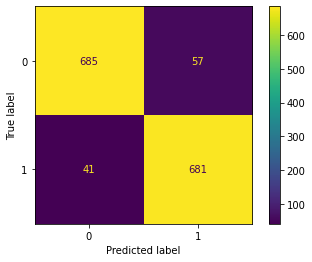

In [67]:
# Confusion matrix on test 
metrics.plot_confusion_matrix(
    catboost_model,
    X_test,
    y_test
)

C:\Program Files\Python\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Program Files\Python\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


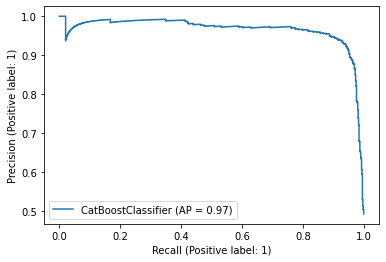

In [68]:
# Precision-Recall curve on test 
metrics.plot_precision_recall_curve(
    catboost_model,
    X_test,
    y_test
)

C:\Program Files\Python\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
C:\Program Files\Python\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


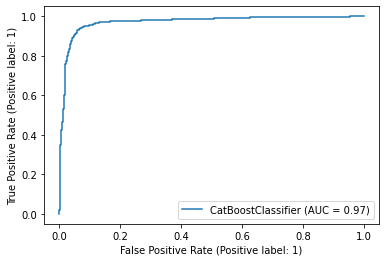

In [69]:
# ROC-AUC on test 
metrics.plot_roc_curve(
    catboost_model,
    X_test,
    y_test
)

In [70]:
# Metrics on test
print(metrics.classification_report(
    y_test,
    catboost_model.predict(X_test)
))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93       742
           1       0.92      0.94      0.93       722

    accuracy                           0.93      1464
   macro avg       0.93      0.93      0.93      1464
weighted avg       0.93      0.93      0.93      1464



C:\Program Files\Python\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


In [84]:
# Best hyperparameters
print(pd.Series(catboost_model.get_all_params()))

nan_mode                                        Min
eval_metric                                 Logloss
iterations                                      500
sampling_frequency                          PerTree
leaf_estimation_method                       Newton
grow_policy                           SymmetricTree
penalties_coefficient                             1
boosting_type                                 Plain
model_shrink_mode                          Constant
feature_border_type                    GreedyLogSum
bayesian_matrix_reg                             0.1
force_unit_auto_pair_weights                  False
l2_leaf_reg                                       3
random_strength                                   1
rsm                                               1
boost_from_average                            False
model_size_reg                                  0.5
pool_metainfo_options                  {'tags': {}}
subsample                                       0.8
use_best_mod

## LightGBM

In [71]:
lgbm_model = LGBMClassifier(num_threads = 3)

In [72]:
# Grid search of the best hyperparameters
lgbm_grid = {
    'boosting': [
        'gbdt',
        'dart',
        'rf',
        'goss'
    ],
    'n_iter': range(100,1100,200),
    'eta': np.arange(0.05,0.25,0.05),
    
}

In [73]:
lgbm_gsearch = GridSearchCV(
    param_grid = lgbm_grid,
    estimator = lgbm_model,
    cv = 3,
    verbose = 1
)

In [74]:
# Model training
lgbm_gsearch.fit(X_train, y_train)

Fitting 3 folds for each of 80 candidates, totalling 240 fits
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=100, n_iter=100 will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.05 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=100, n_iter=100 will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.05 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=100, n_iter=100 will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.05 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=300, n_iter=300 will be ignored. Current value: num_iterations=300
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.05 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=300, n_iter=300 will be ignored. Current value: num_iterations=300
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.05 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=300, n_iter=300 will be ignored. Current value: num_iterations=300
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.05 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=500, n_iter=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.05 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=500, n_iter=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.05 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=500, n_iter=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.05 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=700, n_iter=700 will be ignored. Current value: num_iterations=700
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.05 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=700, n_iter=700 will be ignored. Current value: num_iterations=700
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.05 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=700, n_iter=700 will be ignored. Current value: num_iterations=700
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.05 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=900, n_iter=900 will be ignored. Current value: num_iterations=900
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.05 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=900, n_iter=900 will be ignored. Current value: num_iterations=900
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.05 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=900, n_iter=900 will be ignored. Current value: num_iterations=900
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.05 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=100, n_iter=100 will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.1 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=100, n_iter=100 will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.1 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] num_threads is set=3, n_job

C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=300, n_iter=300 will be ignored. Current value: num_iterations=300
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.1 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=300, n_iter=300 will be ignored. Current value: num_iterations=300
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.1 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=300, n_iter=300 will be ignored. Current value: num_iterations=300
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.1 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=500, n_iter=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.1 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=500, n_iter=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.1 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=500, n_iter=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.1 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=700, n_iter=700 will be ignored. Current value: num_iterations=700
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.1 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=700, n_iter=700 will be ignored. Current value: num_iterations=700
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.1 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=700, n_iter=700 will be ignored. Current value: num_iterations=700
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.1 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=900, n_iter=900 will be ignored. Current value: num_iterations=900
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.1 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=900, n_iter=900 will be ignored. Current value: num_iterations=900
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.1 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=900, n_iter=900 will be ignored. Current value: num_iterations=900
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.1 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=100, n_iter=100 will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.15000000000000002 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=100, n_iter=100 will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.15000000000000002 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warn

C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=300, n_iter=300 will be ignored. Current value: num_iterations=300
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.15000000000000002 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=300, n_iter=300 will be ignored. Current value: num_iterations=300
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.15000000000000002 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=300, n_iter=300 will be ignored. Current value: num_iterations=300
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.15000000000000002 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=500, n_iter=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.15000000000000002 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=500, n_iter=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.15000000000000002 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=500, n_iter=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.15000000000000002 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=700, n_iter=700 will be ignored. Current value: num_iterations=700
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.15000000000000002 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=700, n_iter=700 will be ignored. Current value: num_iterations=700
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.15000000000000002 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=700, n_iter=700 will be ignored. Current value: num_iterations=700
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.15000000000000002 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=900, n_iter=900 will be ignored. Current value: num_iterations=900
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.15000000000000002 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=900, n_iter=900 will be ignored. Current value: num_iterations=900
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.15000000000000002 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=900, n_iter=900 will be ignored. Current value: num_iterations=900
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.15000000000000002 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=100, n_iter=100 will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.2 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=100, n_iter=100 will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.2 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] num_threads is set=3, n_job

C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=300, n_iter=300 will be ignored. Current value: num_iterations=300
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.2 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=300, n_iter=300 will be ignored. Current value: num_iterations=300
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.2 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=300, n_iter=300 will be ignored. Current value: num_iterations=300
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.2 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=500, n_iter=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.2 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=500, n_iter=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.2 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=500, n_iter=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.2 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=700, n_iter=700 will be ignored. Current value: num_iterations=700
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.2 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=700, n_iter=700 will be ignored. Current value: num_iterations=700
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.2 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=700, n_iter=700 will be ignored. Current value: num_iterations=700
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.2 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=900, n_iter=900 will be ignored. Current value: num_iterations=900
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.2 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=900, n_iter=900 will be ignored. Current value: num_iterations=900
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.2 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=900, n_iter=900 will be ignored. Current value: num_iterations=900
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.2 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=100, n_iter=100 will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.05 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=100, n_iter=100 will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.05 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=100, n_iter=100 will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.05 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=300, n_iter=300 will be ignored. Current value: num_iterations=300
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.05 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=300, n_iter=300 will be ignored. Current value: num_iterations=300
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.05 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=300, n_iter=300 will be ignored. Current value: num_iterations=300
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.05 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=500, n_iter=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.05 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=500, n_iter=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.05 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=500, n_iter=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.05 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=700, n_iter=700 will be ignored. Current value: num_iterations=700
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.05 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=700, n_iter=700 will be ignored. Current value: num_iterations=700
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.05 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=700, n_iter=700 will be ignored. Current value: num_iterations=700
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.05 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=900, n_iter=900 will be ignored. Current value: num_iterations=900
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.05 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=900, n_iter=900 will be ignored. Current value: num_iterations=900
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.05 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=900, n_iter=900 will be ignored. Current value: num_iterations=900
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.05 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=100, n_iter=100 will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.1 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=100, n_iter=100 will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.1 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=100, n_iter=100 will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.1 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=300, n_iter=300 will be ignored. Current value: num_iterations=300
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.1 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=300, n_iter=300 will be ignored. Current value: num_iterations=300
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.1 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=300, n_iter=300 will be ignored. Current value: num_iterations=300
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.1 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=500, n_iter=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.1 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=500, n_iter=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.1 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=500, n_iter=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.1 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=700, n_iter=700 will be ignored. Current value: num_iterations=700
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.1 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=700, n_iter=700 will be ignored. Current value: num_iterations=700
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.1 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=700, n_iter=700 will be ignored. Current value: num_iterations=700
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.1 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=900, n_iter=900 will be ignored. Current value: num_iterations=900
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.1 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=900, n_iter=900 will be ignored. Current value: num_iterations=900
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.1 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=900, n_iter=900 will be ignored. Current value: num_iterations=900
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.1 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=100, n_iter=100 will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.15000000000000002 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=100, n_iter=100 will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.15000000000000002 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=100, n_iter=100 will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.15000000000000002 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=300, n_iter=300 will be ignored. Current value: num_iterations=300
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.15000000000000002 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=300, n_iter=300 will be ignored. Current value: num_iterations=300
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.15000000000000002 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=300, n_iter=300 will be ignored. Current value: num_iterations=300
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.15000000000000002 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=500, n_iter=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.15000000000000002 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=500, n_iter=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.15000000000000002 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=500, n_iter=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.15000000000000002 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=700, n_iter=700 will be ignored. Current value: num_iterations=700
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.15000000000000002 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=700, n_iter=700 will be ignored. Current value: num_iterations=700
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.15000000000000002 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=700, n_iter=700 will be ignored. Current value: num_iterations=700
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.15000000000000002 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=900, n_iter=900 will be ignored. Current value: num_iterations=900
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.15000000000000002 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=900, n_iter=900 will be ignored. Current value: num_iterations=900
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.15000000000000002 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=900, n_iter=900 will be ignored. Current value: num_iterations=900
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.15000000000000002 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=100, n_iter=100 will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.2 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=100, n_iter=100 will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.2 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=100, n_iter=100 will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.2 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=300, n_iter=300 will be ignored. Current value: num_iterations=300
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.2 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=300, n_iter=300 will be ignored. Current value: num_iterations=300
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.2 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=300, n_iter=300 will be ignored. Current value: num_iterations=300
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.2 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=500, n_iter=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.2 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=500, n_iter=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.2 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=500, n_iter=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.2 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=700, n_iter=700 will be ignored. Current value: num_iterations=700
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.2 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=700, n_iter=700 will be ignored. Current value: num_iterations=700
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.2 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=700, n_iter=700 will be ignored. Current value: num_iterations=700
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.2 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=900, n_iter=900 will be ignored. Current value: num_iterations=900
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.2 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=900, n_iter=900 will be ignored. Current value: num_iterations=900
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.2 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=900, n_iter=900 will be ignored. Current value: num_iterations=900
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.2 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _

[LightGBM] [Warning] boosting is set=rf, boosting_type=gbdt will be ignored. Current value: boosting=rf
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=100, n_iter=100 will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.05 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _

C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=goss, boosting_type=gbdt will be ignored. Current value: boosting=goss
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=100, n_iter=100 will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.05 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] boosting is set=goss, boosting_type=gbdt will be ignored. Current value: boosting=goss
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=100, n_iter=100 will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.05 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] boosting is set=goss, boosting_type=gbdt will be ignored. Current value: boosting=goss
[LightGBM] [Warning] num_threads is set=3, n_j

C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=goss, boosting_type=gbdt will be ignored. Current value: boosting=goss
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=300, n_iter=300 will be ignored. Current value: num_iterations=300
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.05 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=goss, boosting_type=gbdt will be ignored. Current value: boosting=goss
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=300, n_iter=300 will be ignored. Current value: num_iterations=300
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.05 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=goss, boosting_type=gbdt will be ignored. Current value: boosting=goss
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=500, n_iter=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.05 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=goss, boosting_type=gbdt will be ignored. Current value: boosting=goss
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=500, n_iter=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.05 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=goss, boosting_type=gbdt will be ignored. Current value: boosting=goss
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=500, n_iter=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.05 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=goss, boosting_type=gbdt will be ignored. Current value: boosting=goss
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=700, n_iter=700 will be ignored. Current value: num_iterations=700
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.05 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=goss, boosting_type=gbdt will be ignored. Current value: boosting=goss
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=700, n_iter=700 will be ignored. Current value: num_iterations=700
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.05 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=goss, boosting_type=gbdt will be ignored. Current value: boosting=goss
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=700, n_iter=700 will be ignored. Current value: num_iterations=700
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.05 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=goss, boosting_type=gbdt will be ignored. Current value: boosting=goss
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=900, n_iter=900 will be ignored. Current value: num_iterations=900
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.05 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=goss, boosting_type=gbdt will be ignored. Current value: boosting=goss
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=900, n_iter=900 will be ignored. Current value: num_iterations=900
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.05 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=goss, boosting_type=gbdt will be ignored. Current value: boosting=goss
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=900, n_iter=900 will be ignored. Current value: num_iterations=900
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.05 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=goss, boosting_type=gbdt will be ignored. Current value: boosting=goss
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=100, n_iter=100 will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.1 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] boosting is set=goss, boosting_type=gbdt will be ignored. Current value: boosting=goss
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=100, n_iter=100 will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.1 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] boosting is set=goss, boosting_type=gbdt will be ignored. Current value: boosting=goss
[LightGBM] [Warning] num_threads is set=3, n_job

C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=goss, boosting_type=gbdt will be ignored. Current value: boosting=goss
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=300, n_iter=300 will be ignored. Current value: num_iterations=300
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.1 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=goss, boosting_type=gbdt will be ignored. Current value: boosting=goss
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=300, n_iter=300 will be ignored. Current value: num_iterations=300
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.1 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=goss, boosting_type=gbdt will be ignored. Current value: boosting=goss
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=300, n_iter=300 will be ignored. Current value: num_iterations=300
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.1 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=goss, boosting_type=gbdt will be ignored. Current value: boosting=goss
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=500, n_iter=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.1 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=goss, boosting_type=gbdt will be ignored. Current value: boosting=goss
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=500, n_iter=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.1 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=goss, boosting_type=gbdt will be ignored. Current value: boosting=goss
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=500, n_iter=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.1 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=goss, boosting_type=gbdt will be ignored. Current value: boosting=goss
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=700, n_iter=700 will be ignored. Current value: num_iterations=700
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.1 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=goss, boosting_type=gbdt will be ignored. Current value: boosting=goss
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=700, n_iter=700 will be ignored. Current value: num_iterations=700
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.1 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=goss, boosting_type=gbdt will be ignored. Current value: boosting=goss
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=700, n_iter=700 will be ignored. Current value: num_iterations=700
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.1 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=goss, boosting_type=gbdt will be ignored. Current value: boosting=goss
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=900, n_iter=900 will be ignored. Current value: num_iterations=900
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.1 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=goss, boosting_type=gbdt will be ignored. Current value: boosting=goss
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=900, n_iter=900 will be ignored. Current value: num_iterations=900
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.1 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=goss, boosting_type=gbdt will be ignored. Current value: boosting=goss
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=900, n_iter=900 will be ignored. Current value: num_iterations=900
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.1 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=goss, boosting_type=gbdt will be ignored. Current value: boosting=goss
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=100, n_iter=100 will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.15000000000000002 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] boosting is set=goss, boosting_type=gbdt will be ignored. Current value: boosting=goss
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=100, n_iter=100 will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.15000000000000002 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] boosting is set=goss, boosting_type=gbdt will be ignored. Current value: boosting=goss
[LightGBM] [Warn

C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=goss, boosting_type=gbdt will be ignored. Current value: boosting=goss
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=300, n_iter=300 will be ignored. Current value: num_iterations=300
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.15000000000000002 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=goss, boosting_type=gbdt will be ignored. Current value: boosting=goss
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=300, n_iter=300 will be ignored. Current value: num_iterations=300
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.15000000000000002 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=goss, boosting_type=gbdt will be ignored. Current value: boosting=goss
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=300, n_iter=300 will be ignored. Current value: num_iterations=300
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.15000000000000002 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] boosting is set=goss, boosting_type=gbdt will be ignored. Current value: boosting=goss
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=500, n_iter=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.15000000000000002 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=goss, boosting_type=gbdt will be ignored. Current value: boosting=goss
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=500, n_iter=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.15000000000000002 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=goss, boosting_type=gbdt will be ignored. Current value: boosting=goss
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=500, n_iter=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.15000000000000002 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=goss, boosting_type=gbdt will be ignored. Current value: boosting=goss
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=700, n_iter=700 will be ignored. Current value: num_iterations=700
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.15000000000000002 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=goss, boosting_type=gbdt will be ignored. Current value: boosting=goss
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=700, n_iter=700 will be ignored. Current value: num_iterations=700
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.15000000000000002 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=goss, boosting_type=gbdt will be ignored. Current value: boosting=goss
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=700, n_iter=700 will be ignored. Current value: num_iterations=700
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.15000000000000002 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=goss, boosting_type=gbdt will be ignored. Current value: boosting=goss
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=900, n_iter=900 will be ignored. Current value: num_iterations=900
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.15000000000000002 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=goss, boosting_type=gbdt will be ignored. Current value: boosting=goss
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=900, n_iter=900 will be ignored. Current value: num_iterations=900
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.15000000000000002 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=goss, boosting_type=gbdt will be ignored. Current value: boosting=goss
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=900, n_iter=900 will be ignored. Current value: num_iterations=900
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.15000000000000002 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=goss, boosting_type=gbdt will be ignored. Current value: boosting=goss
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=100, n_iter=100 will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.2 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] boosting is set=goss, boosting_type=gbdt will be ignored. Current value: boosting=goss
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=100, n_iter=100 will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.2 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] boosting is set=goss, boosting_type=gbdt will be ignored. Current value: boosting=goss
[LightGBM] [Warning] num_threads is set=3, n_job

C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=goss, boosting_type=gbdt will be ignored. Current value: boosting=goss
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=300, n_iter=300 will be ignored. Current value: num_iterations=300
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.2 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=goss, boosting_type=gbdt will be ignored. Current value: boosting=goss
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=300, n_iter=300 will be ignored. Current value: num_iterations=300
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.2 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=goss, boosting_type=gbdt will be ignored. Current value: boosting=goss
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=300, n_iter=300 will be ignored. Current value: num_iterations=300
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.2 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] boosting is set=goss, boosting_type=gbdt will be ignored. Current value: boosting=goss
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=500, n_iter=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.2 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=goss, boosting_type=gbdt will be ignored. Current value: boosting=goss
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=500, n_iter=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.2 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=goss, boosting_type=gbdt will be ignored. Current value: boosting=goss
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=500, n_iter=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.2 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=goss, boosting_type=gbdt will be ignored. Current value: boosting=goss
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=700, n_iter=700 will be ignored. Current value: num_iterations=700
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.2 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=goss, boosting_type=gbdt will be ignored. Current value: boosting=goss
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=700, n_iter=700 will be ignored. Current value: num_iterations=700
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.2 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=goss, boosting_type=gbdt will be ignored. Current value: boosting=goss
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=700, n_iter=700 will be ignored. Current value: num_iterations=700
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.2 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=goss, boosting_type=gbdt will be ignored. Current value: boosting=goss
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=900, n_iter=900 will be ignored. Current value: num_iterations=900
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.2 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=goss, boosting_type=gbdt will be ignored. Current value: boosting=goss
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=900, n_iter=900 will be ignored. Current value: num_iterations=900
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.2 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=goss, boosting_type=gbdt will be ignored. Current value: boosting=goss
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=900, n_iter=900 will be ignored. Current value: num_iterations=900
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.2 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
60 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Program Files\Python\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Program Files\Python\lib\site-packages\lightgbm\sklearn.py", line 967, in fit
    super().fit(X, _y, sample_weight=sample_weight, init_score=init_score, eval_set=valid_sets,
  File "C:\Program Files\Python\lib\site-packages\lightgbm\sklearn.py", line 748, in fit
    self._Booster = train(
  File "C:

[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=900, n_iter=900 will be ignored. Current value: num_iterations=900
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.05 will be ignored. Current value: learning_rate=0.1


GridSearchCV(cv=3, estimator=LGBMClassifier(num_threads=3),
             param_grid={'boosting': ['gbdt', 'dart', 'rf', 'goss'],
                         'eta': array([0.05, 0.1 , 0.15, 0.2 ]),
                         'n_iter': range(100, 1100, 200)},
             verbose=1)

C:\Program Files\Python\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


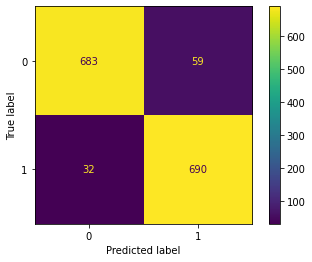

In [75]:
# Confusion matrix on test 
metrics.plot_confusion_matrix(
    lgbm_gsearch,
    X_test,
    y_test
)

C:\Program Files\Python\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


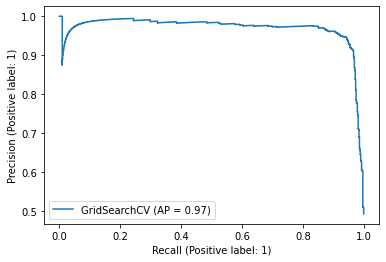

In [76]:
# Precision-Recall curve on test 
metrics.plot_precision_recall_curve(
    lgbm_gsearch,
    X_test,
    y_test
)

C:\Program Files\Python\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


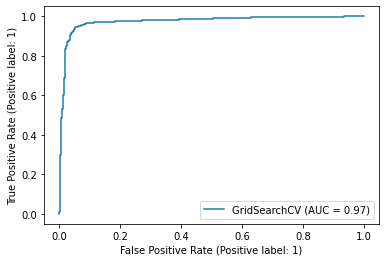

In [77]:
# ROC-AUC on test 
metrics.plot_roc_curve(
    lgbm_gsearch,
    X_test,
    y_test
)

In [78]:
# Metrics on test
print(metrics.classification_report(
    y_test,
    lgbm_gsearch.predict(X_test)
))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94       742
           1       0.92      0.96      0.94       722

    accuracy                           0.94      1464
   macro avg       0.94      0.94      0.94      1464
weighted avg       0.94      0.94      0.94      1464



In [83]:
# Best hyperparameters
print(pd.Series(lgbm_gsearch.best_params_))

boosting    gbdt
eta         0.05
n_iter       900
dtype: object
